In [1]:
import sys

sys.path.append('..')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

# Import the data

In [2]:
player_df = pd.read_csv('../data/nhl-player-data.csv')
team_df = pd.read_csv('../data/nhl-teams.csv')

## Rename columns based on provided README to make them more approachable

In [3]:
player_df = player_df.rename({
    'Rk': 'rank',
    'Age': 'age',
    'Nick': 'nick',
    'Player': 'player',
    'Pos': 'position',
    'Tm': 'team',
    'GP': 'games_played',
    'G': 'goals',
    'A': 'assists',
    'PTS': 'points',
    'plusminus': 'plus_minus',
    'PIM': 'penalty_minutes',
    'PS': 'team_points_ratio',
    'EV': 'num_goals_5on5',
    'PP': 'num_goals_powerplay',
    'SH': 'num_goals_shorthanded',
    'GW': 'num_goals_gamewinning',
    'EV.1': 'num_assists_5on5',
    'PP.1': 'num_assists_powerplay',
    'SH.1': 'num_assists_shorthanded',
    'GW.1': 'num_assists_gamewinning',
    'S': 'shoots_on_goal',
    'S_percent': 'shoot_success_rate',
    'TOI': 'time_on_ice',
    'ATOI': 'average_time_on_ice',
    'BLK': 'num_blocked_shots',
    'HIT': 'num_hits',
    'FOW': 'faceoff_wins',
    'FOL': 'faceoff_losses',
    'FO_percent': 'faceoff_success_rate',
    'HART': 'num_HT_wins',
    'Votes': 'num_HT_votes',
    'Season': 'season'
}, axis=1)

# 1. Data cleaning

## Have a look at columns now and their basic statistics

In [4]:
player_df.head()

rank             player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
0     1     Connor McDavid  mcdavco01   20        C  EDM            82     30       70     100          27               26               12.8              26                    3                      1                      6                45                     24                        1             251                12.0         1733            21.133333               29.0        34         348.0           458.0                  43.2            1          1604    2017
1     2      Sidney Crosby  crosbsi01   29        C  PIT            75     44       45      89          17               24               12.3              30                   14                      0                      5                34                     11                        0             255                17.3         1491            19.883333               27.0        80         842.0           906.0                  48.2            0          1104    2017
2     3       Patrick Kane   kanepa01   28       RW  CHI            82     34       55      89          11               32               10.8              27                    7                      0                      5                39                     16                        0             292                11.6         1754            21.400000               15.0        28           7.0            44.0                  13.7            0           206    2017
3     4  Nicklas Backstrom  backsni02   29        C  WSH            82     23       63      86          17               38                9.9              15                    8                      0                      5                36                     27                        0             162                14.2         1497            18.266667               33.0        45         685.0           648.0                  51.4            0            60    2017
4     5    Nikita Kucherov  kucheni01   23       RW  TBL            74     40       45      85          13               38               12.0              23                   17                      0                      7                30                     15                        0             246                16.3         1438            19.433333               20.0        30           0.0             0.0                   0.0            0           119    2017

In [5]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12328 entries, 0 to 12327
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     12328 non-null  int64  
 1   player                   12328 non-null  object 
 2   nick                     12328 non-null  object 
 3   age                      12328 non-null  int64  
 4   position                 12328 non-null  object 
 5   team                     12328 non-null  object 
 6   games_played             12328 non-null  int64  
 7   goals                    12328 non-null  int64  
 8   assists                  12328 non-null  int64  
 9   points                   12328 non-null  int64  
 10  plus_minus               12328 non-null  int64  
 11  penalty_minutes          12328 non-null  int64  
 12  team_points_ratio        12328 non-null  float64
 13  num_goals_5on5           12328 non-null  int64  
 14  num_goals_powerplay   

Let's first deal with NaN values. Let's see how many there are per column.

In [6]:
nan_sums = player_df.isna().sum()
nan_sums[nan_sums > 0]

shoot_success_rate      124
num_blocked_shots         1
faceoff_wins              1
faceoff_losses            1
faceoff_success_rate    311
dtype: int64

Now we see that there is only 1 missing value in columns **num_blocked_shots**, **faceoff_wins**, **faceoff_losses**. Let's have a look at those.

In [7]:
cols = ['num_blocked_shots', 'faceoff_wins', 'faceoff_losses']

for col in cols:
    print('#'*40)
    print(col)
    print(player_df[player_df[col].isna()])

########################################
num_blocked_shots
       rank         player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
12291   854  Brian Lashoff  lashobr01   27        D  DET             1      0        0       0           0                0                0.0               0                    0                      0                      0                 0                      0                        0               0                 NaN            4                  4.0                NaN         0           NaN             NaN                   NaN            0        

In [8]:
player_df[player_df.nick == 'lashobr01']

rank         player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
827     828  Brian Lashoff  lashobr01   26        D  DET             5      0        0       0          -3                0               -0.2               0                    0                      0                      0                 0                      0                        0               1                 0.0           63            12.516667                4.0         8           0.0             0.0                   0.0            0             0    2017
2487    702  Brian Lashoff  lashobr01   24        D  DET            11      0        2       2           4                6                0.7               0                    0                      0                      0                 2                      0                        0               7                 0.0          146            13.283333               14.0         7           0.0             0.0                   0.0            0             0    2015
3267    600  Brian Lashoff  lashobr01   23        D  DET            75      1        5       6          -2               36                1.5               1                    0                      0                      0                 5                      0                        0              38                 2.6         1082            14.433333               93.0        65           0.0             0.0                   0.0            0             0    2014
4096    543  Brian Lashoff  lashobr01   22        D  DET            31      1        4       5         -10               15                0.5               1                    0                      0                      0                 4                      0                        0              26                 3.8          551            17.783333               43.0        44           0.0             0.0                   0.0            0             0    2013
12291   854  Brian Lashoff  lashobr01   27        D  DET             1      0        0       0           0                0                0.0               0                    0                      0                      0                 0                      0                        0               0                 NaN            4             4.000000                NaN         0           NaN             NaN                   NaN            0             0    2018

We see it is the same row/record. It is also fairly uninterresting, since they got 0 votes for the Hart Trohpy. Let's therefore drop this record, as it seems it has no value and can potentially be corrupt.

In [9]:
player_df.drop(12291, inplace=True)

Now let's deal with **shoot_success_rate**. I would expect that this value should be a NaN iff the player had no shots on goal in the season. Let's explore this idea.

In [10]:
missing_success_rate = player_df.shoot_success_rate.isna()
player_df[missing_success_rate]['shoots_on_goal'].describe()

count    123.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: shoots_on_goal, dtype: float64

Ok, we see that the NaN ones are the ones with 0 shots on goal. Now let's see if there are any records that have 0 shots but the success rate not set to NaN.

In [11]:
zero_shots = player_df.shoots_on_goal == 0
player_df[zero_shots & ~missing_success_rate].shape[0]

273

We see there is 273 of them. Let's therefore set their success rate to NaN, as it is technically not defined.

In [12]:
player_df.loc[zero_shots, 'shoot_success_rate'] = np.nan

Now let's have a look at faceoff success rate. We should expect that the NaN values are the players that did not participate in any faceoff. This means they had:
- 0 faceoff_wins
- 0 faceoff_losses

In [13]:
success_rate_undef = player_df.faceoff_success_rate.isna()
player_df[success_rate_undef][['faceoff_wins', 'faceoff_losses']].describe()

faceoff_wins  faceoff_losses
count         310.0           310.0
mean            0.0             0.0
std             0.0             0.0
min             0.0             0.0
25%             0.0             0.0
50%             0.0             0.0
75%             0.0             0.0
max             0.0             0.0

We see that the condition that only the players that did not participate in a faceoff have a NaN value in the success rate column. Now let's see if there are any more that did not participate in any faceoff but do not have a NaN value in the success rate.

In [14]:
no_faceoffs = (player_df.faceoff_wins == 0) & (player_df.faceoff_losses == 0)
player_df[no_faceoffs & ~success_rate_undef]['faceoff_success_rate'].describe()

count    5865.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: faceoff_success_rate, dtype: float64

Ok, there really is plenty of them. Let's therefore fix this and set the value to a NaN.

In [15]:
player_df.loc[no_faceoffs, 'faceoff_success_rate'] = np.nan

Now let's see if there are some logical conditions on the data disturbed.

In [16]:
player_df.describe()

rank           age  games_played         goals       assists        points    plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate   time_on_ice  average_time_on_ice  num_blocked_shots      num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate   num_HT_wins  num_HT_votes        season
count  12327.000000  12327.000000  12327.000000  12327.000000  12327.000000  12327.000000  12327.000000     12327.000000       12327.000000    12327.000000         12327.000000           12327.000000           12327.000000      12327.000000           12327.000000             12327.000000    12327.000000        11931.000000  12327.000000         12327.000000       12327.000000  12327.000000  12327.000000    12327.000000           6152.000000  12327.000000  12327.000000  12327.000000
mean     629.923420     26.640707     48.906628      7.484871     12.788756     20.273627     -0.351829        31.973716           2.480271        5.387604             1.859333               0.237933               1.191612          9.004705               3.531354                 0.252697       81.281739            7.699606    804.884643            14.252622          29.443823     47.274357     62.307536       62.306563             42.256518      0.001136      3.317352   2011.438063
std      553.889804      4.582962     28.663999      8.847038     13.129523     20.778516      9.415030        32.314676           2.813333        6.127320             3.182354               0.663062               1.760147          8.382506               5.718146                 0.610621       71.190374            7.556340    576.785797             4.979352          38.987010     54.327598    160.312502      152.299919             21.427258      0.033683     53.897601      4.170612
min        1.000000      0.000000      1.000000      0.000000      0.000000      0.000000    -46.000000         0.000000          -1.900000        0.000000             0.000000               0.000000               0.000000          0.000000               0.000000                 0.000000        0.000000            0.000000      1.000000             0.000000           0.000000      0.000000      0.000000        0.000000              0.000000      0.000000      0.000000   2004.000000
25%      257.000000     23.000000     21.000000      1.000000      2.000000      3.000000     -5.000000         8.000000           0.200000        1.000000             0.000000               0.000000               0.000000          2.000000               0.000000                 0.000000       19.000000            2.900000    235.500000            10.966667           0.000000      1.000000      0.000000        0.000000             33.300000      0.000000      0.000000   2008.000000
50%      514.000000     26.000000     57.000000      4.000000      9.000000     14.000000     -1.000000        24.000000           1.600000        3.000000             0.000000               0.000000               0.000000          7.000000               1.000000                 0.000000       67.000000            7.100000    812.000000            14.616667          15.000000     30.000000      0.000000        0.000000             45.900000      0.000000      0.000000   2012.000000
75%      771.000000     30.000000     76.000000     11.000000     20.000000     32.000000      4.000000        45.000000           4.100000        8.000000             3.000000               0.000000               2.000000         14.000000               5.000000                 0.000000      126.000000           11.100000   1283.000000            18.000000          41.000000     75.000000     14.000000       19.000000             51.700000      0.000000      0.000000   2015.000000
max     2644.000000     48.000000     84.000000     65.000000     96.000000    125.000000     50.000000       324.00000

We immediatelly see that there is someone with age of 0. Let's look at every player that is under 18, which should legally not be allowed to play in the NHL.

In [17]:
player_df[player_df.age < 18]

rank          player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
871   872  Dillon Simpson  simpsdi01    0        D  EDM             3      0        0       0           0                2                0.0               0                    0                      0                      0                 0                      0                        0               2                 0.0           33            10.883333                2.0         3           0.0             0.0                   NaN            0             0    2017

In [18]:
player_df[player_df.nick == 'simpsdi01']

rank          player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
871   872  Dillon Simpson  simpsdi01    0        D  EDM             3      0        0       0           0                2                0.0               0                    0                      0                      0                 0                      0                        0               2                 0.0           33            10.883333                2.0         3           0.0             0.0                   NaN            0             0    2017

Ok, there is only 1 person like this with the age of 0. Let's remove this record as we don't know what might be good or bad with this record.

In [19]:
player_df.drop(871, inplace=True)

Now let's have a look at those who have 0 in **average_time_on_ice**. This is suspicious, since the *min* value of total **time_on_ice** is 1. 

In [20]:
player_df[player_df.average_time_on_ice == 0]

rank          player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
3680   127  Sergei Gonchar  gonchse01   38        D  OTT            45      3       24      27           4               26                5.3               1                    2                      0                      3                14                     10                        0              85                 3.5         1080                  0.0               65.0        25           0.0             0.0                   NaN            0             0    2013
3825   272    Justin Faulk  faulkju01   20        D  CAR            38      5       10      15           1               15                2.8               3                    1                      1                      0                 8                      2                        0              76                 6.6          912                  0.0               47.0        63           0.0             0.0                   NaN            0             0    2013

As those records seem valid (apart from this value), let's fill it in by what it should be.

In [21]:
player_df['average_time_on_ice'] = player_df['time_on_ice'] / player_df['games_played']

Now let's check other constrains, such as values being higher than possible values (more goals than shots on goal, more points not equal to goals+assits, etc).

In [22]:
# Any goals+assits != points?
(~(player_df.goals + player_df.assists) == player_df.points).any()

False

In [23]:
# any num_goals_{5on5/powerplay/shorthanded/gamewinning} > total goals?
for col in ['num_goals_5on5', 'num_goals_powerplay', 'num_goals_shorthanded', 'num_goals_gamewinning']:
    print(f'{col}: {(player_df.goals < player_df[col]).any()}')

num_goals_5on5: False
num_goals_powerplay: False
num_goals_shorthanded: False
num_goals_gamewinning: False


In [24]:
# same with assits
for col in ['num_assists_5on5', 'num_assists_powerplay', 'num_assists_shorthanded']:
    print(f'{col}: {(player_df.assists < player_df[col]).any()}')

num_assists_5on5: False
num_assists_powerplay: False
num_assists_shorthanded: False


In [25]:
# shoot success rate not matching the ratio it should be from shots_on_goal / goals?
any_goals = player_df[player_df.goals > 0]
(((any_goals.goals / any_goals.shoots_on_goal * 100) - any_goals.shoot_success_rate).abs() > 1).any()

False

In [26]:
# Same with faceoffs
# shoot success rate not matching the ratio it should be from shots_on_goal / goals?
any_faceoff = player_df[~player_df.faceoff_success_rate.isna()]
(((any_faceoff.faceoff_wins / (any_faceoff.faceoff_wins + any_faceoff.faceoff_losses) * 100) - any_faceoff.faceoff_success_rate).abs() > 1).any()

False

Now let's have a look at the player identificaion inconsistencies.

In [27]:
player_df.player.unique().__len__(), player_df.nick.unique().__len__()

(2719, 2722)

In [28]:
nck = player_df.groupby(['player']).agg({'nick': lambda x: len(np.unique(x))})
filtered = nck[nck.nick > 1]
filtered

nick
player                
Alexandre Picard     2
Colin White          2
Erik Gustafsson      2
Mike Brown           2
Mike Green           2
Mikko Lehtonen       2
Petr Sykora          2
Sean Collins         2
Sebastian Aho        2

In [29]:
player_df[player_df.player == 'Erik Gustafsson']

rank           player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
1322    435  Erik Gustafsson  gustaer02   23        D  CHI            41      0       14      14          11                4                3.1               0                    0                      0                      0                13                      1                        0              58                 0.0          633            15.439024               37.0        29           0.0             0.0                   NaN            0             0    2016
3185    518  Erik Gustafsson  gustaer01   25        D  PHI            31      2        8      10           7                6                2.3               2                    0                      0                      0                 6                      2                        0              30                 6.7          543            17.516129               50.0        11           0.0             0.0                   NaN            0             0    2014
3988    435  Erik Gustafsson  gustaer01   24        D  PHI            27      3        5       8          -1                2                1.8               3                    0                      0                      1                 4                      1                        0              36                 8.3          544            20.148148               39.0        15           0.0             1.0                   0.0            0             0    2013
5015    623  Erik Gustafsson  gustaer01   23        D  PHI            30      1        4       5          12                2                1.9               1                    0                      0                      0                 3                      0                        1              18                 5.6          504            16.800000               35.0         9           0.0             0.0                   NaN            0             0    2012
6103    817  Erik Gustafsson  gustaer01   22        D  PHI             3      0        0       0          -1                4               -0.1               0                    0                      0                      0                 0                      0                        0               2                 0.0           33            11.000000                1.0         0           0.0             0.0                   NaN            0             0    2011
11875   438  Erik Gustafsson  gustaer02   25        D  CHI            35      5       11      16           1                6                2.9               5                    0                      0                      0                 7                      4                        0              71                 7.0          649            18.542857               45.0        30           0.0             1.0                   0.0            0             0    2018

Now let's do the opposite, have a look at same nick but different name values.

In [30]:
cpied = player_df.copy()
cpied['player_2'] = cpied['player'].copy()
names = cpied.groupby(['nick']).agg({'player': lambda x: len(np.unique(x)), 'player_2': lambda x: np.unique(x)})
filtered = names[names.player > 1]
filtered

player                                    player_2
nick                                                         
didomch01       2  [Chris Didomenico, Christopher Didomenico]
grzelma01       2           [Matt Grzelcyk, Matthew Grzelcyk]
maroopa01       2                [Pat Maroon, Patrick Maroon]
mathemi01       2           [Michael Matheson, Mike Matheson]
nievecr01       2              [Boo Nieves, Cristoval Nieves]
petroal01       2         [Alex Petrovic, Alexander Petrovic]

In [31]:
player_df[player_df.nick == 'nievecr01']

rank            player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
849     850  Cristoval Nieves  nievecr01   23        C  NYR             1      0        0       0          -1                0               -0.1               0                    0                      0                      0                 0                      0                        0               0                 NaN           12            12.000000                1.0         0           3.0             7.0                  30.0            0             0    2017
12011   574        Boo Nieves  nievecr01   24        C  NYR            28      1        8       9           6               12                0.8               1                    0                      0                      0                 8                      0                        0              23                 4.3          286            10.214286               19.0        30          97.0           122.0                  44.3            0             0    2018

In [32]:
player_df[player_df.player == 'Mike Green']

rank      player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
196     197  Mike Green  greenmi03   31        D  DET            72     14       22      36         -20               40                5.8              11                    3                      0                      2                15                      7                        0             125                11.2         1696            23.555556               92.0        67           0.0             0.0                   NaN            0             0    2017
1101    214  Mike Green  greenmi03   30        D  DET            74      7       28      35          -6               38                5.9               2                    5                      0                      0                13                     15                        0             124                 5.6         1463            19.770270               71.0       106           0.0             2.0                   0.0            0             0    2016
1902    117  Mike Green  greenmi03   29        D  WSH            72     10       35      45          15               34                8.6               9                    1                      0                      2                19                     16                        0             159                 6.3         1376            19.111111               93.0        82           0.0             0.0                   NaN            0             0    2015
2841    174  Mike Green  greenmi03   28        D  WSH            70      9       29      38         -16               64                5.2               6                    3                      0                      2                17                     12                        0             172                 5.2         1591            22.728571              107.0        62           0.0             0.0                   NaN            0             0    2014
3685    132  Mike Green  greenmi03   27        D  WSH            35     12       14      26          -3               20                4.5               8                    4                      0                      2                 4                     10                        0              96                12.5          870            24.857143               61.0        36           0.0             0.0                   NaN            0             0    2013
4950    558  Mike Green  greenmi03   26        D  WSH            32      3        4       7           5               12                2.1               0                    3                      0                      1                 3                      1                        0              64                 4.7          673            21.031250               44.0        27           0.0             0.0                   NaN            0             0    2012
5597    311  Mike Green  greenmi03   25        D  WSH            49      8       16      24           6               48                5.5               3                    5                      0                      1                10                      5                        1             115                 7.0         1234            25.183673              106.0       100           0.0             0.0                   NaN            0             0    2011
6198     21  Mike Green  greenmi03   24        D  WSH            75     19       57      76          39               54               13.0               9                   10                      0        

# 2. Data distribution

Now let's have a look of data distribution, first by taking only a signle variable at a time.

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


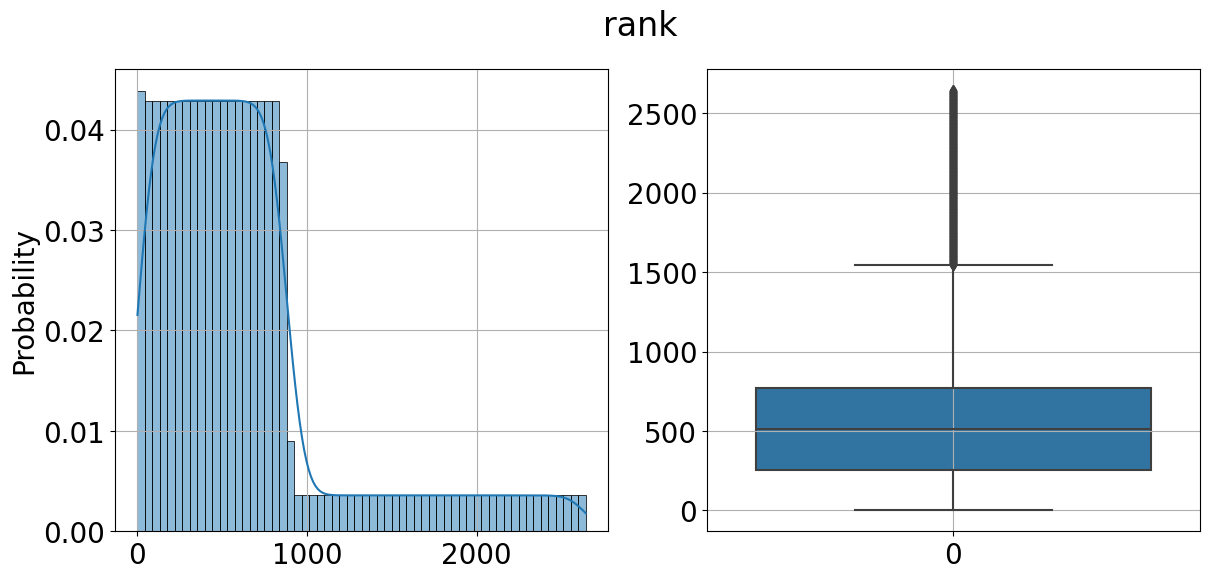

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


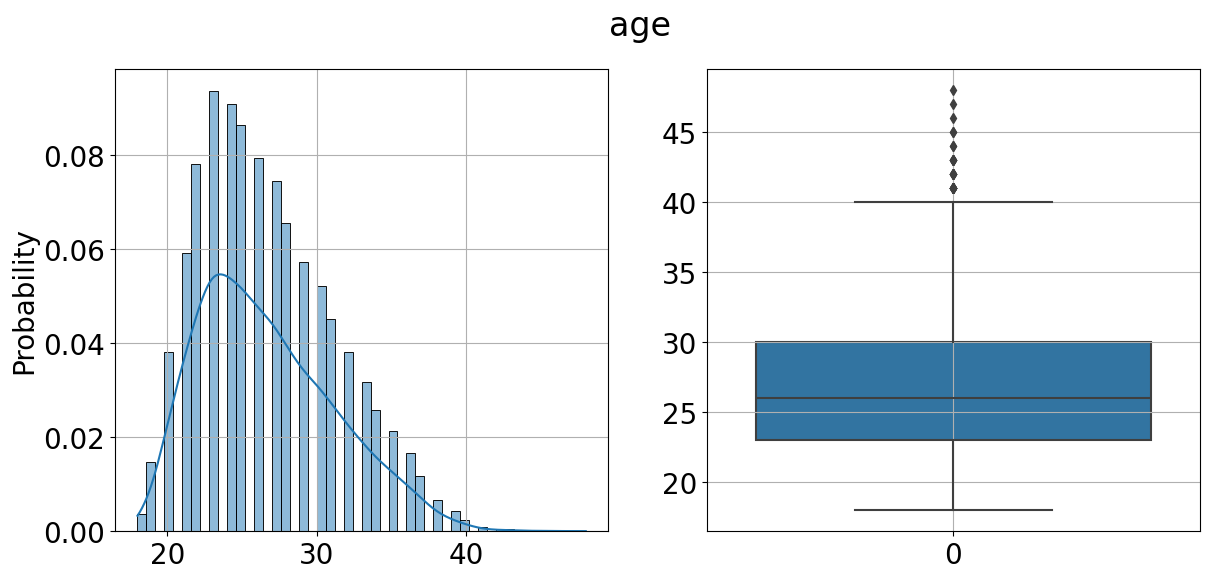

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


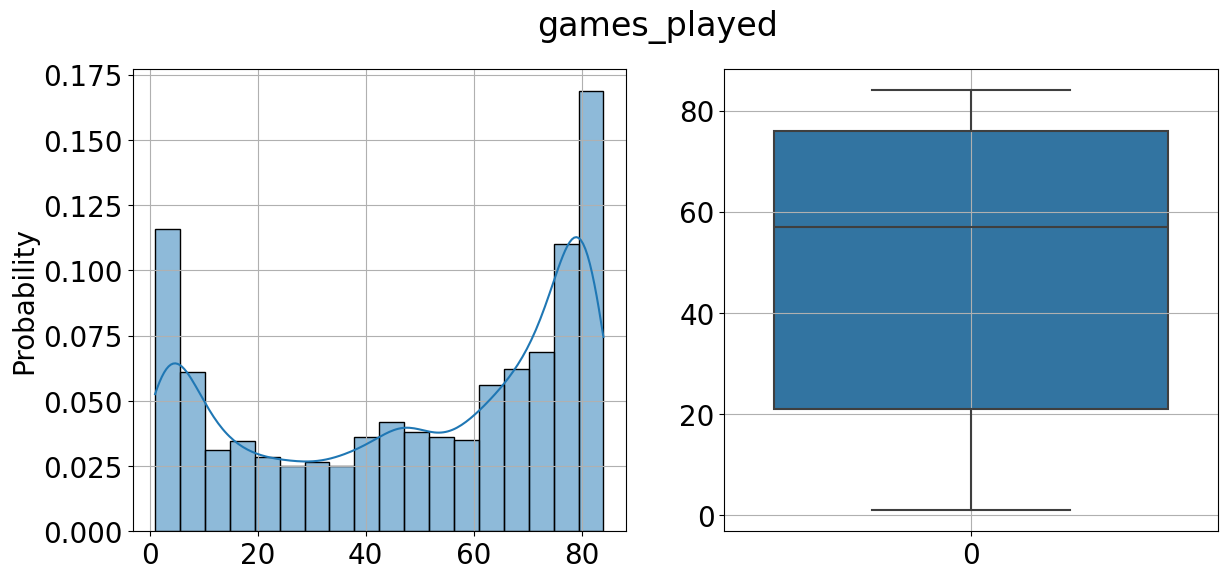

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


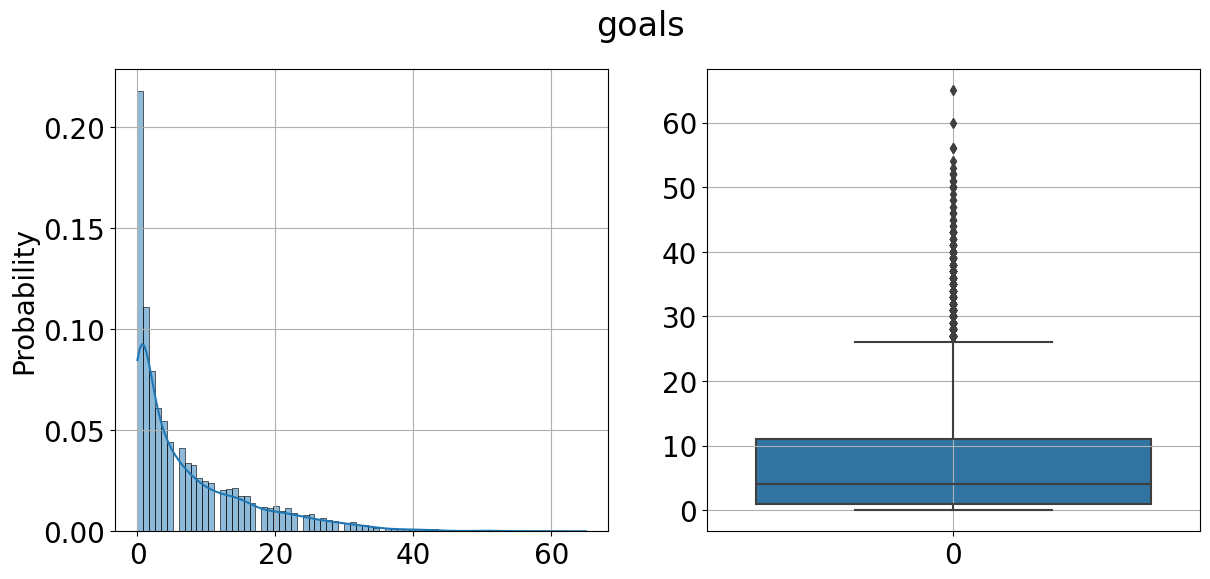

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


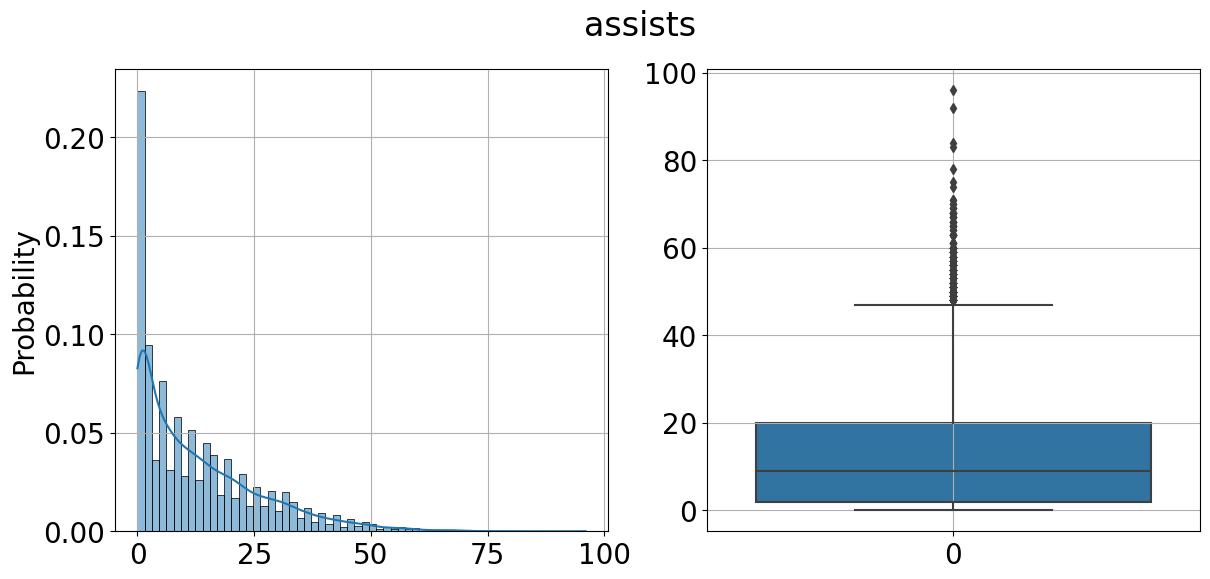

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


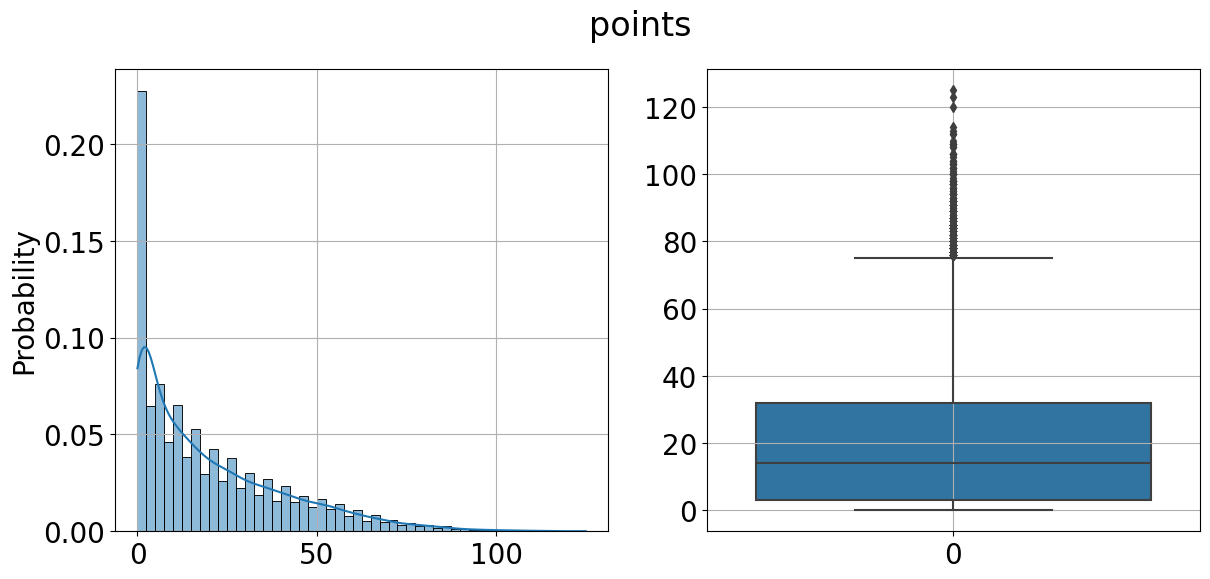

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


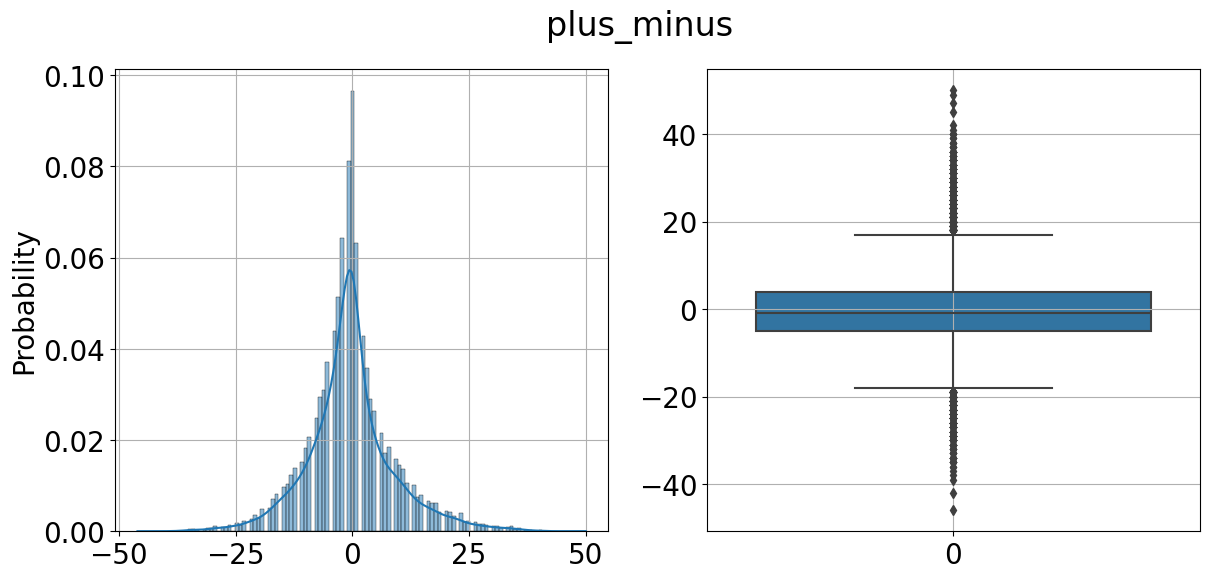

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


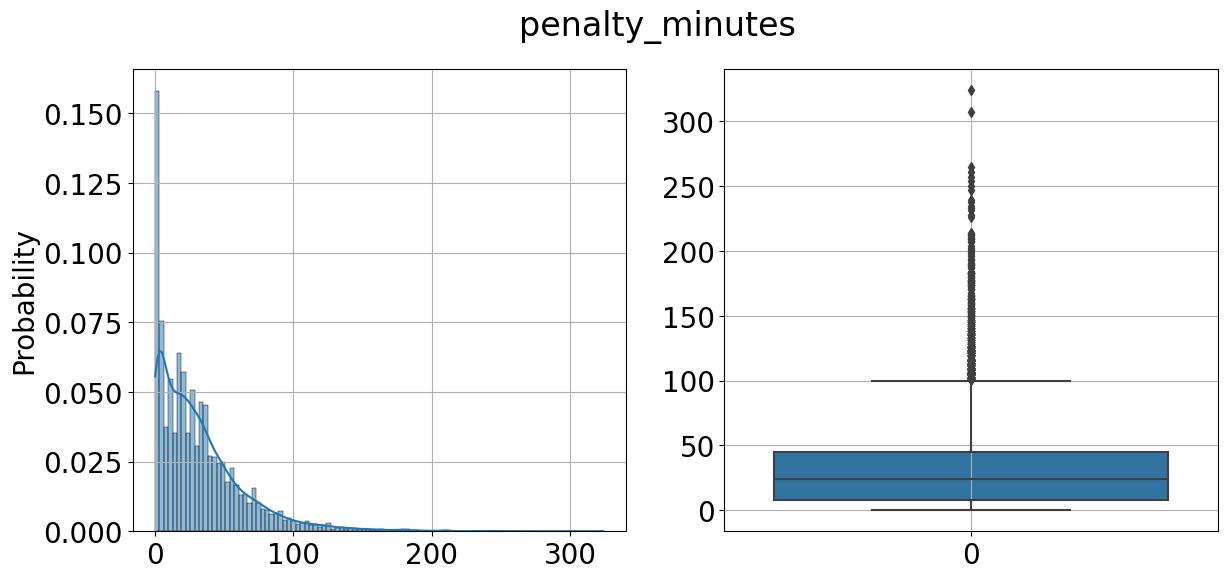

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


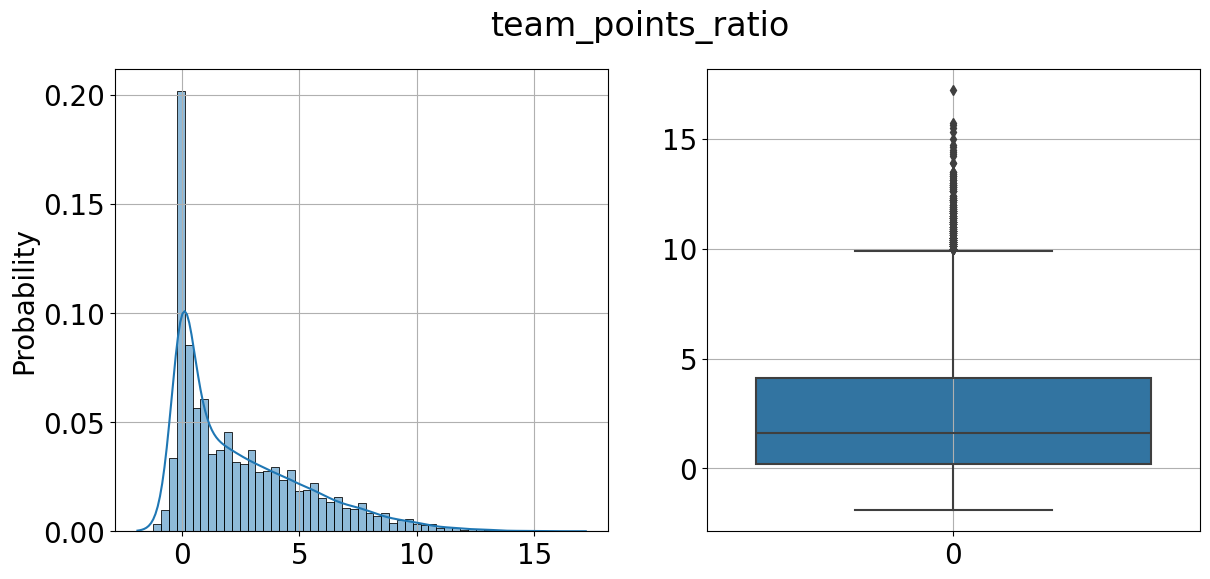

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


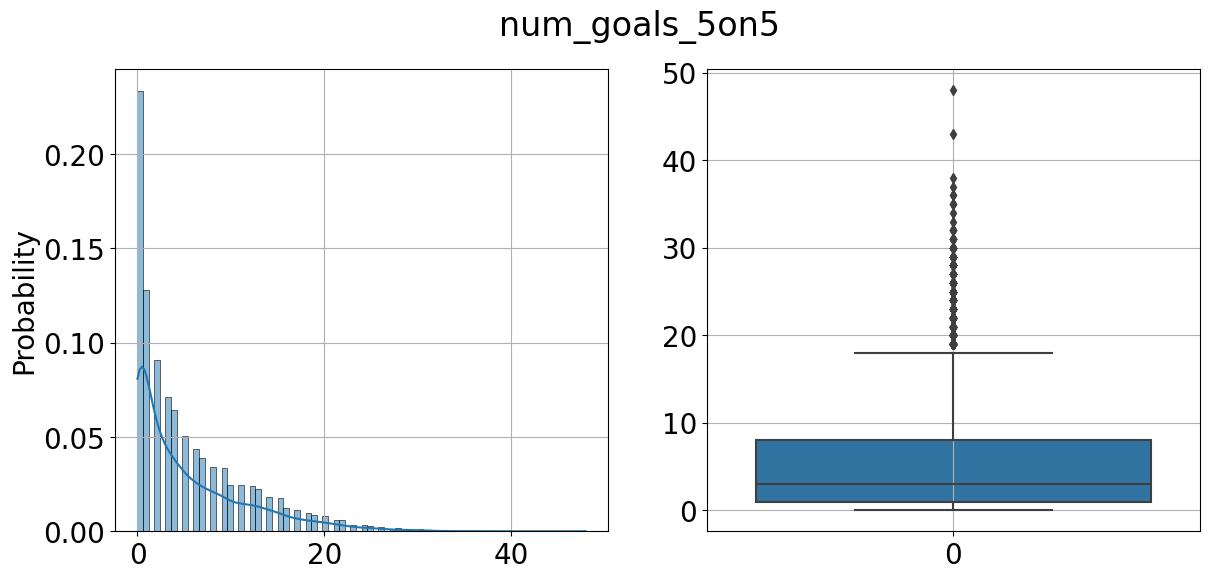

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


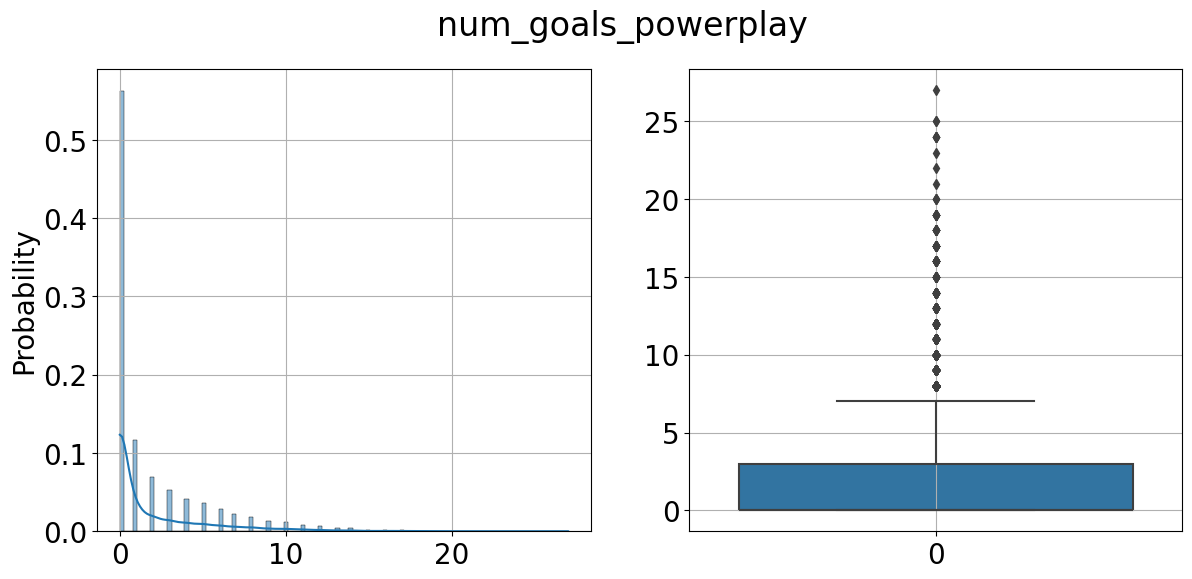

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


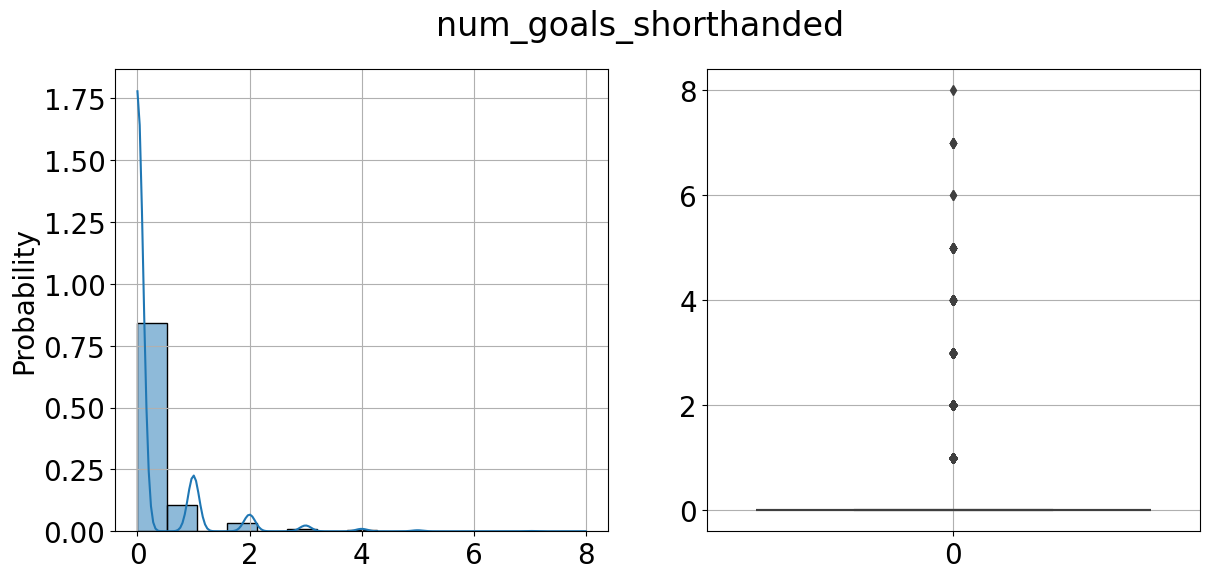

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


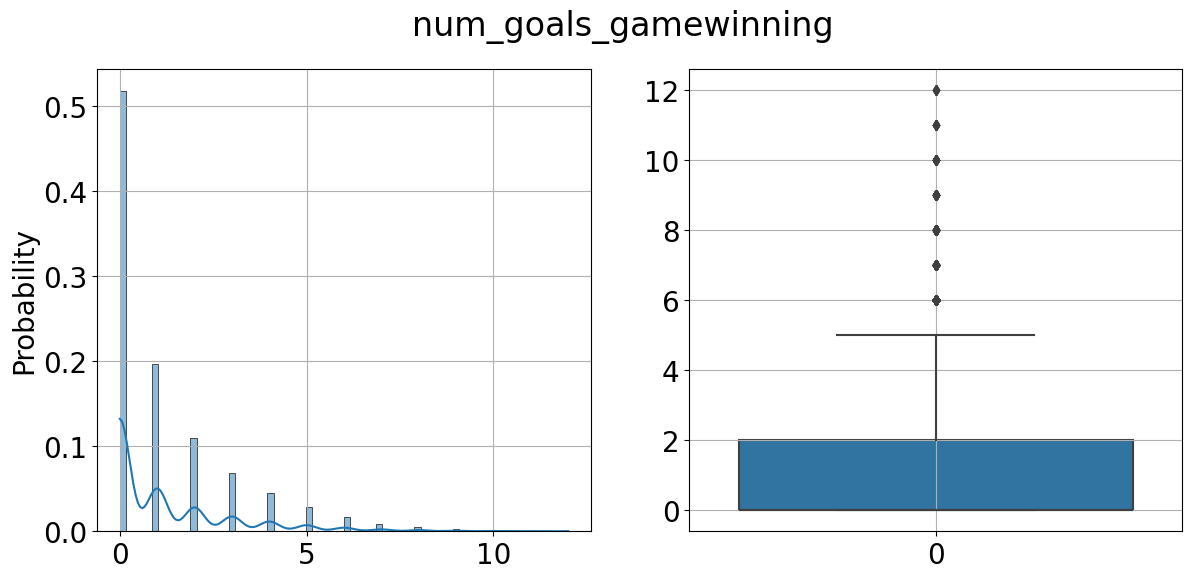

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


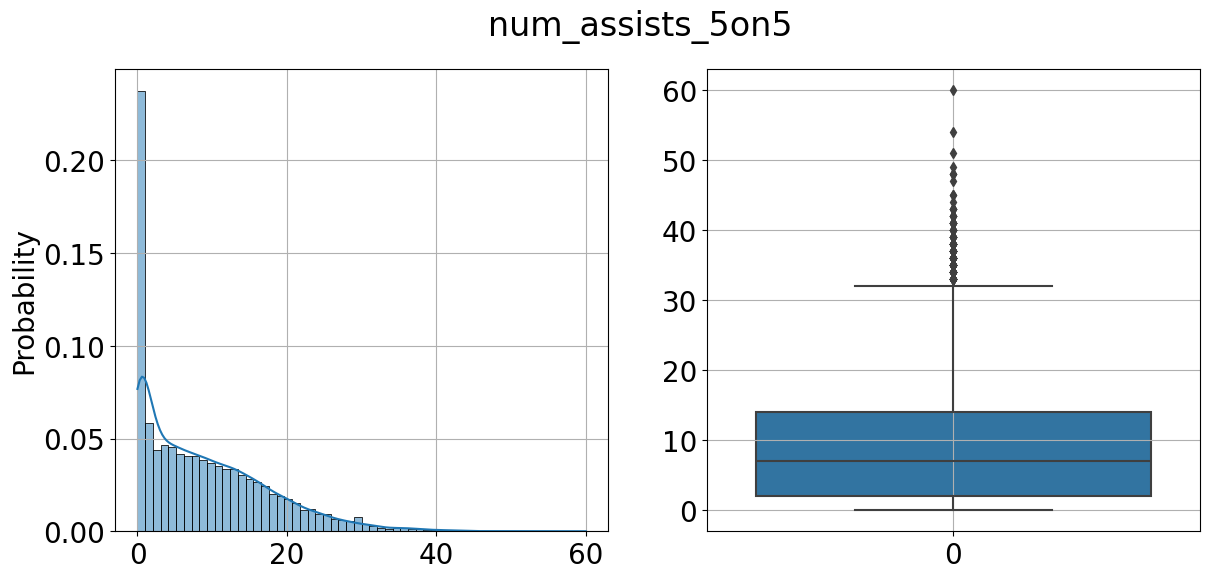

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


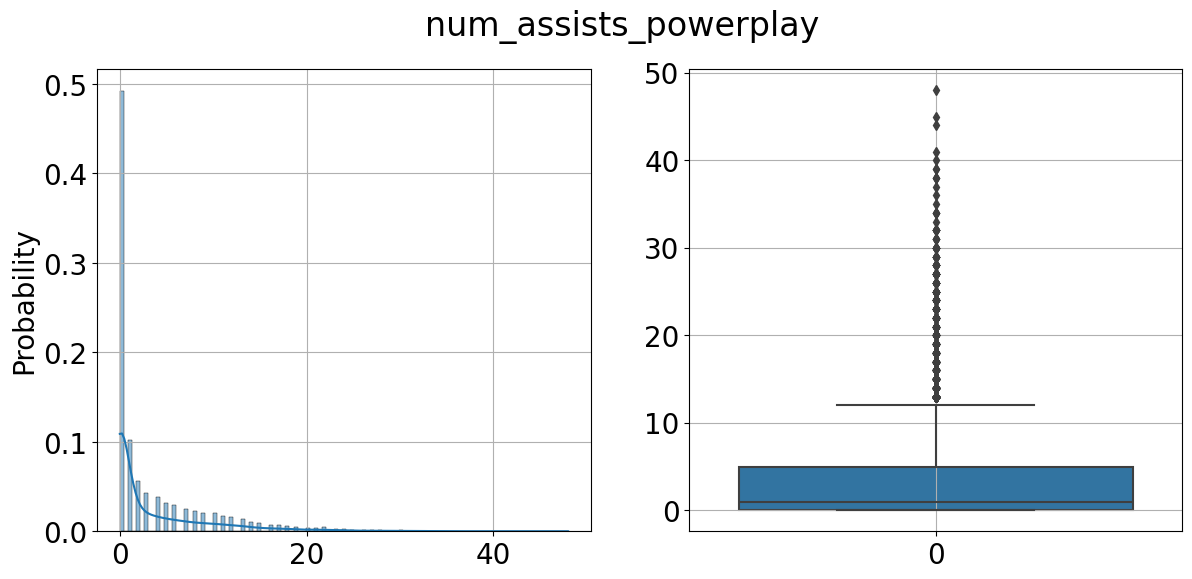

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


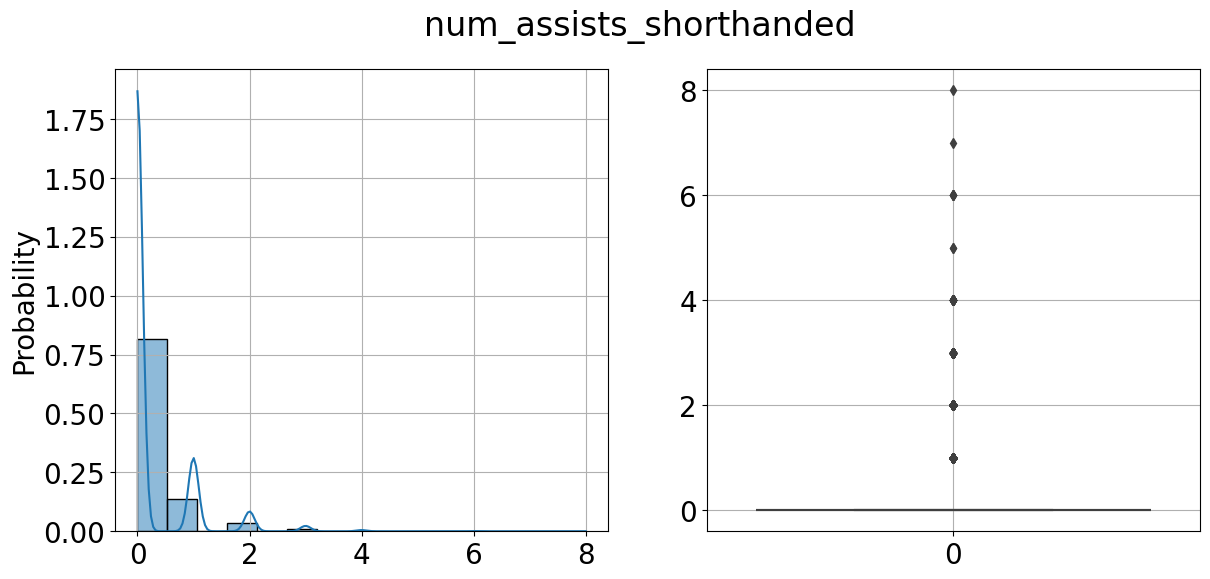

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


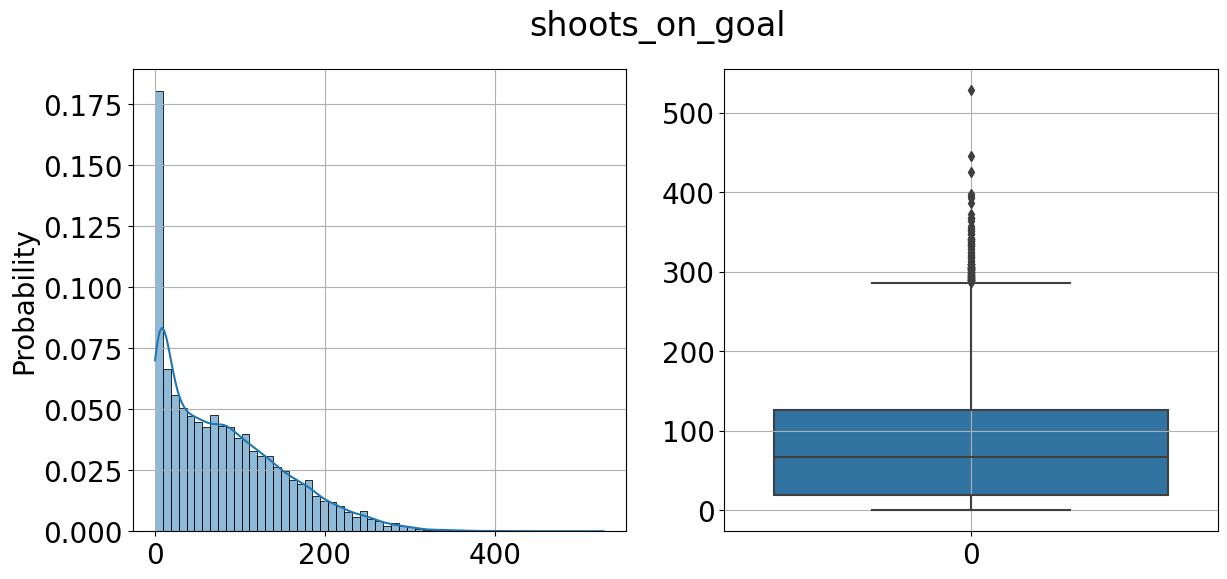

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


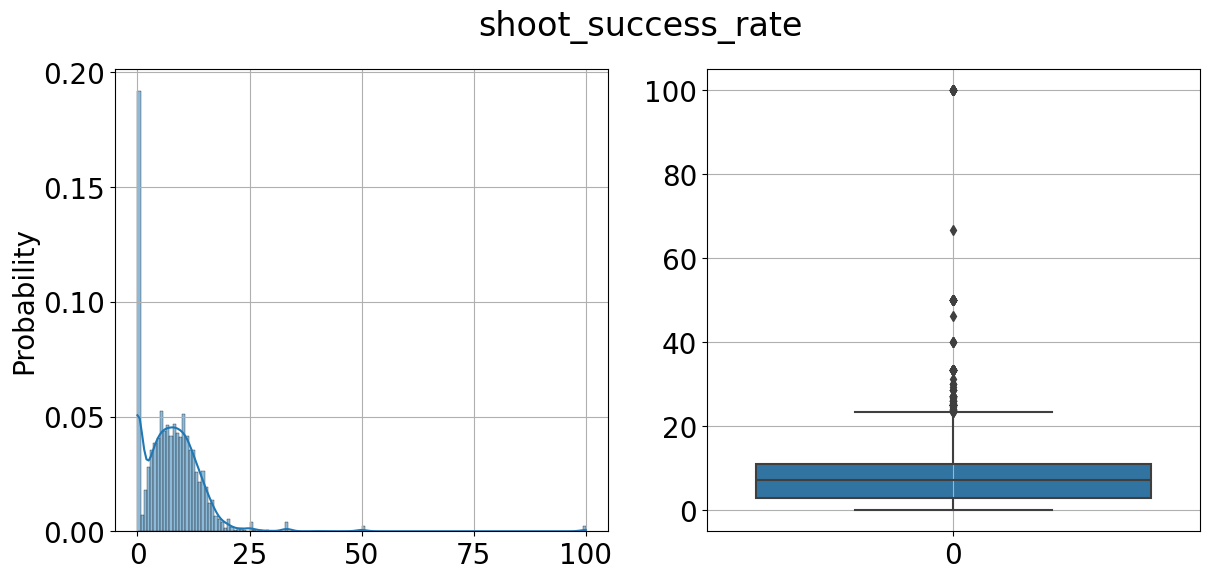

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


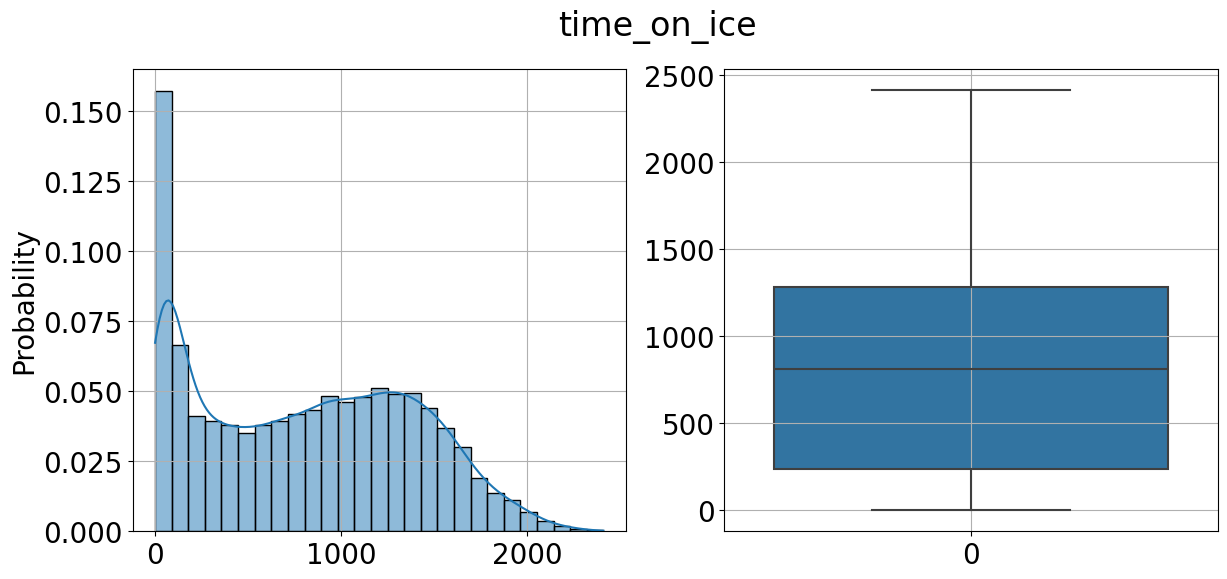

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


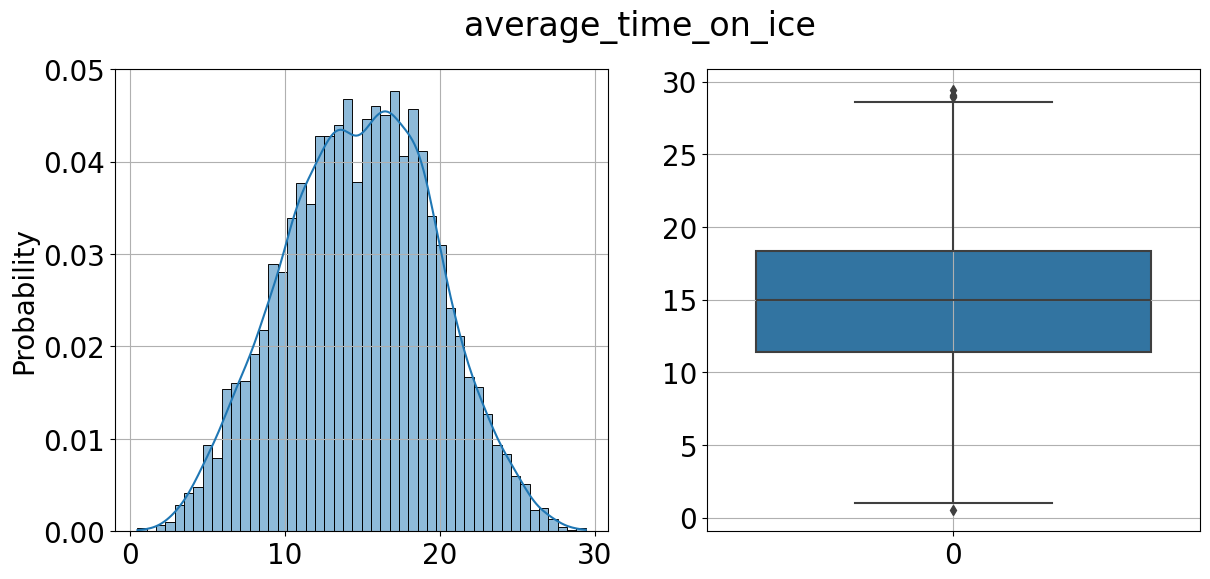

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


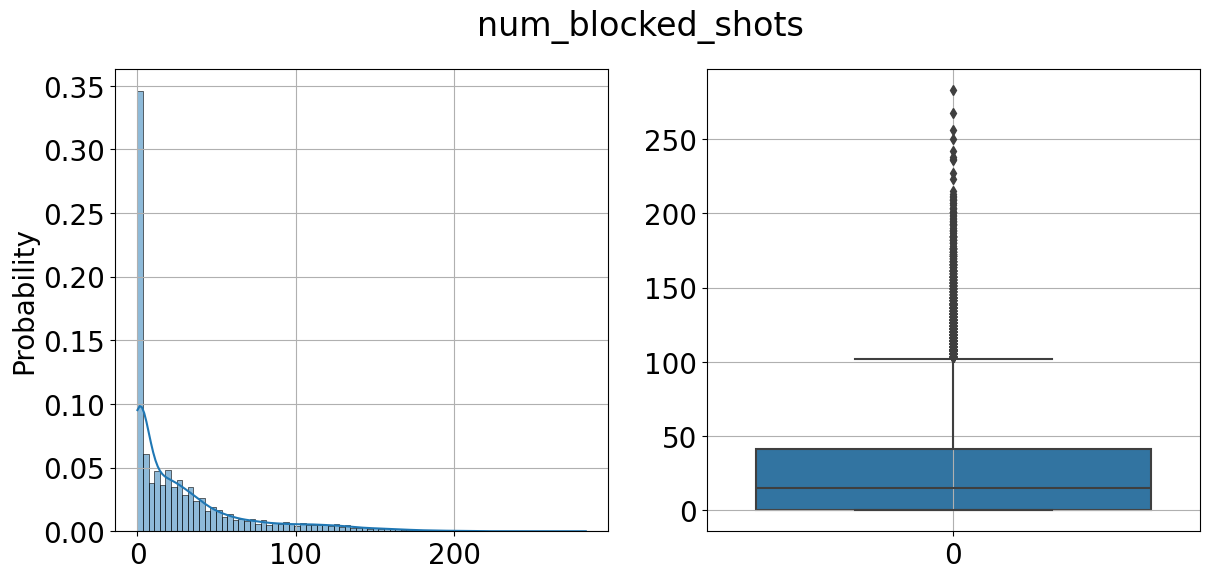

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


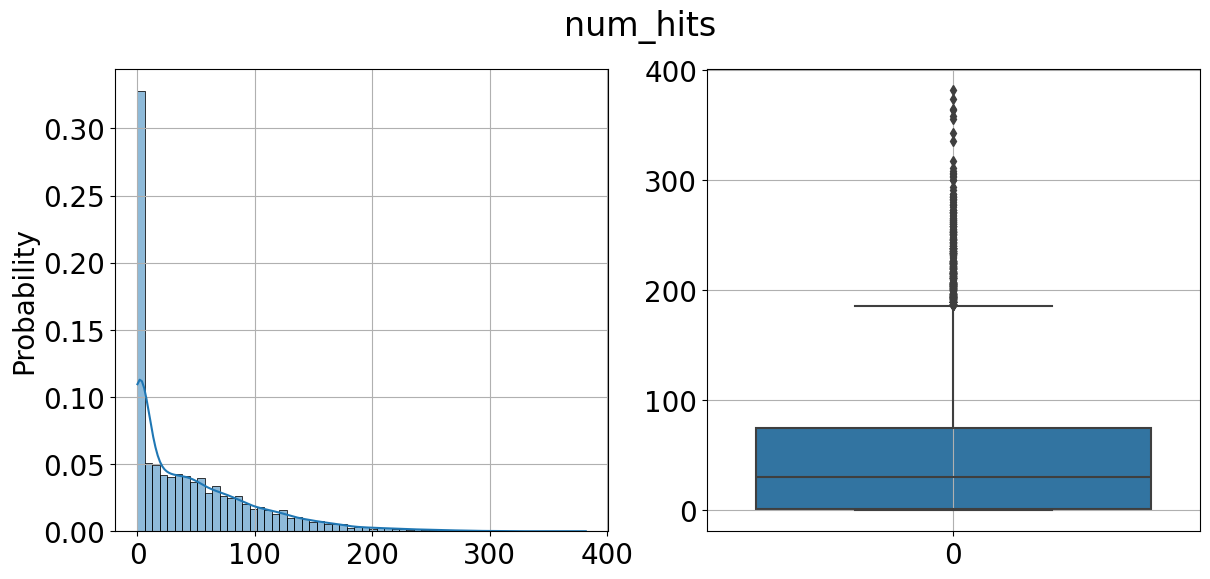

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


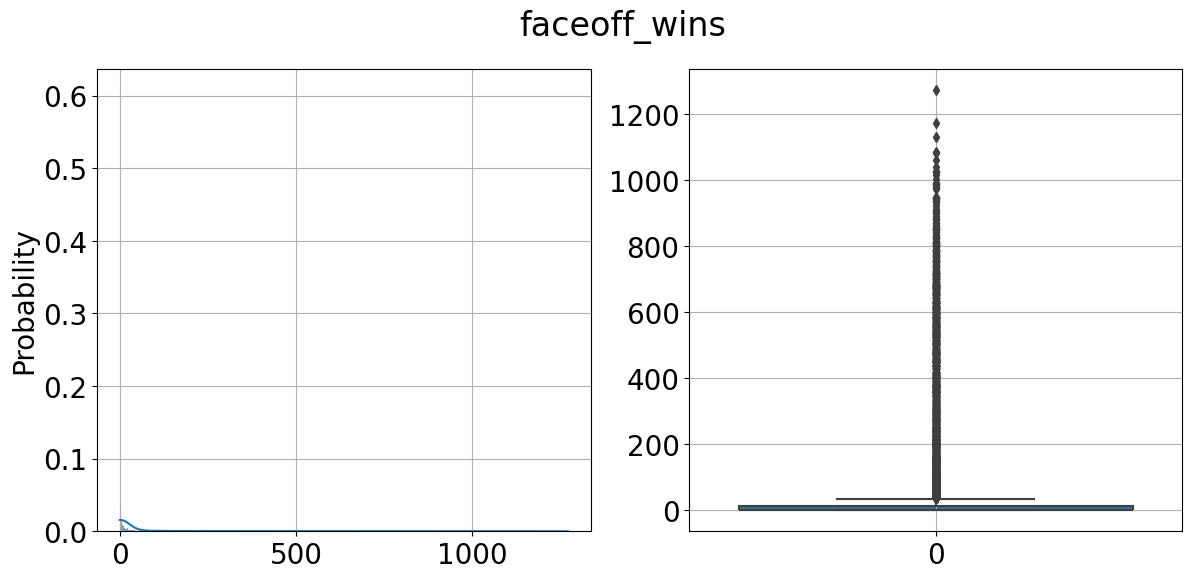

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


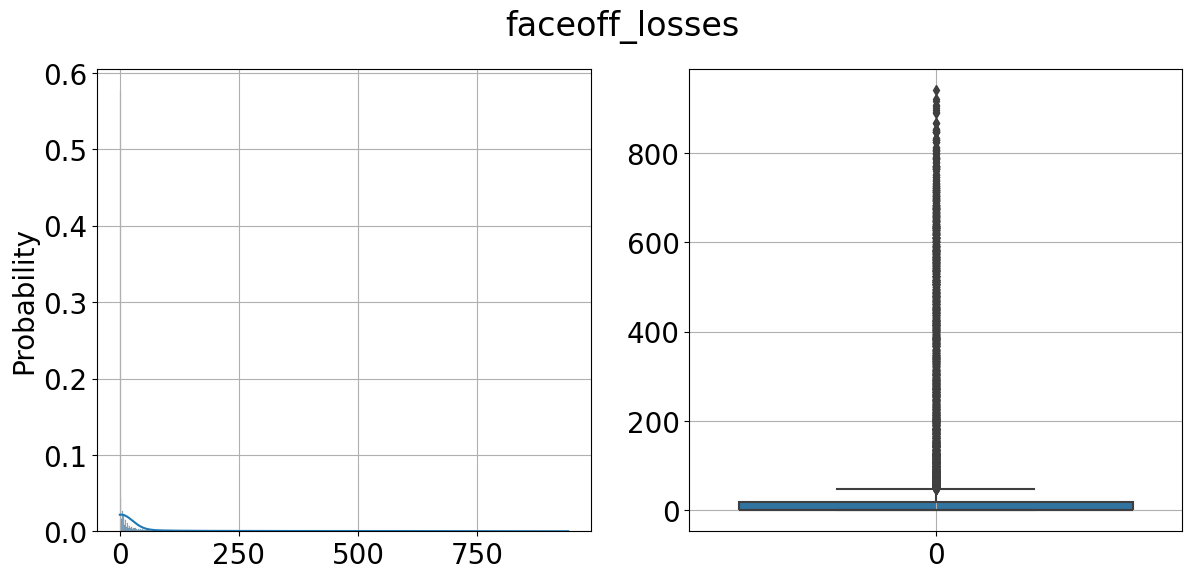

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


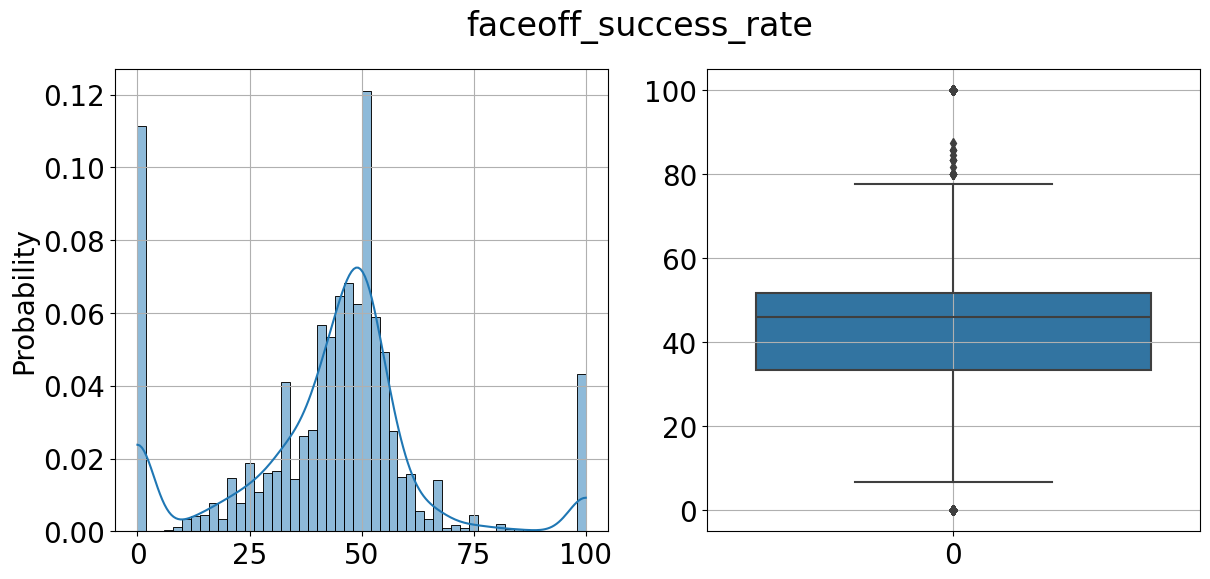

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


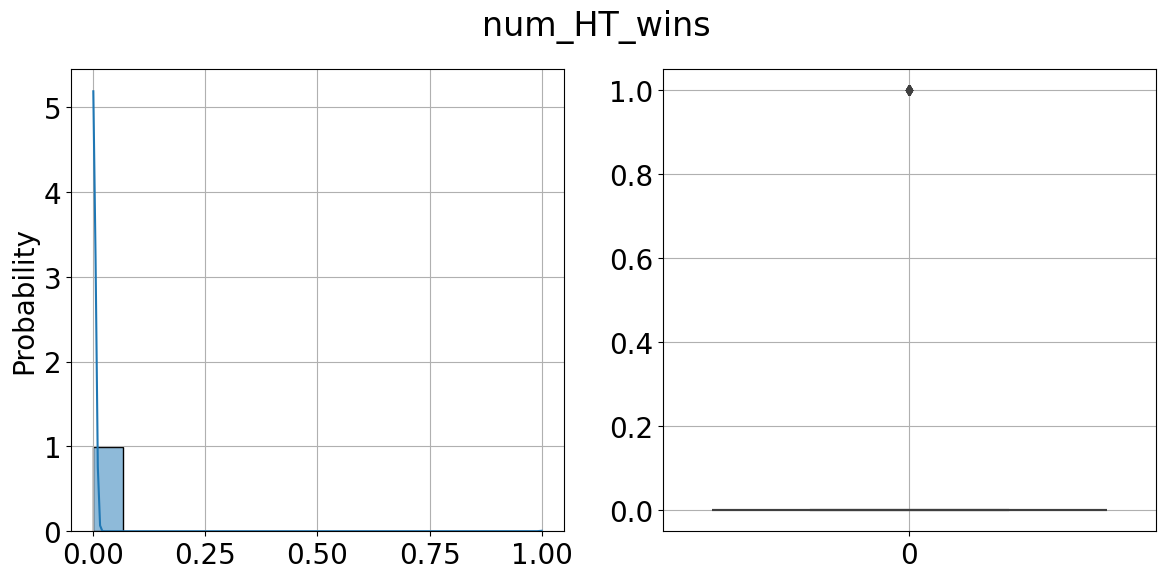

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


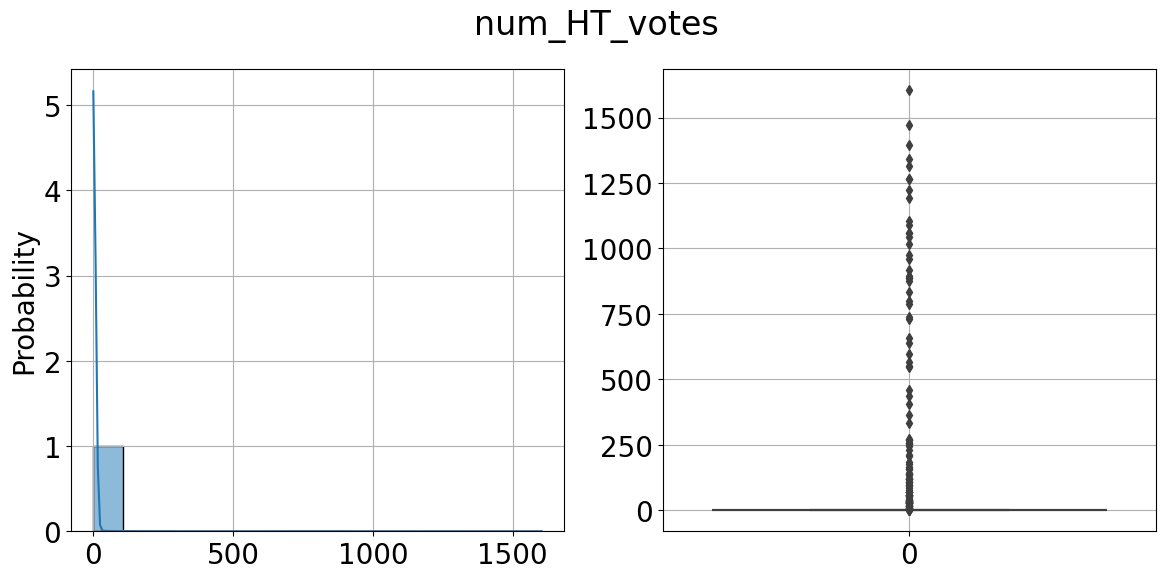

/Users/gorq/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


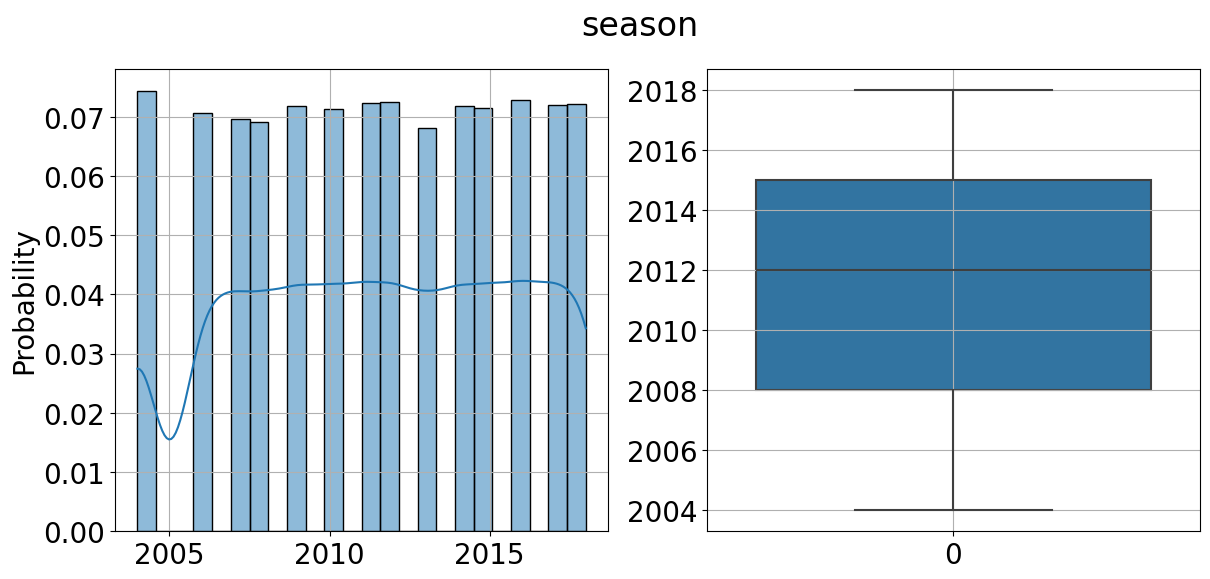

In [33]:
plt.rcParams['font.size'] = 20

for col in player_df.select_dtypes([np.float64, np.int64]):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(player_df[col], ax=ax[0], stat='probability', kde=True)
    sns.boxplot(player_df[~player_df[col].isna()][col], ax=ax[1])
    ax[0].set_xlabel('')
    ax[1].set_ylabel('')

    for _ax in ax:
        _ax.grid()

    fig.suptitle(col)
    plt.show(fig)
    plt.close(fig)


''

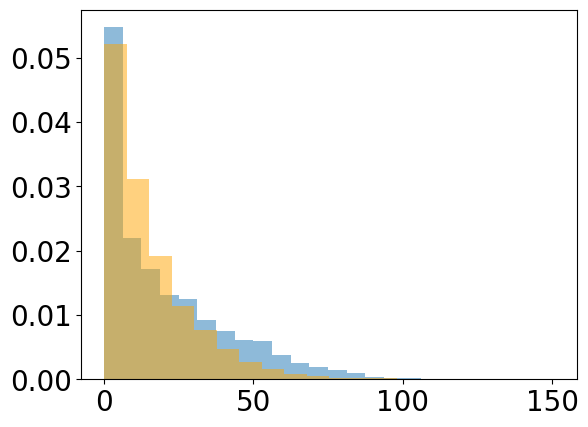

In [34]:
fig, ax = plt.subplots()

sample = np.random.exponential(scale=15, size=10_000)
bin = np.arange(0,150,0.1)
ax.hist(player_df['points'], bins=20, density=True, alpha=0.5)
ax.hist(sample, bins=20, density=True, color='orange', alpha=0.5)
;

We see that some attributes seem more like a log-distribution. Let's therefore plot those as such.

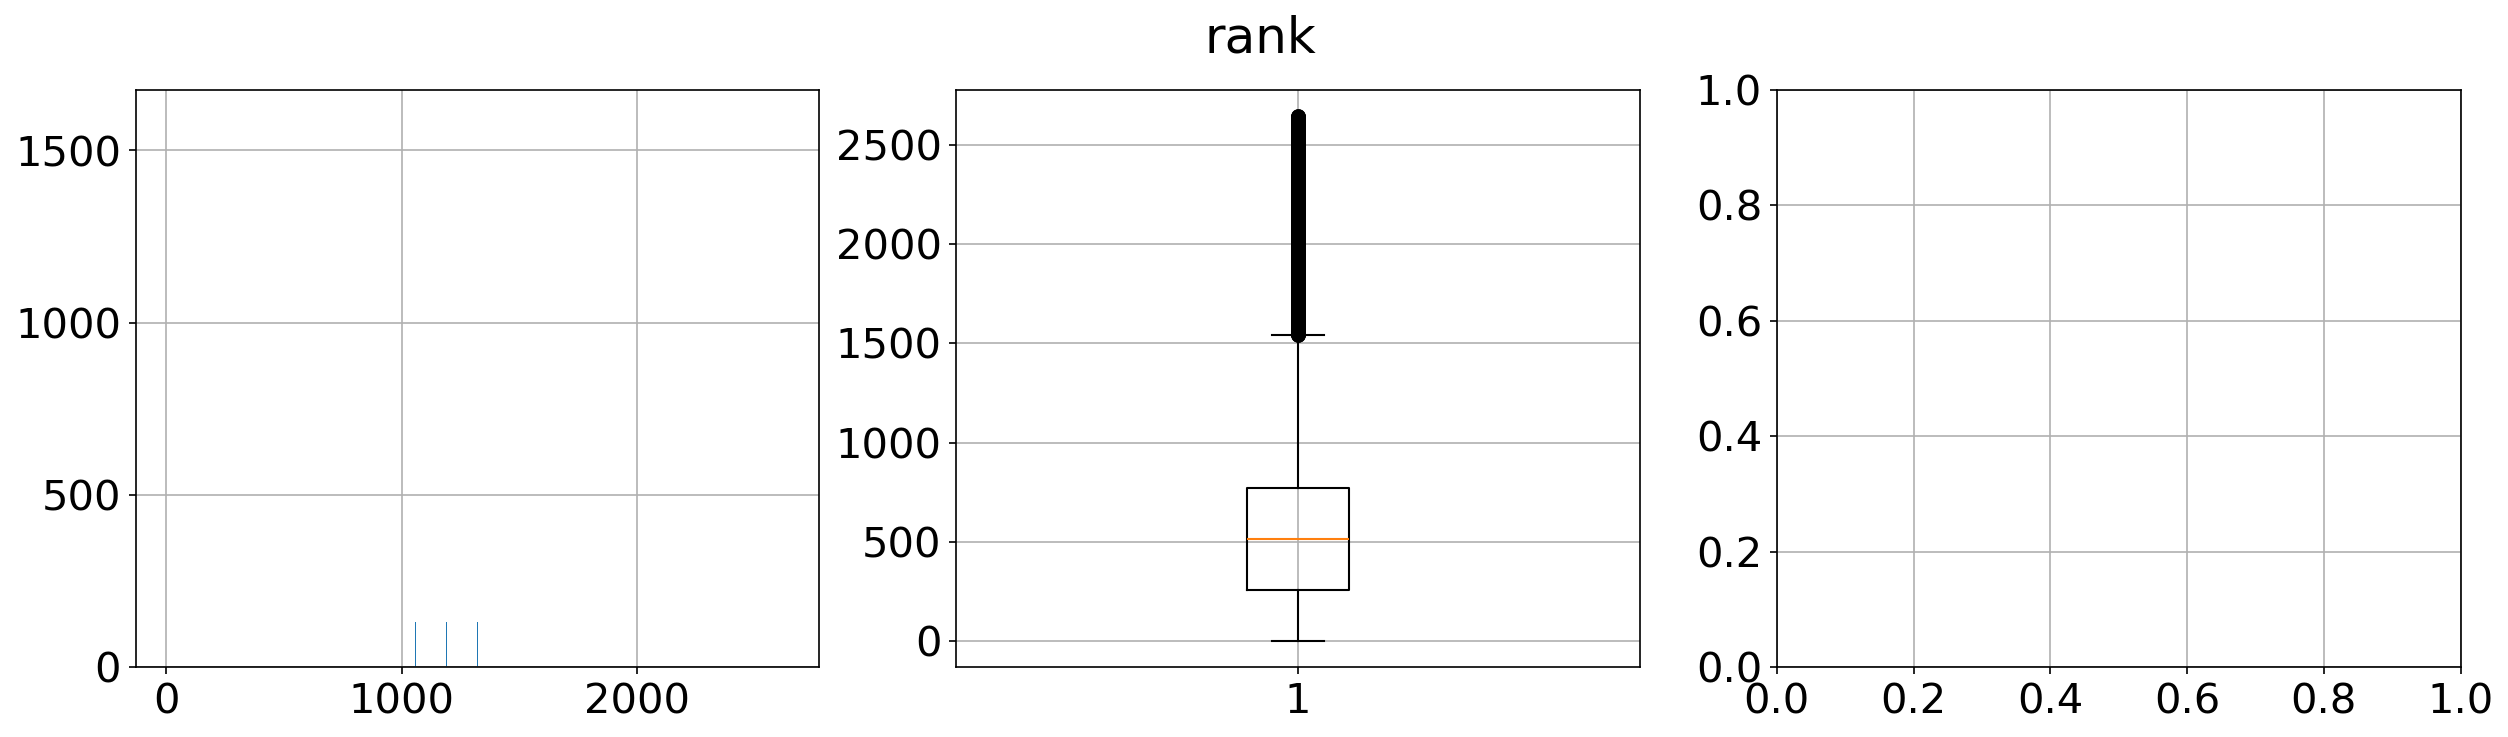

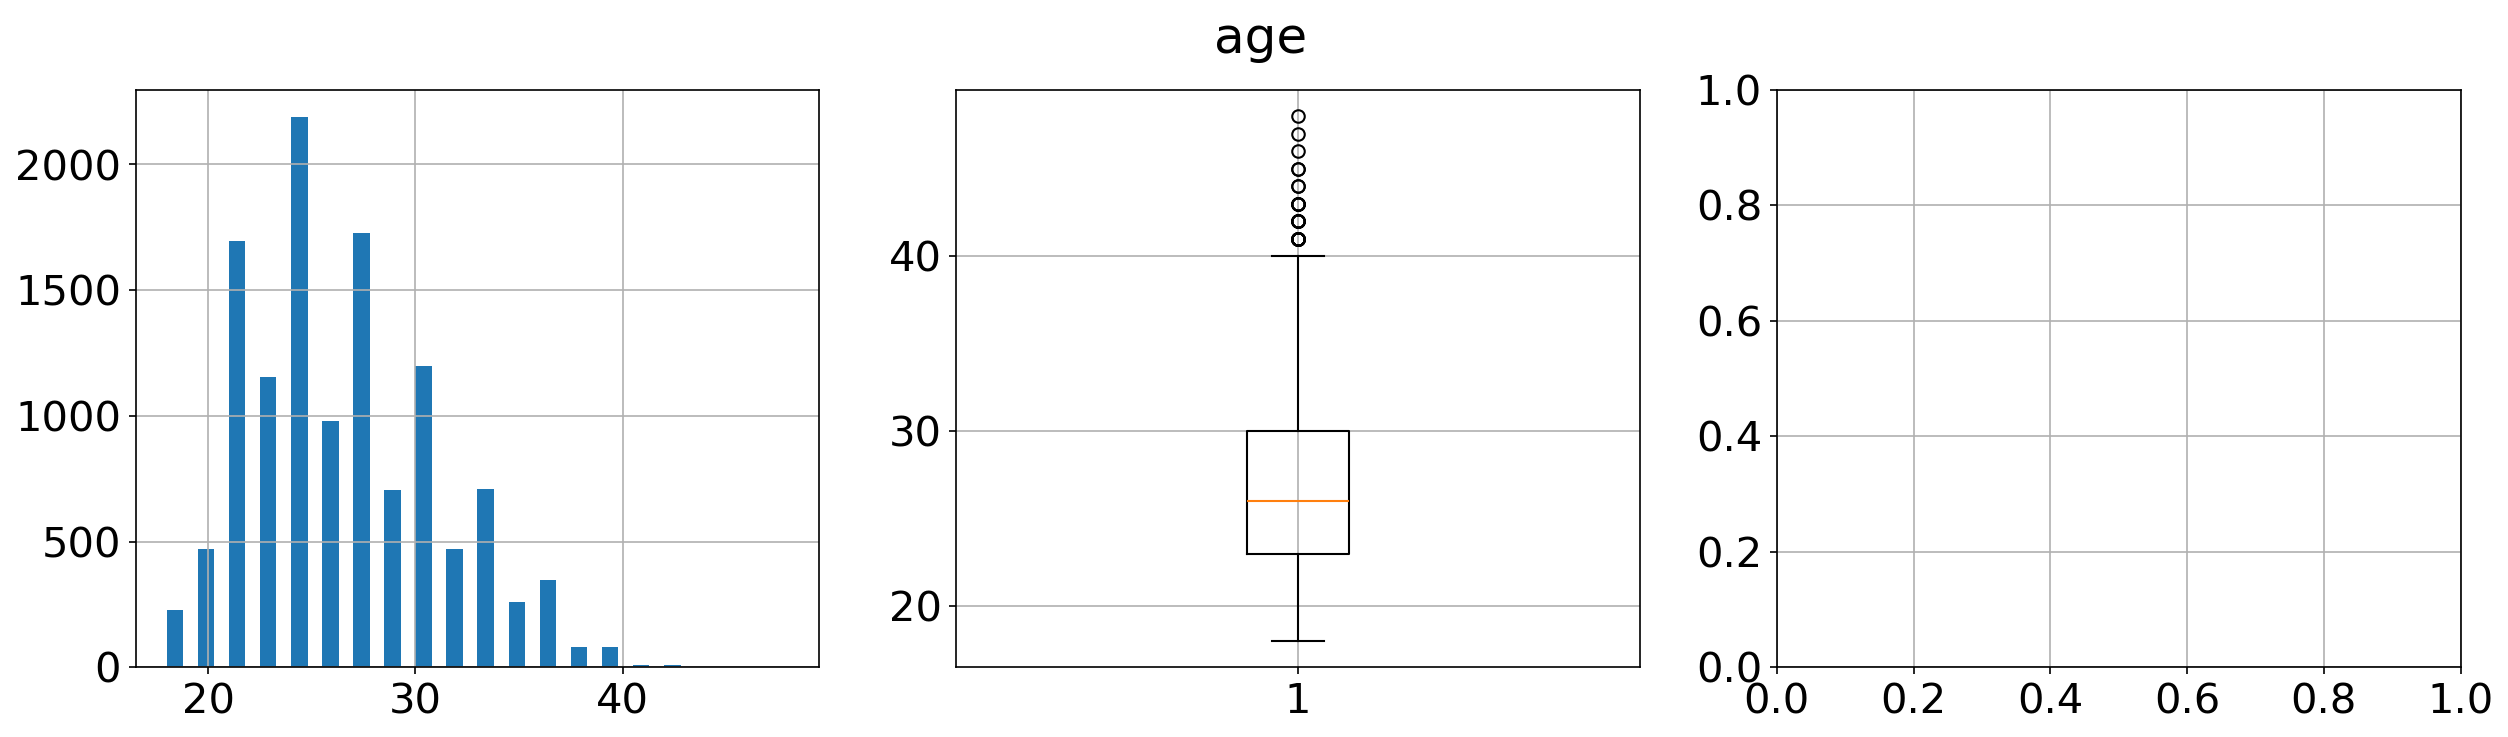

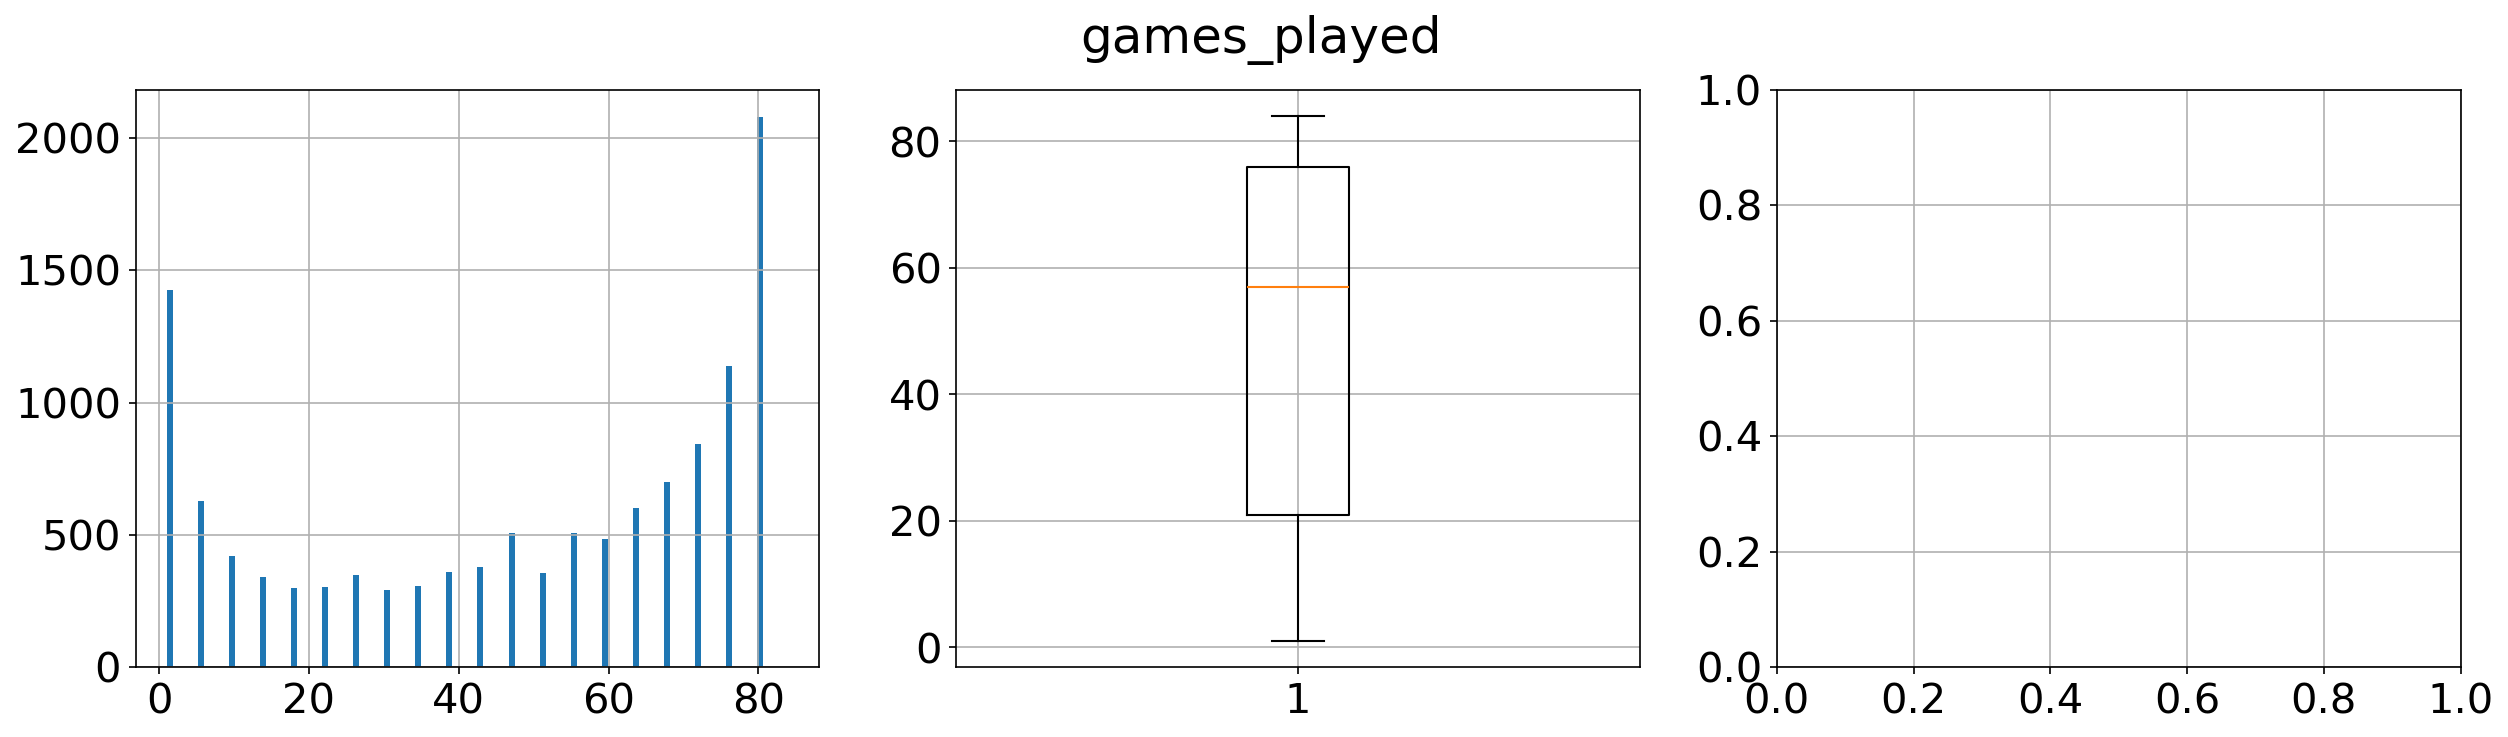

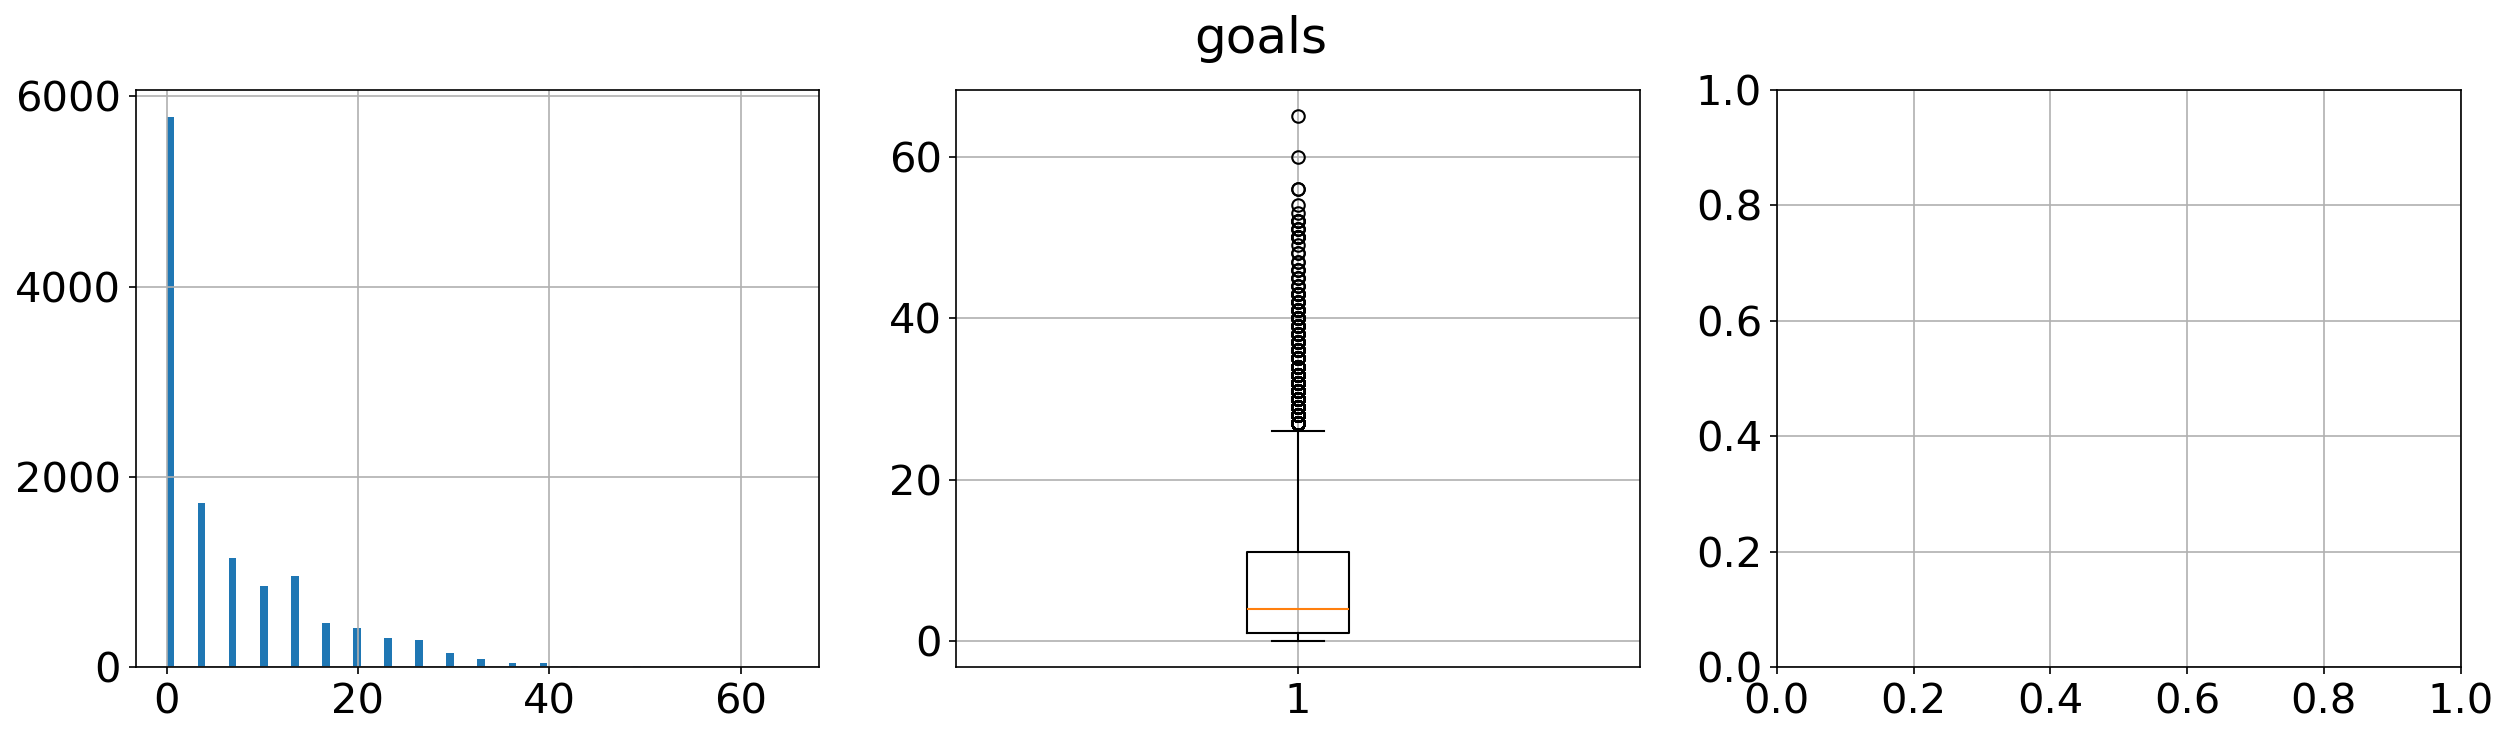

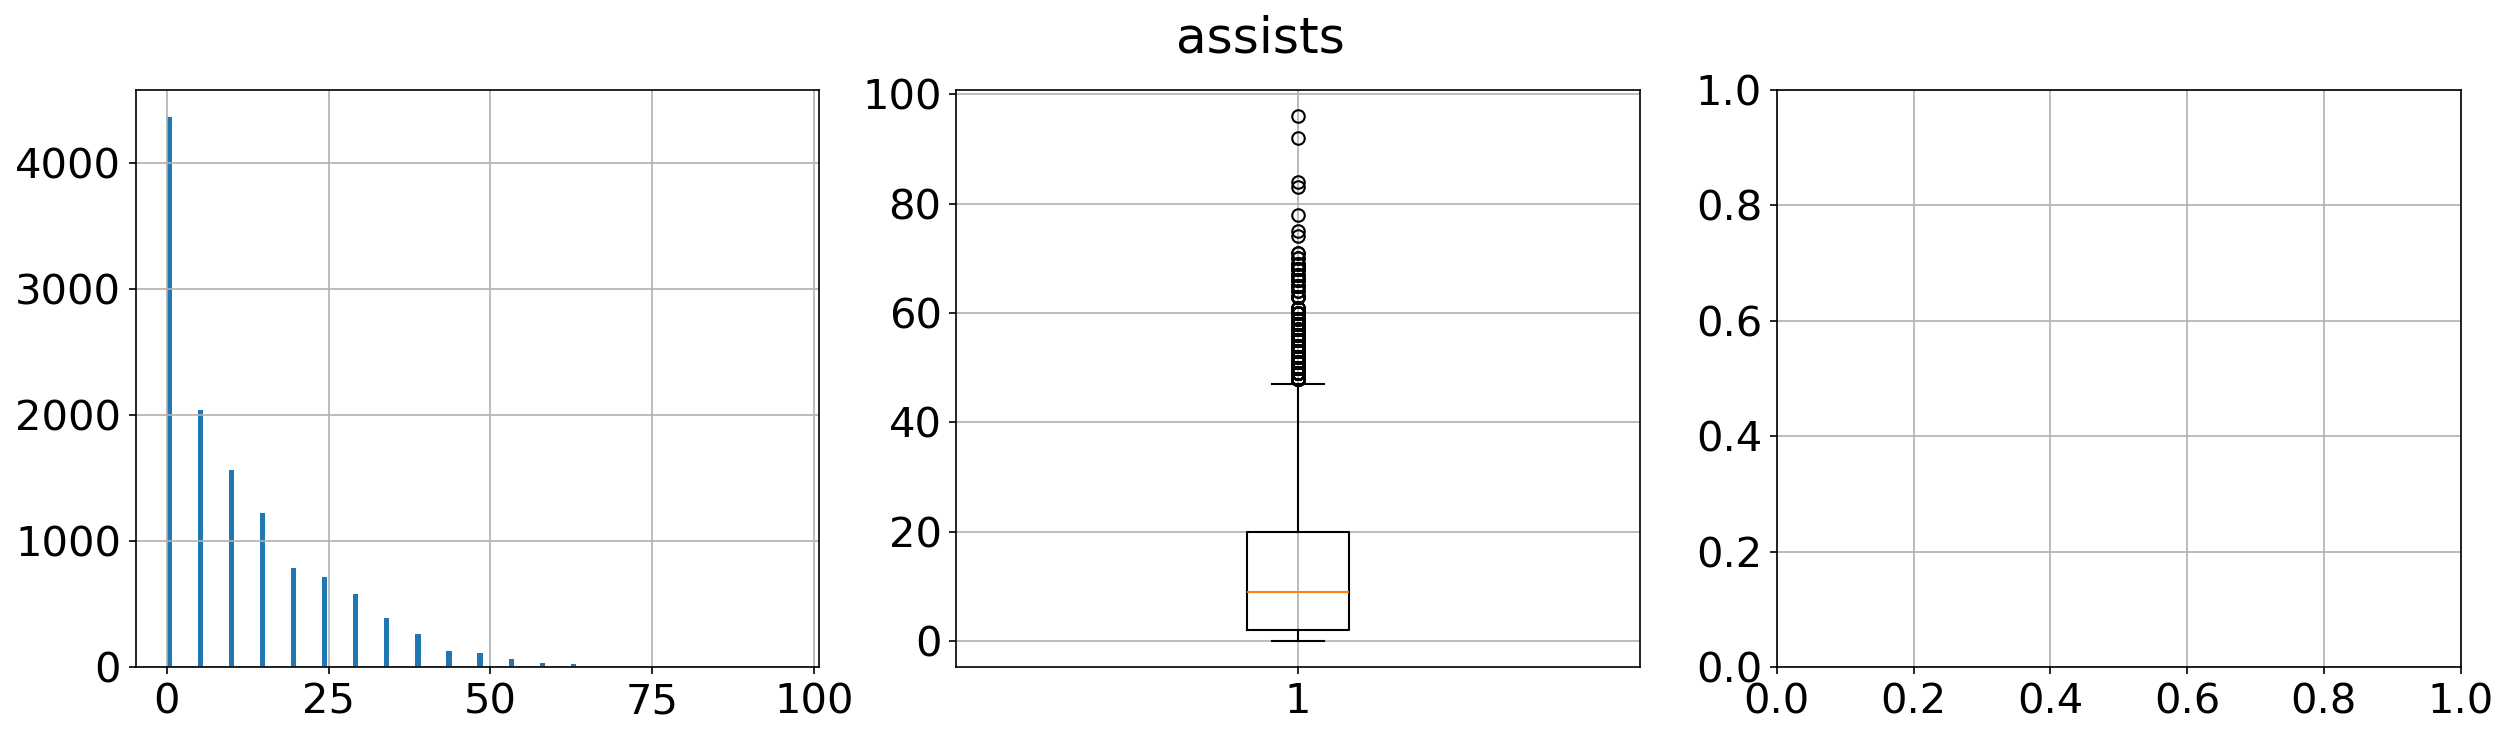

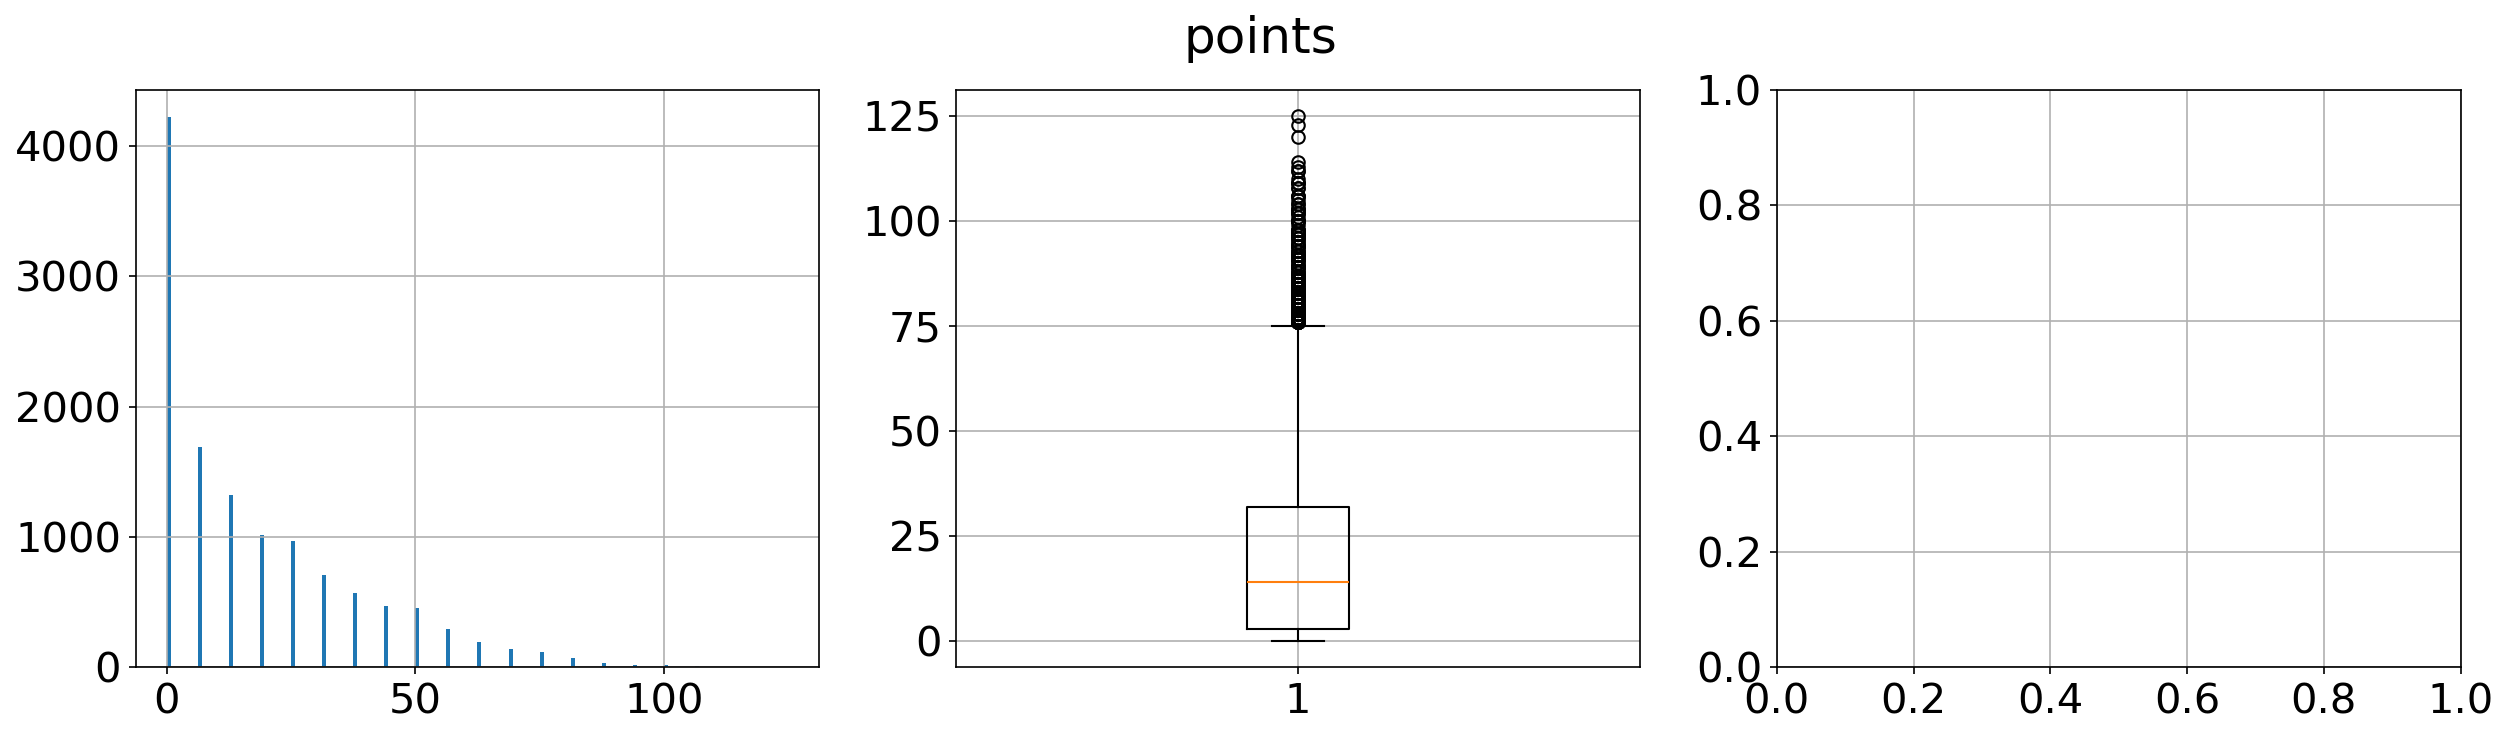

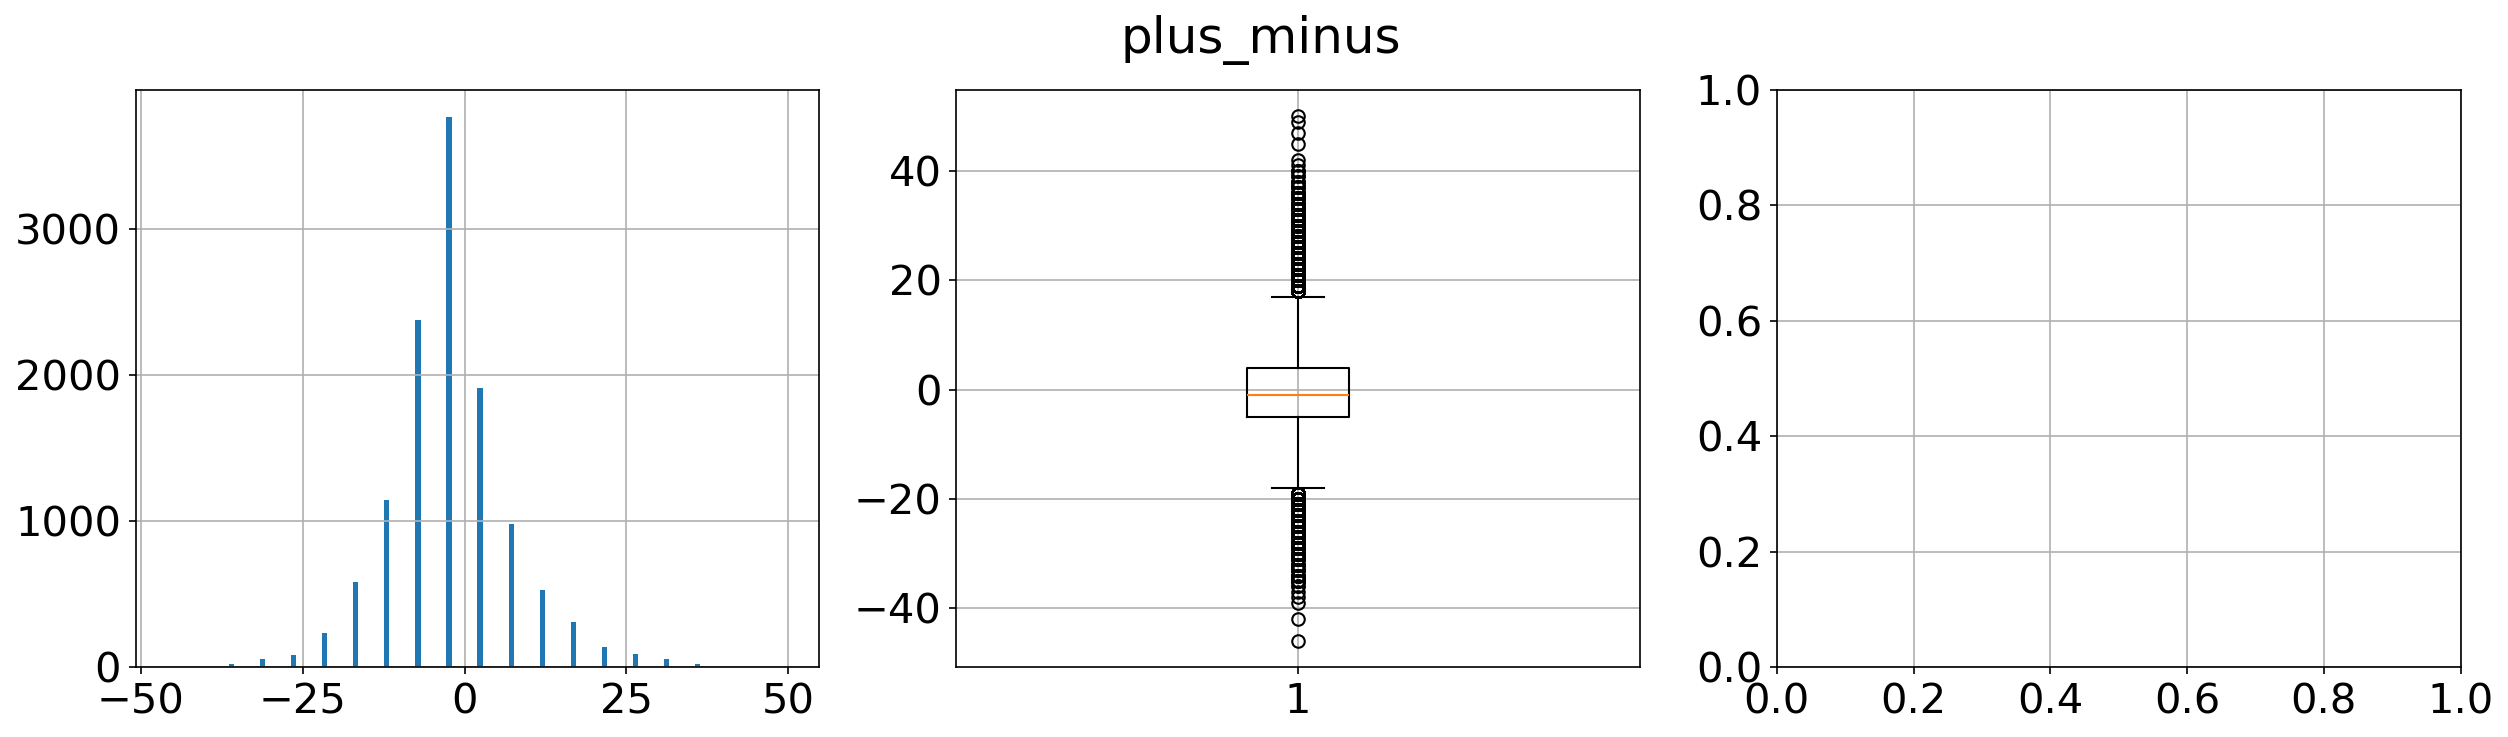

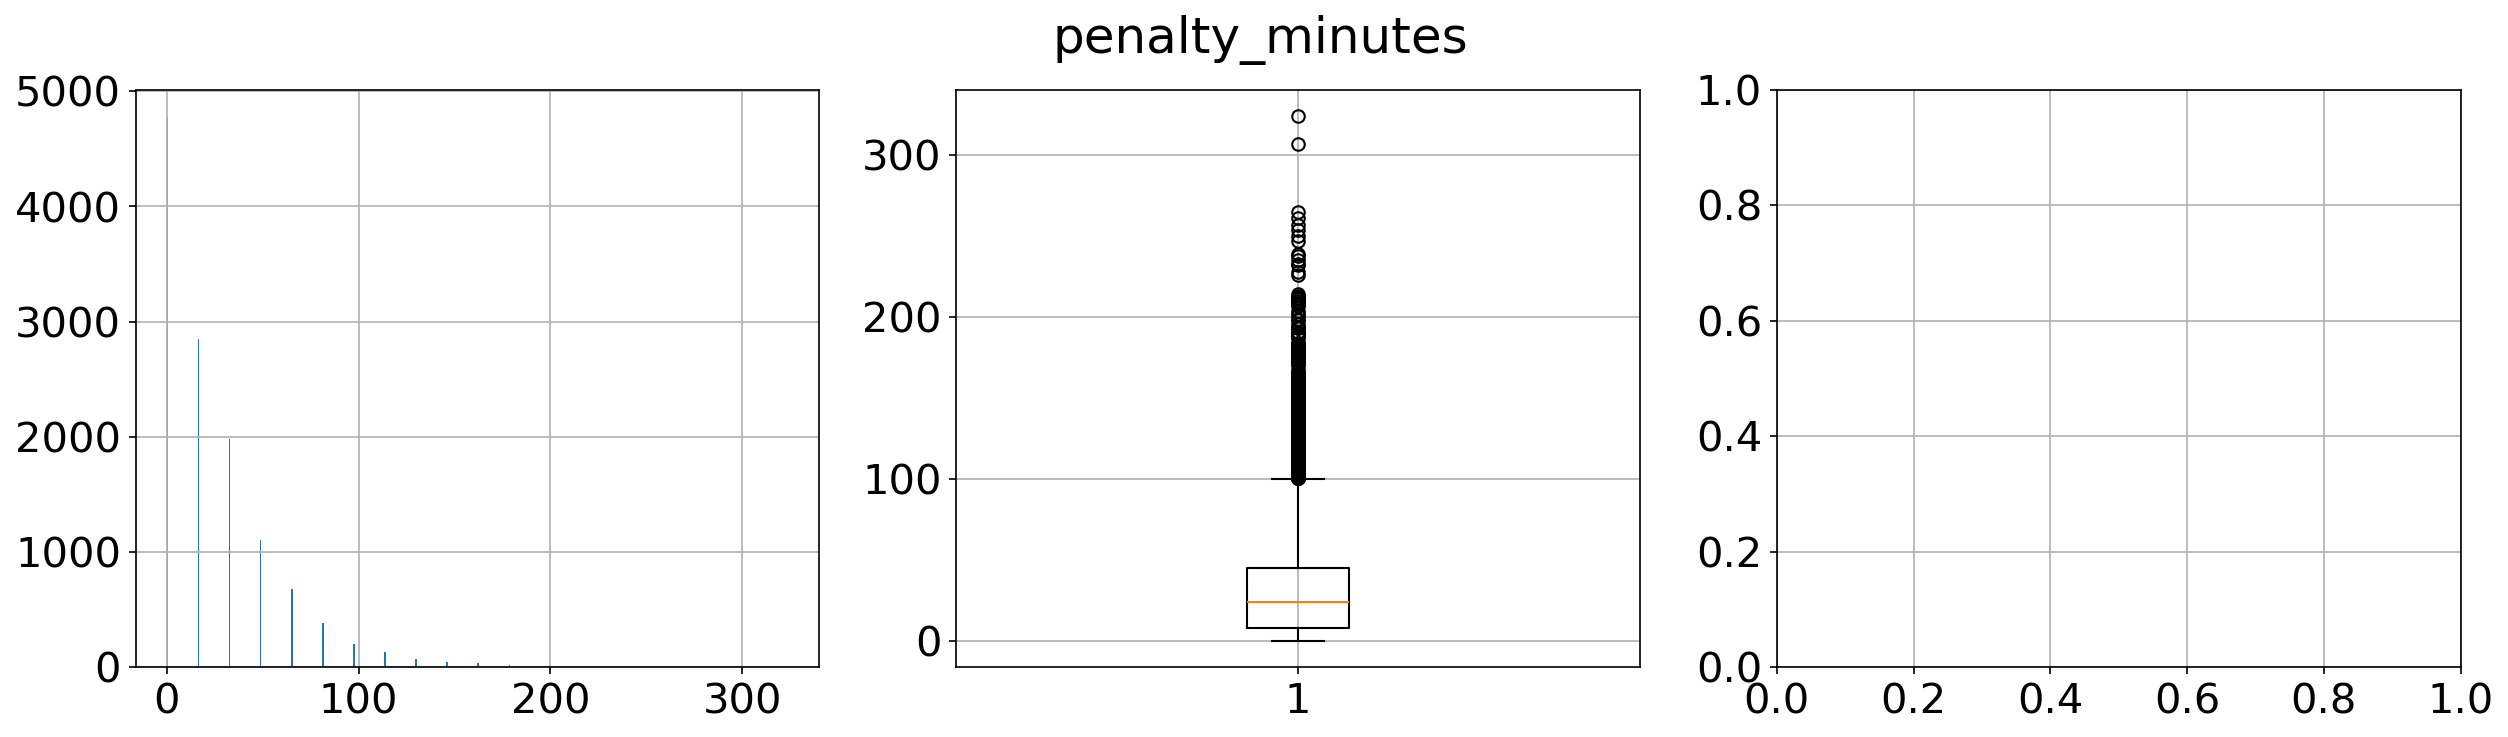

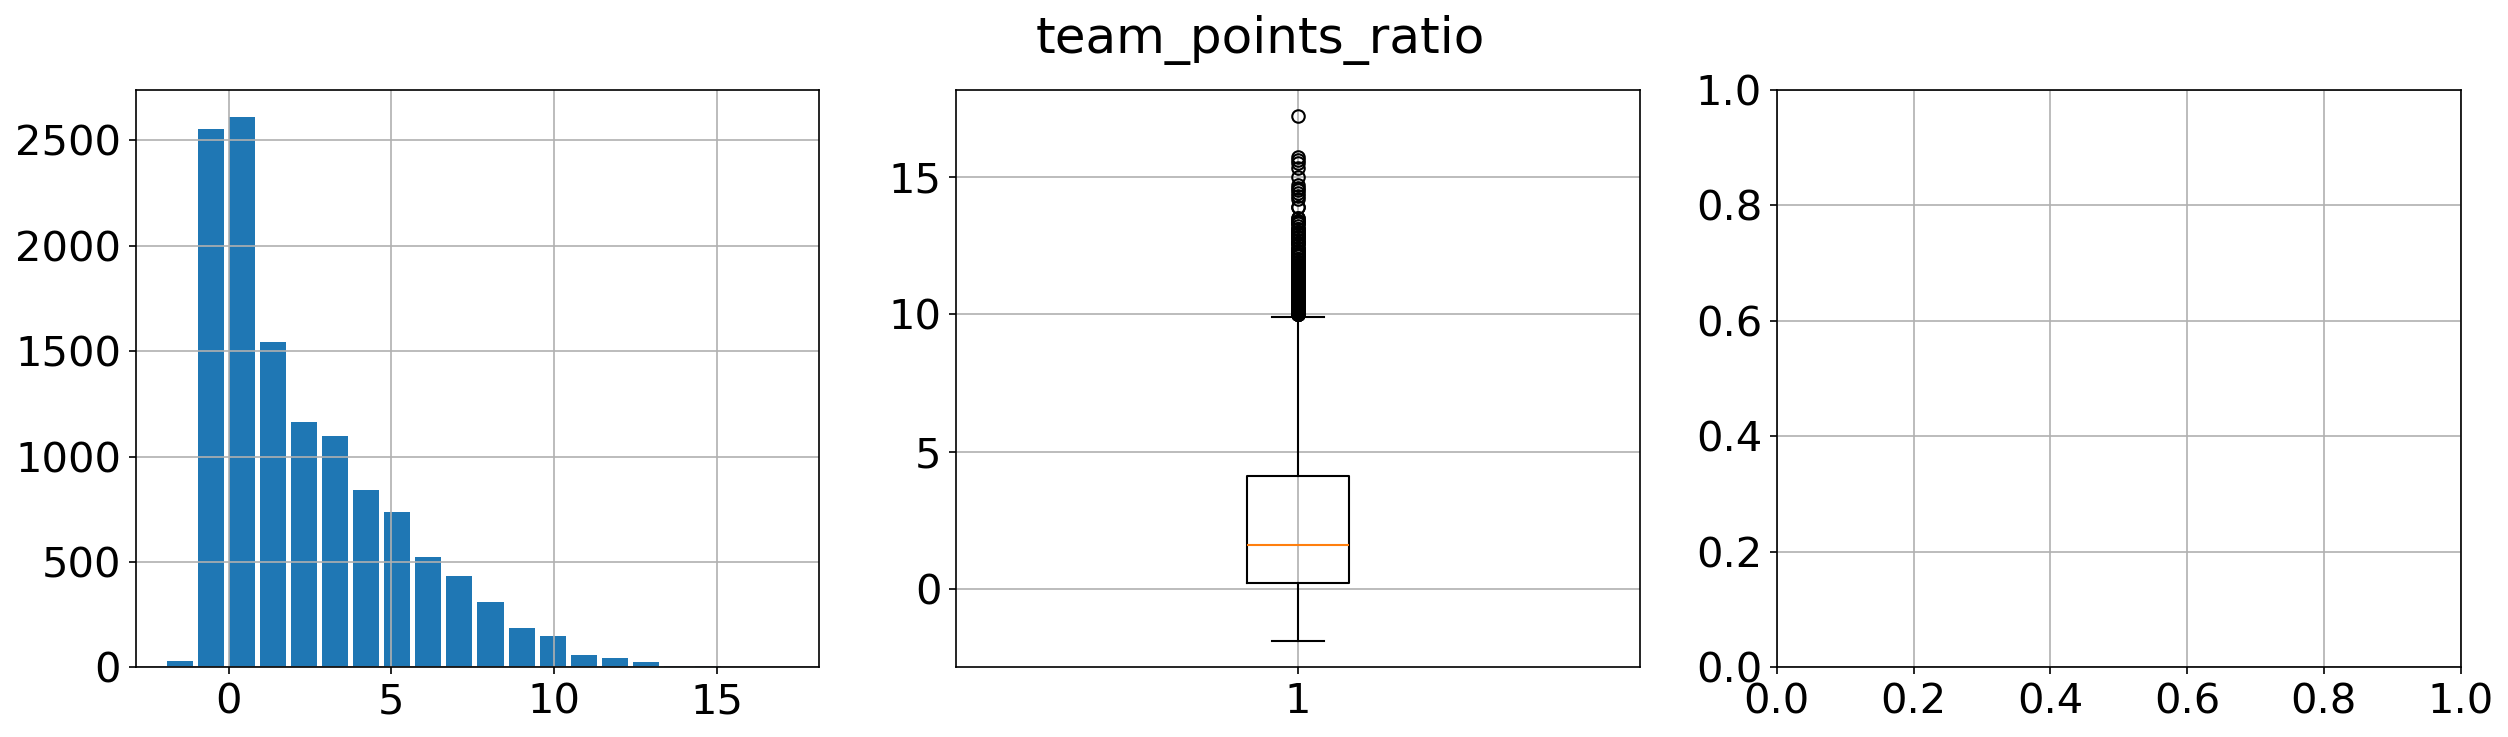

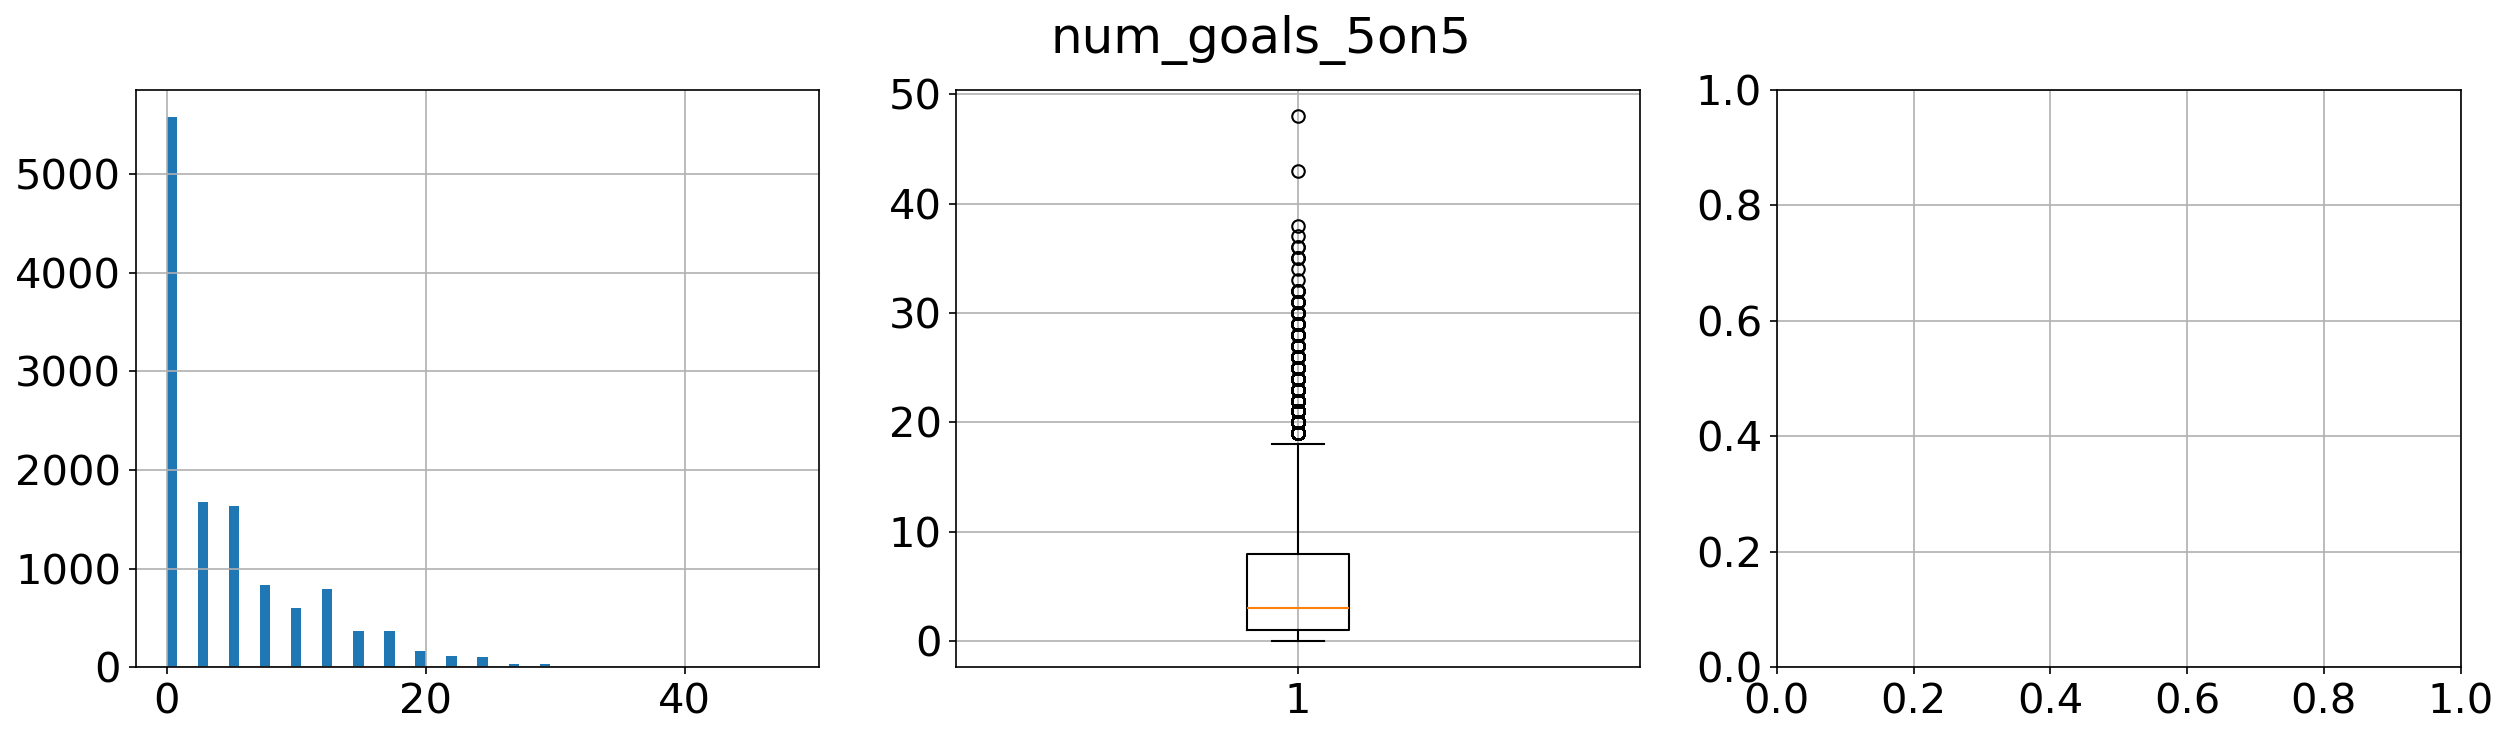

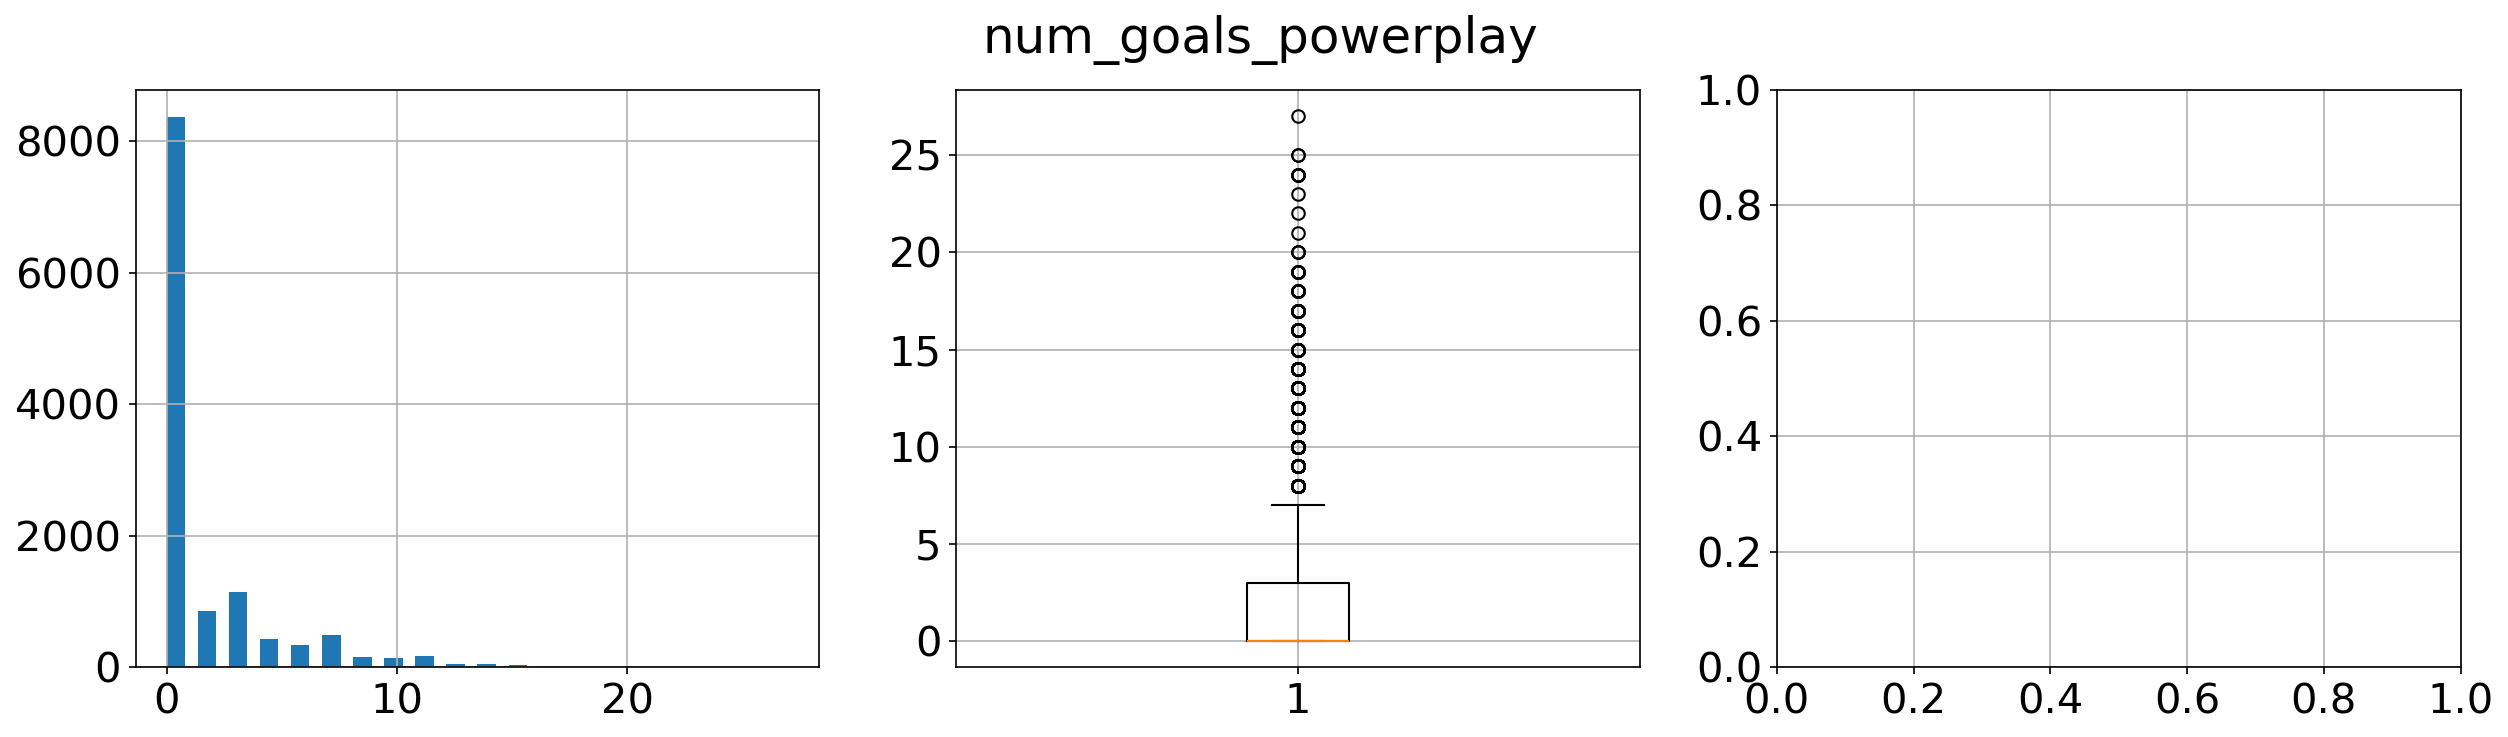

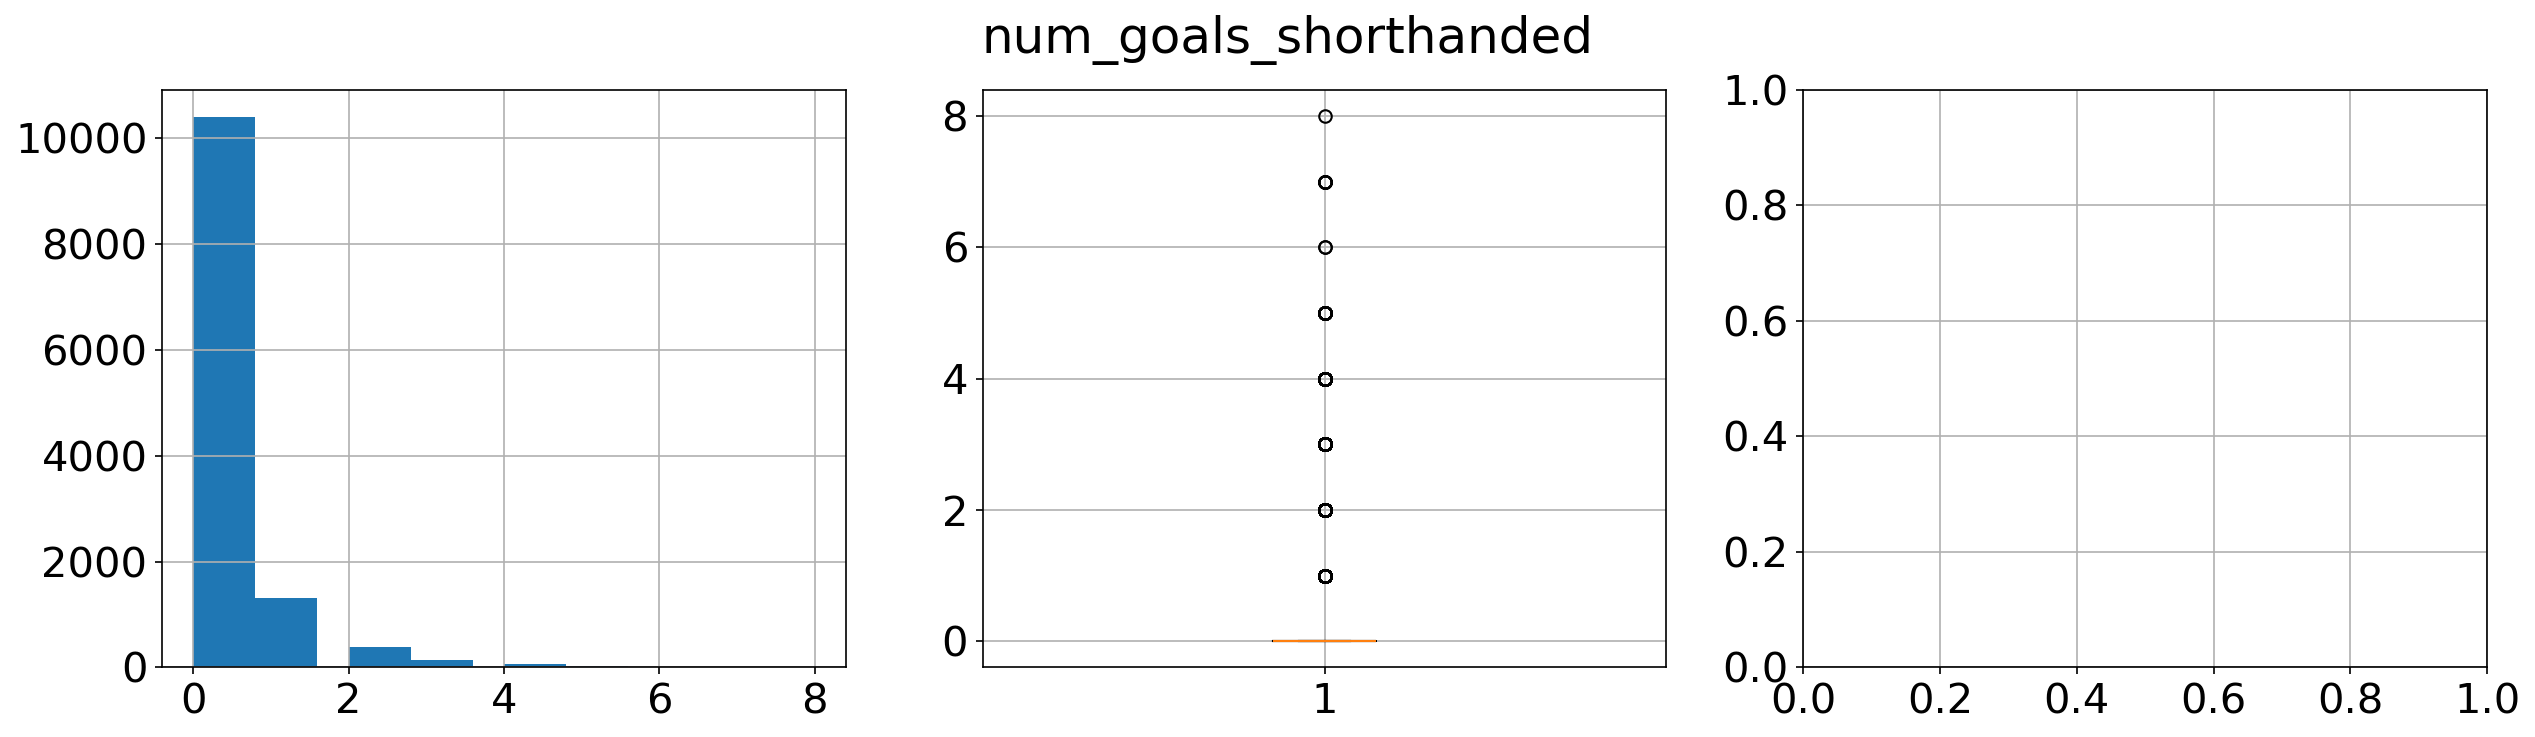

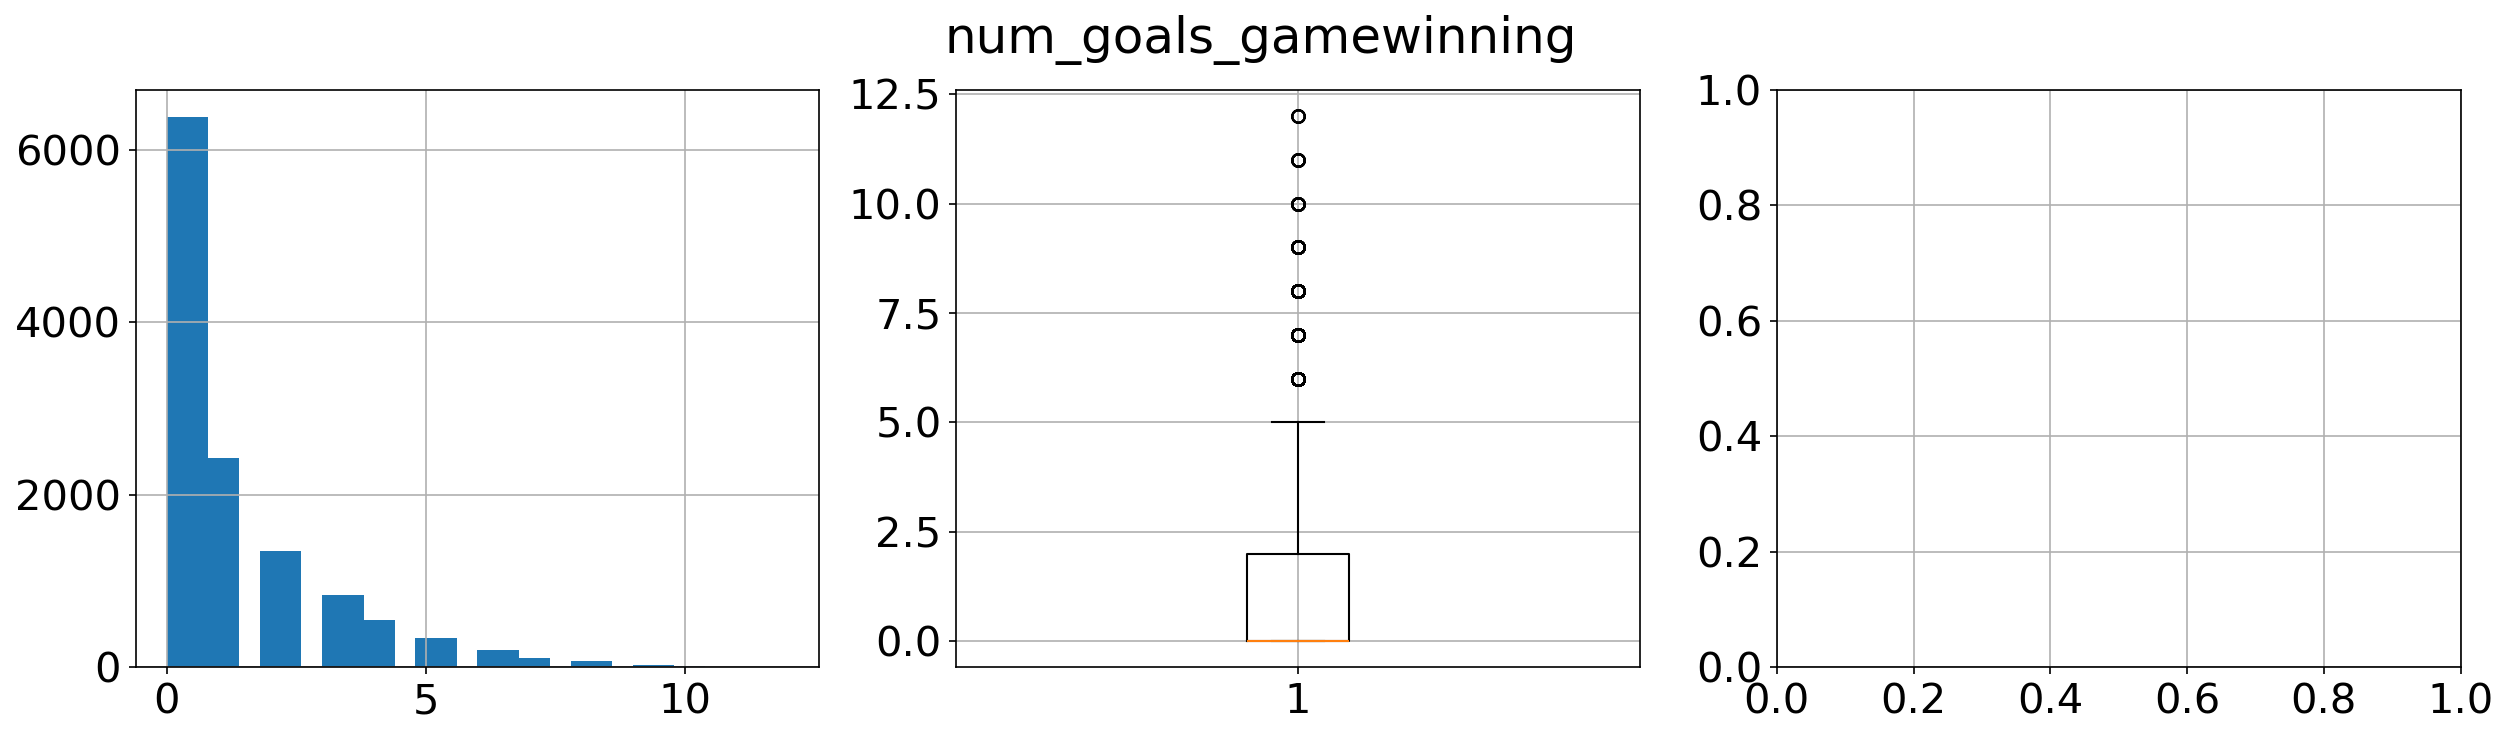

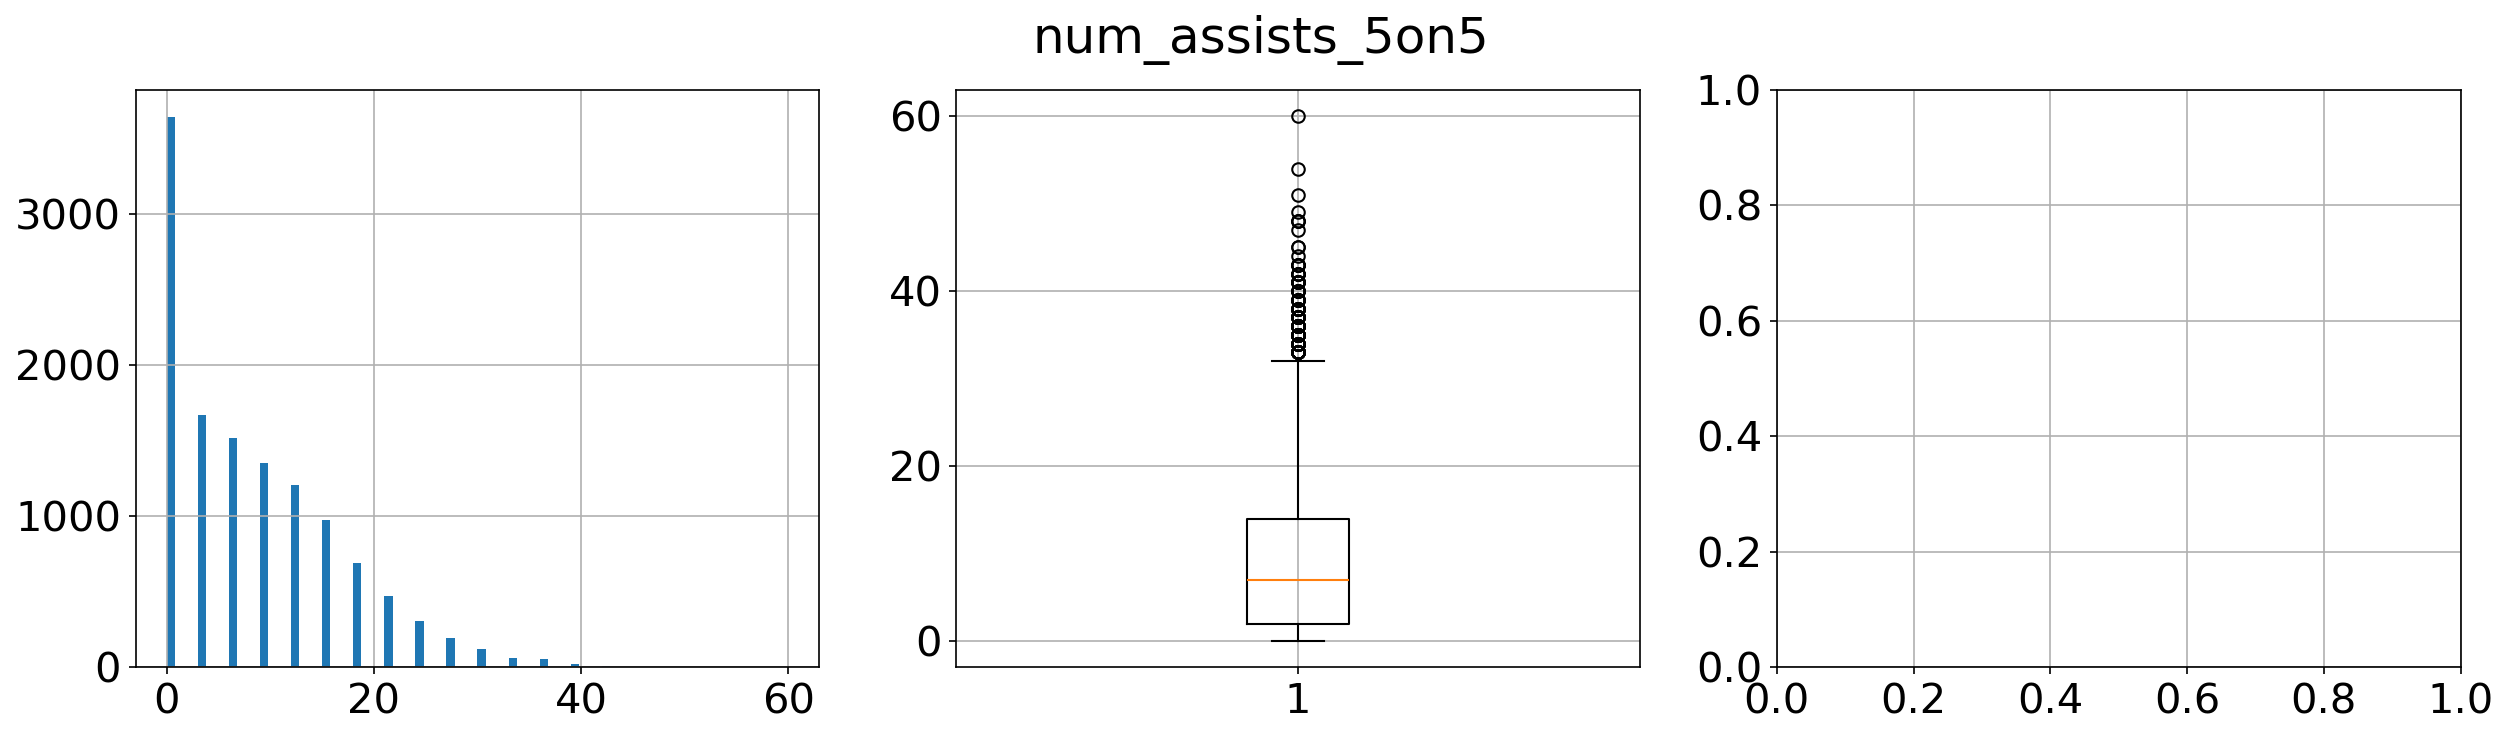

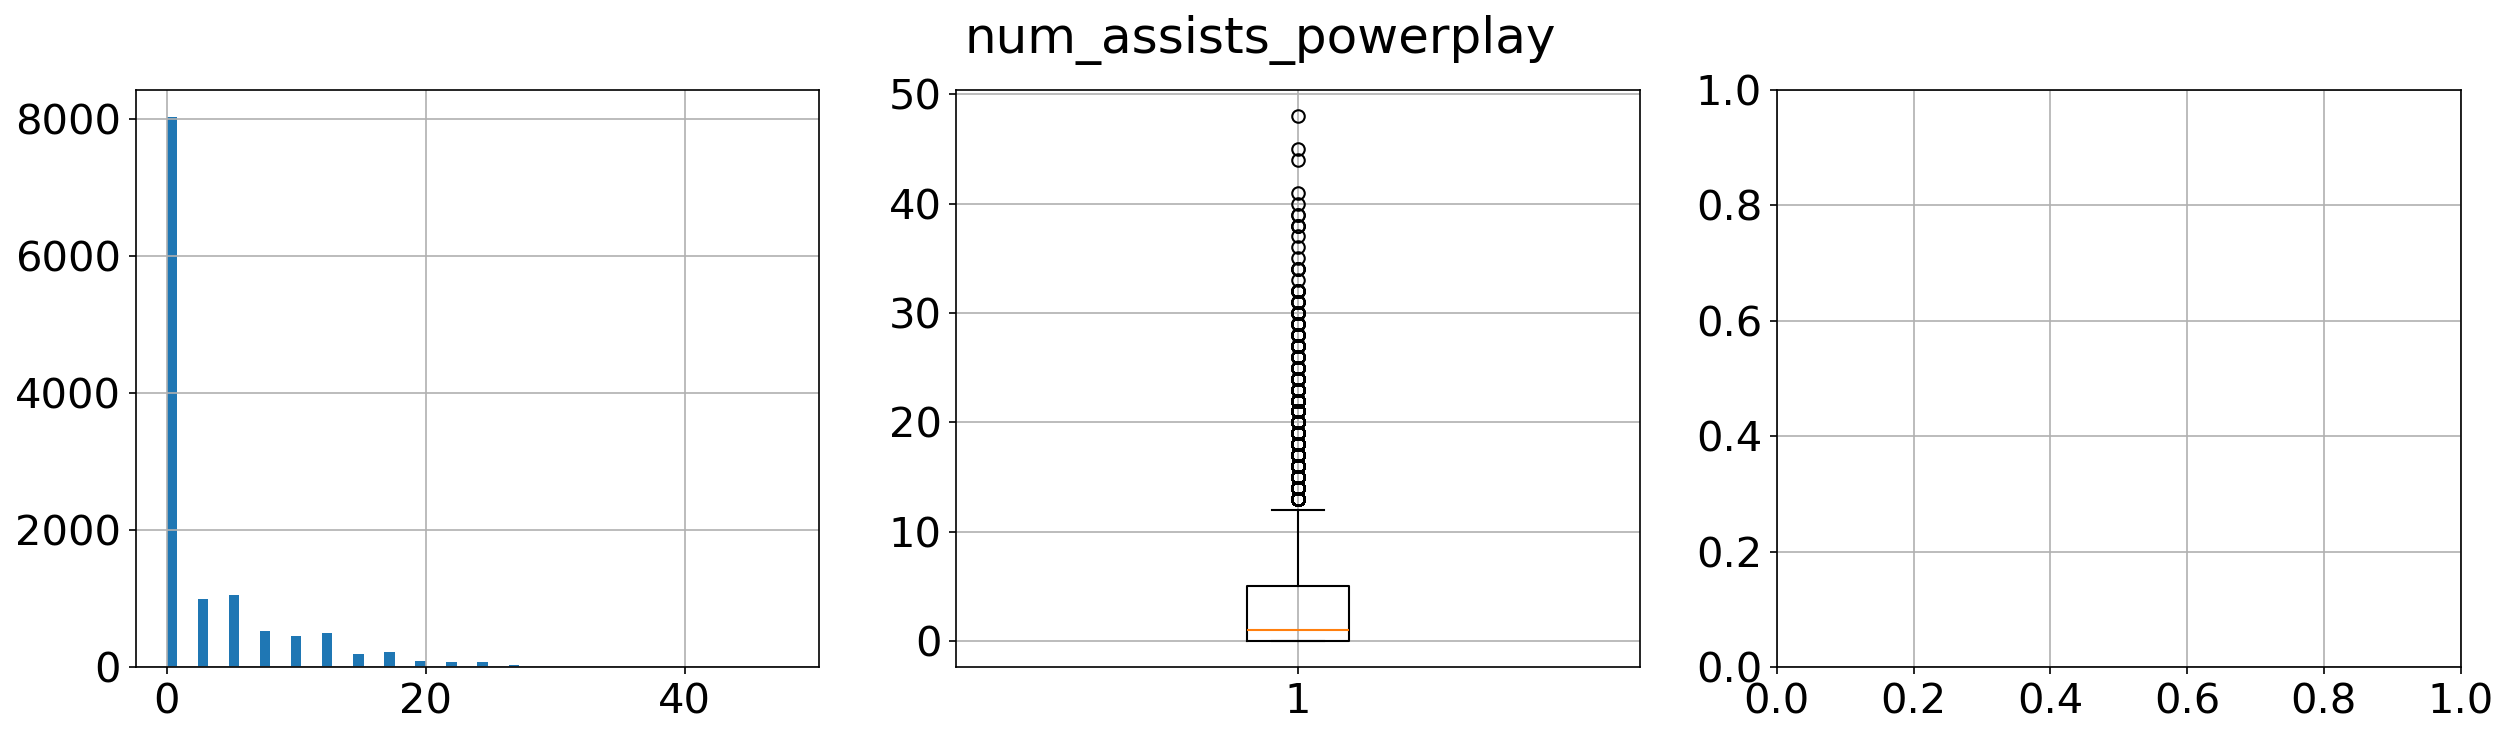

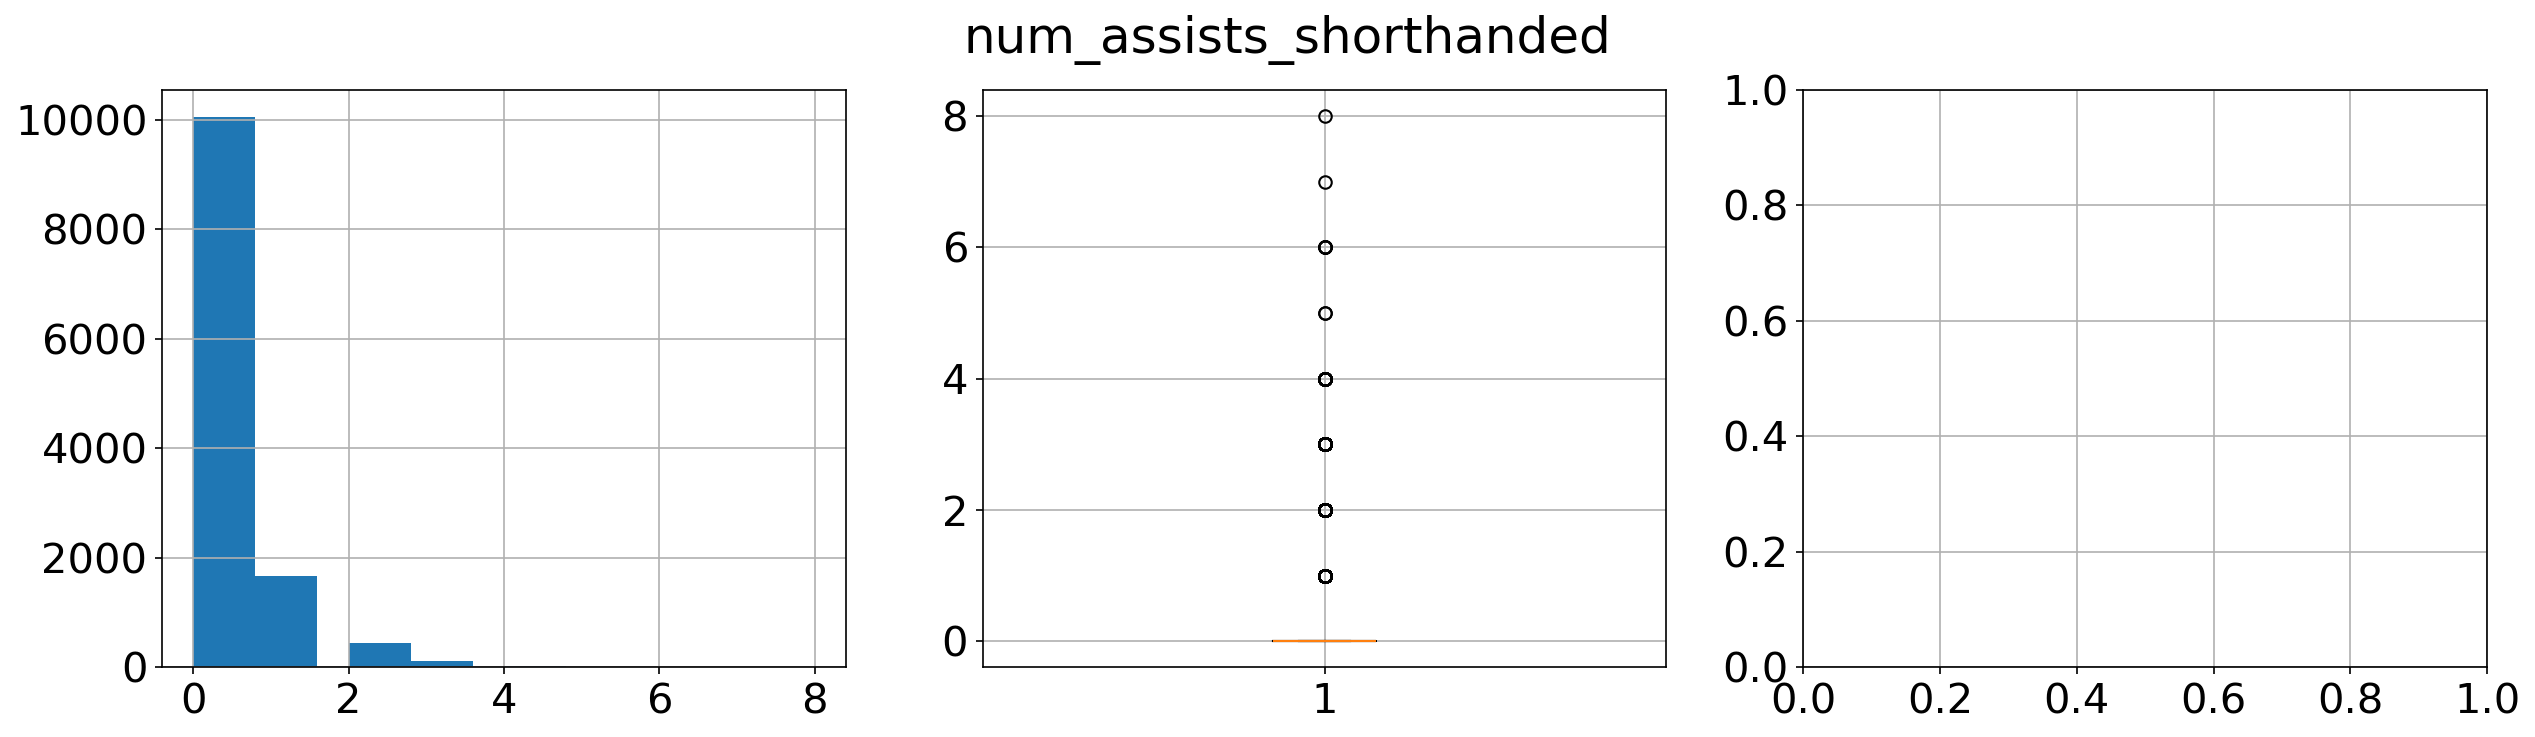

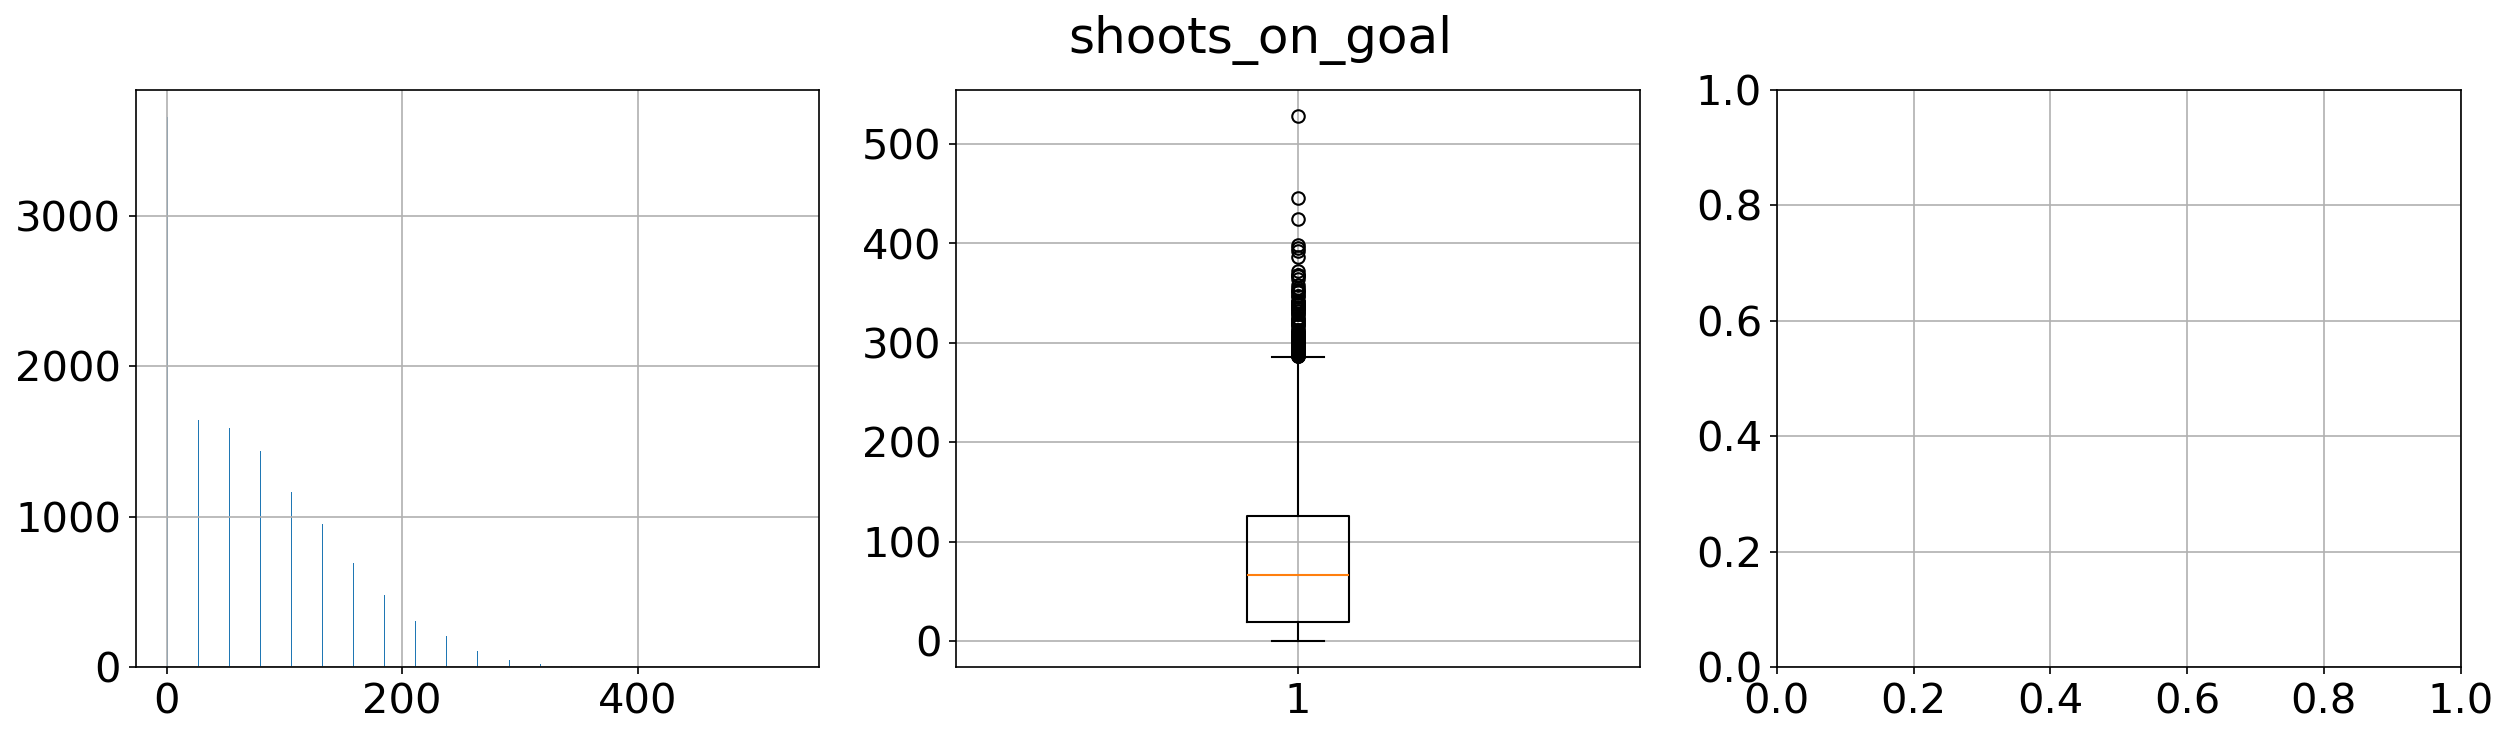

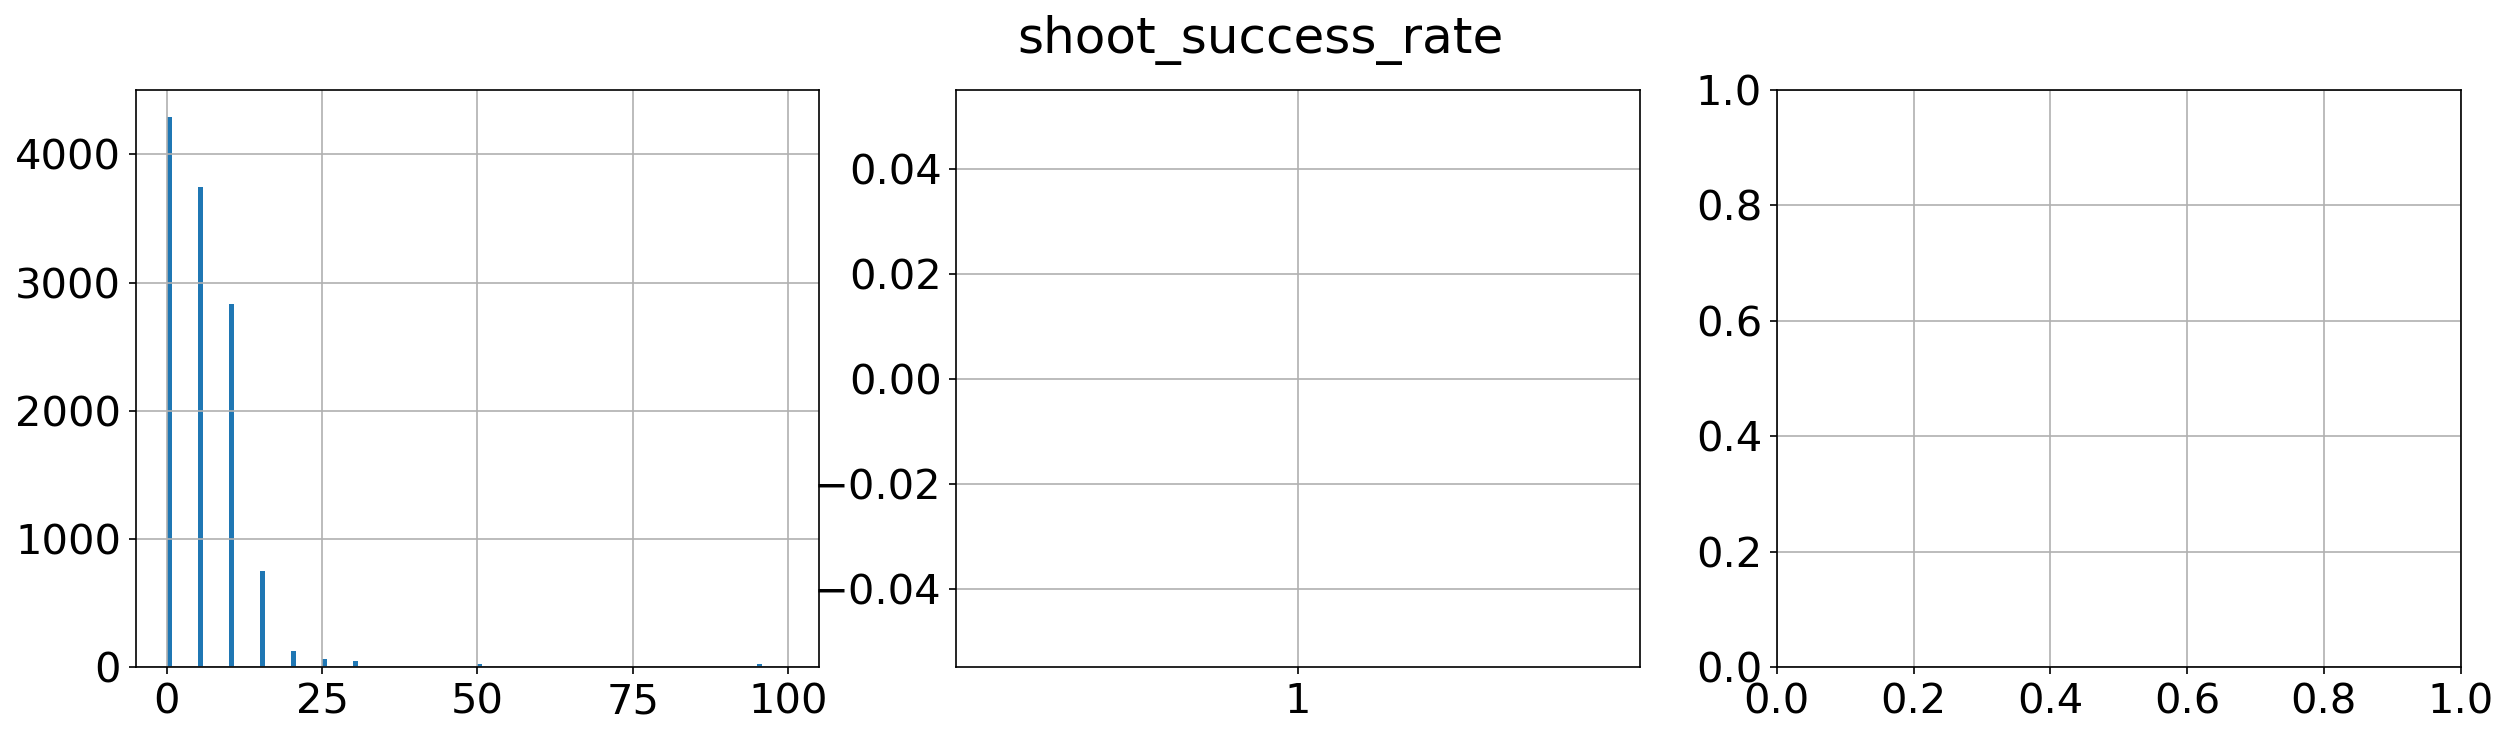

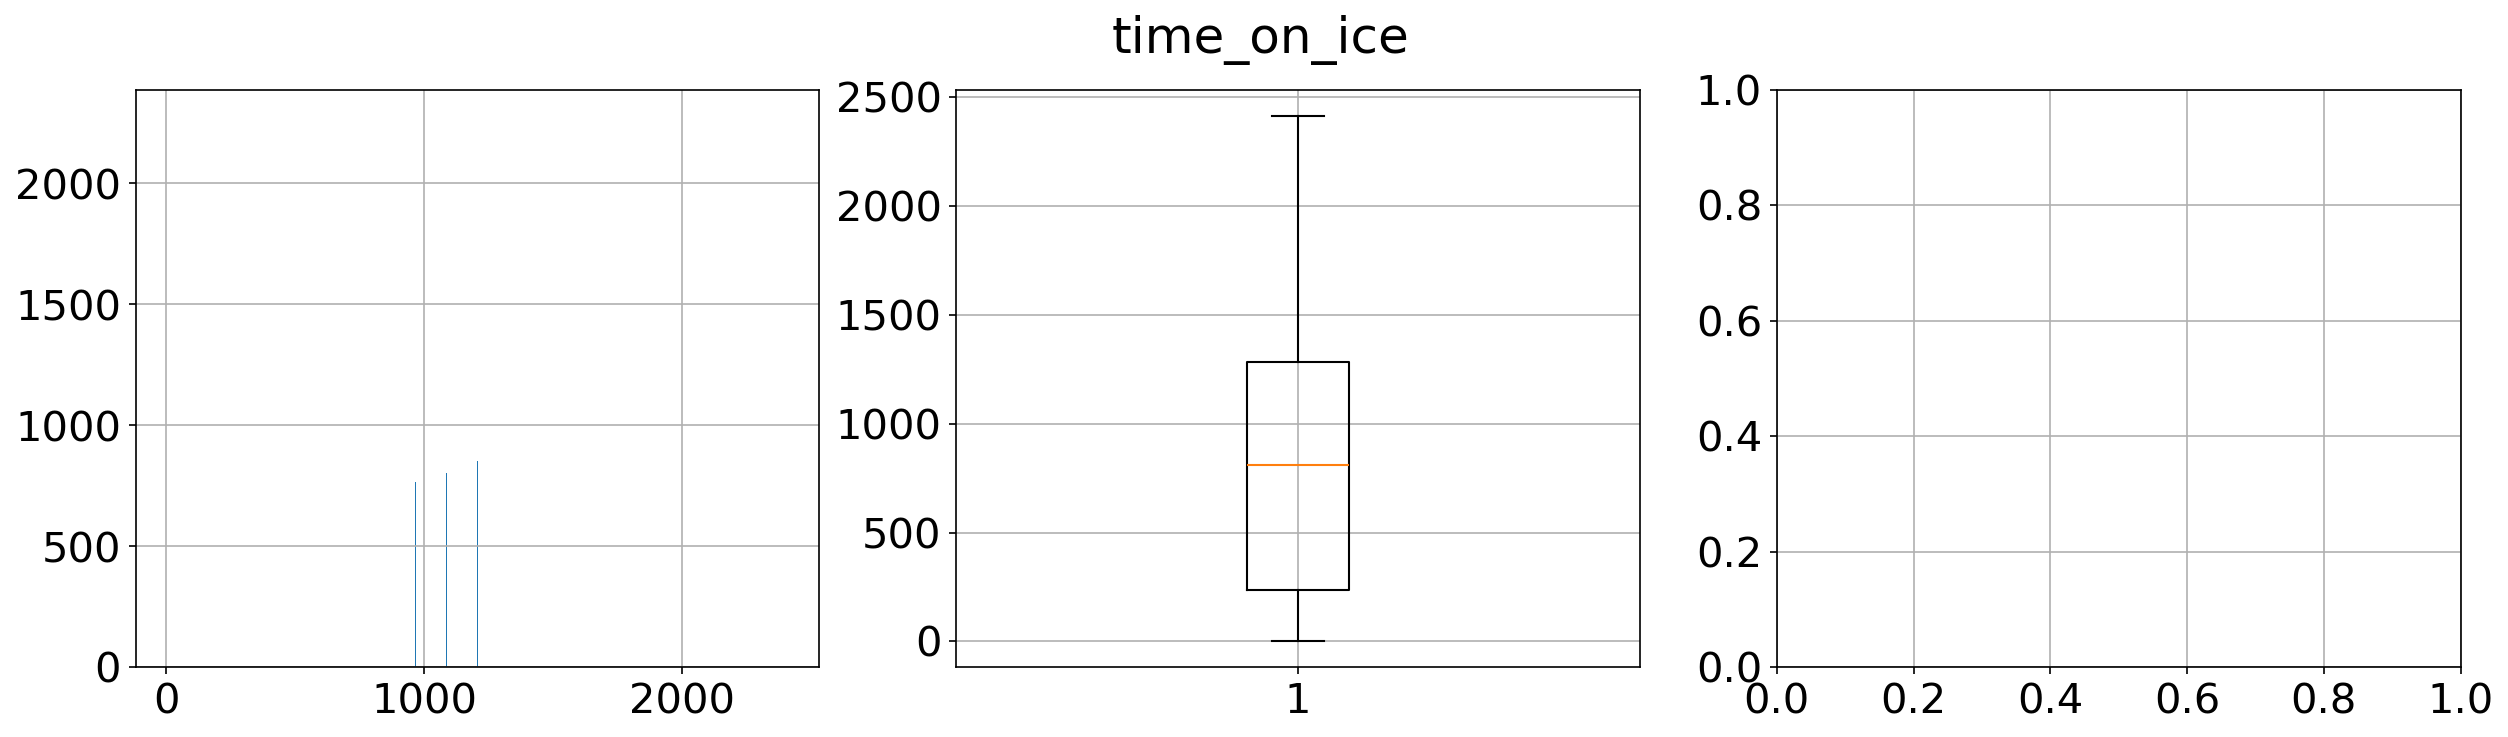

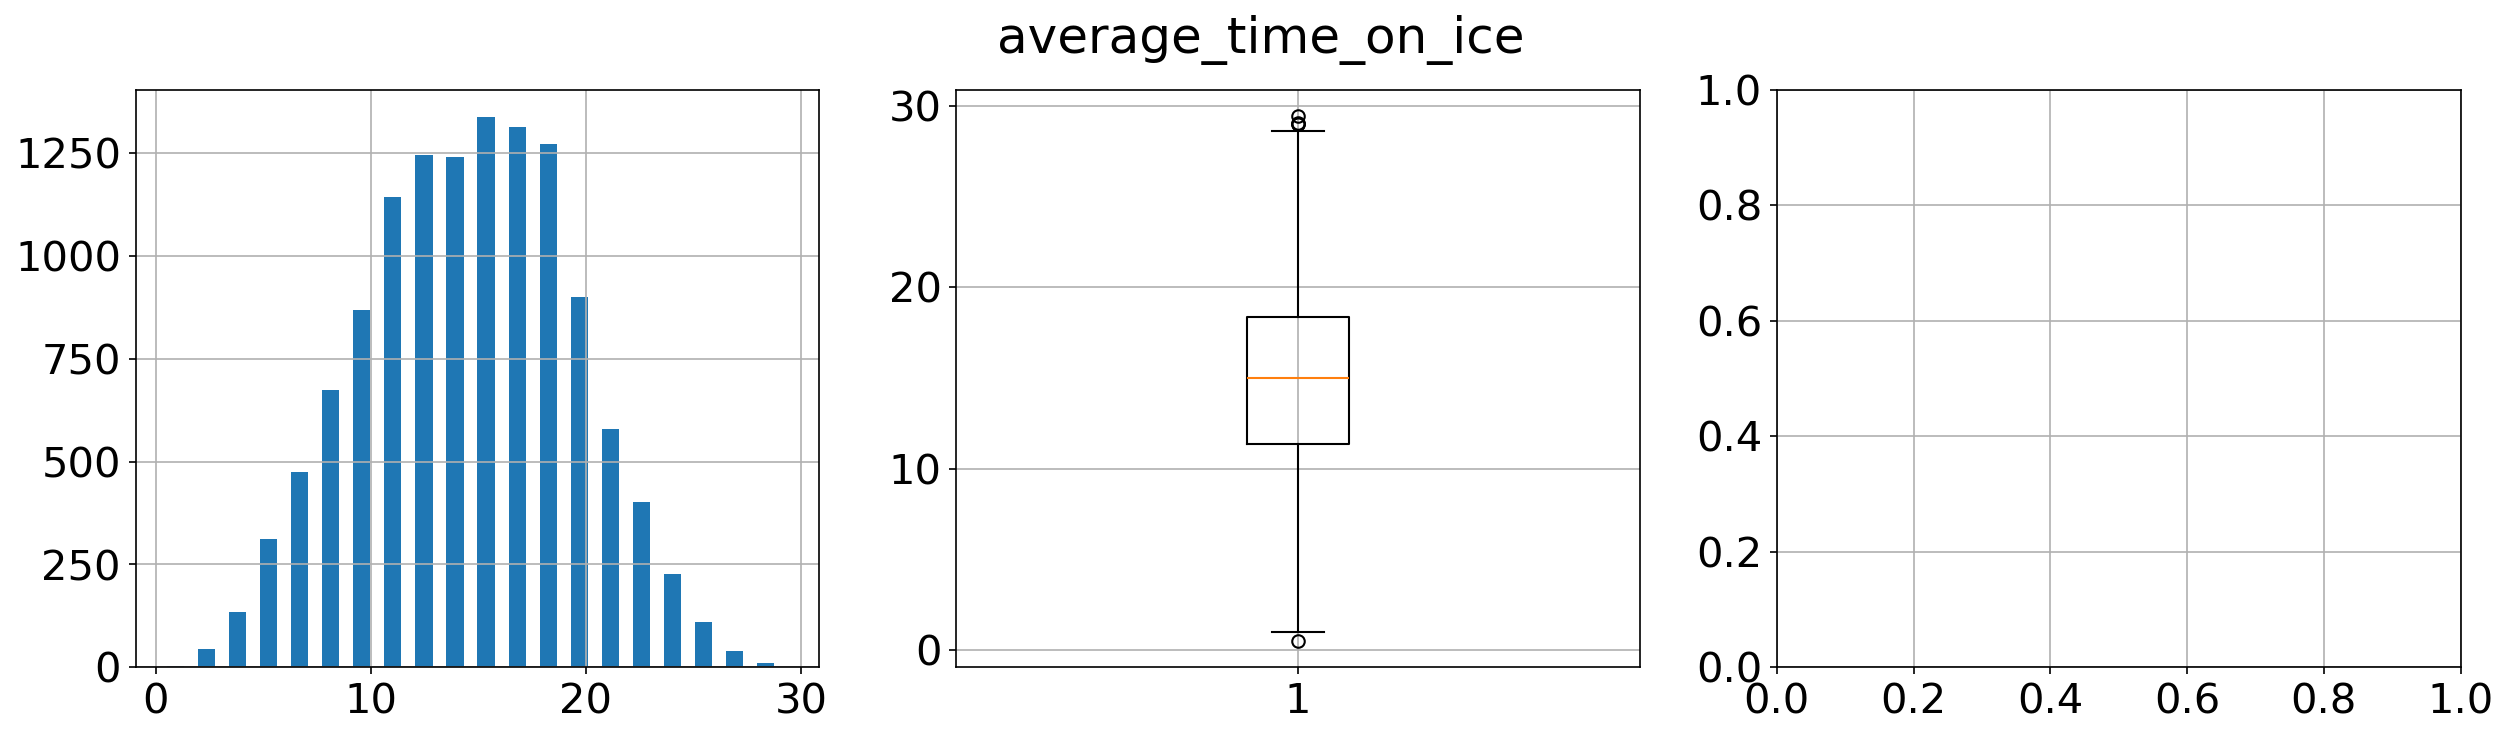

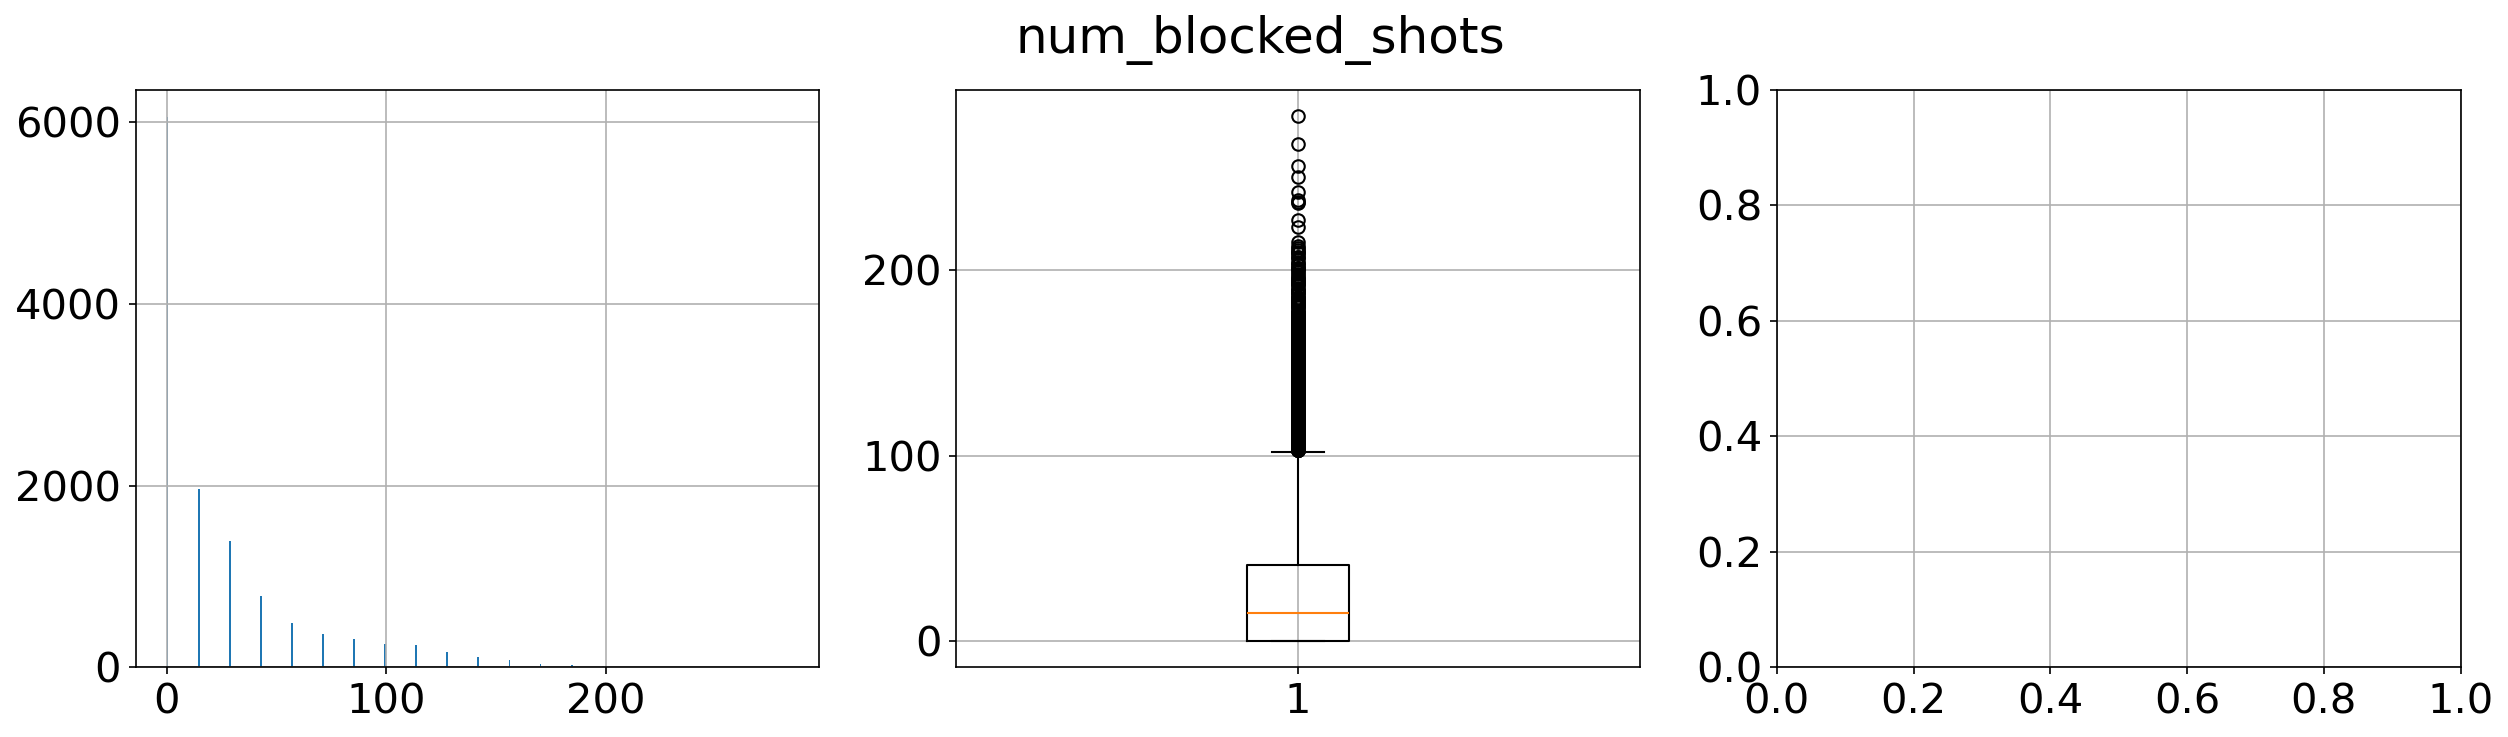

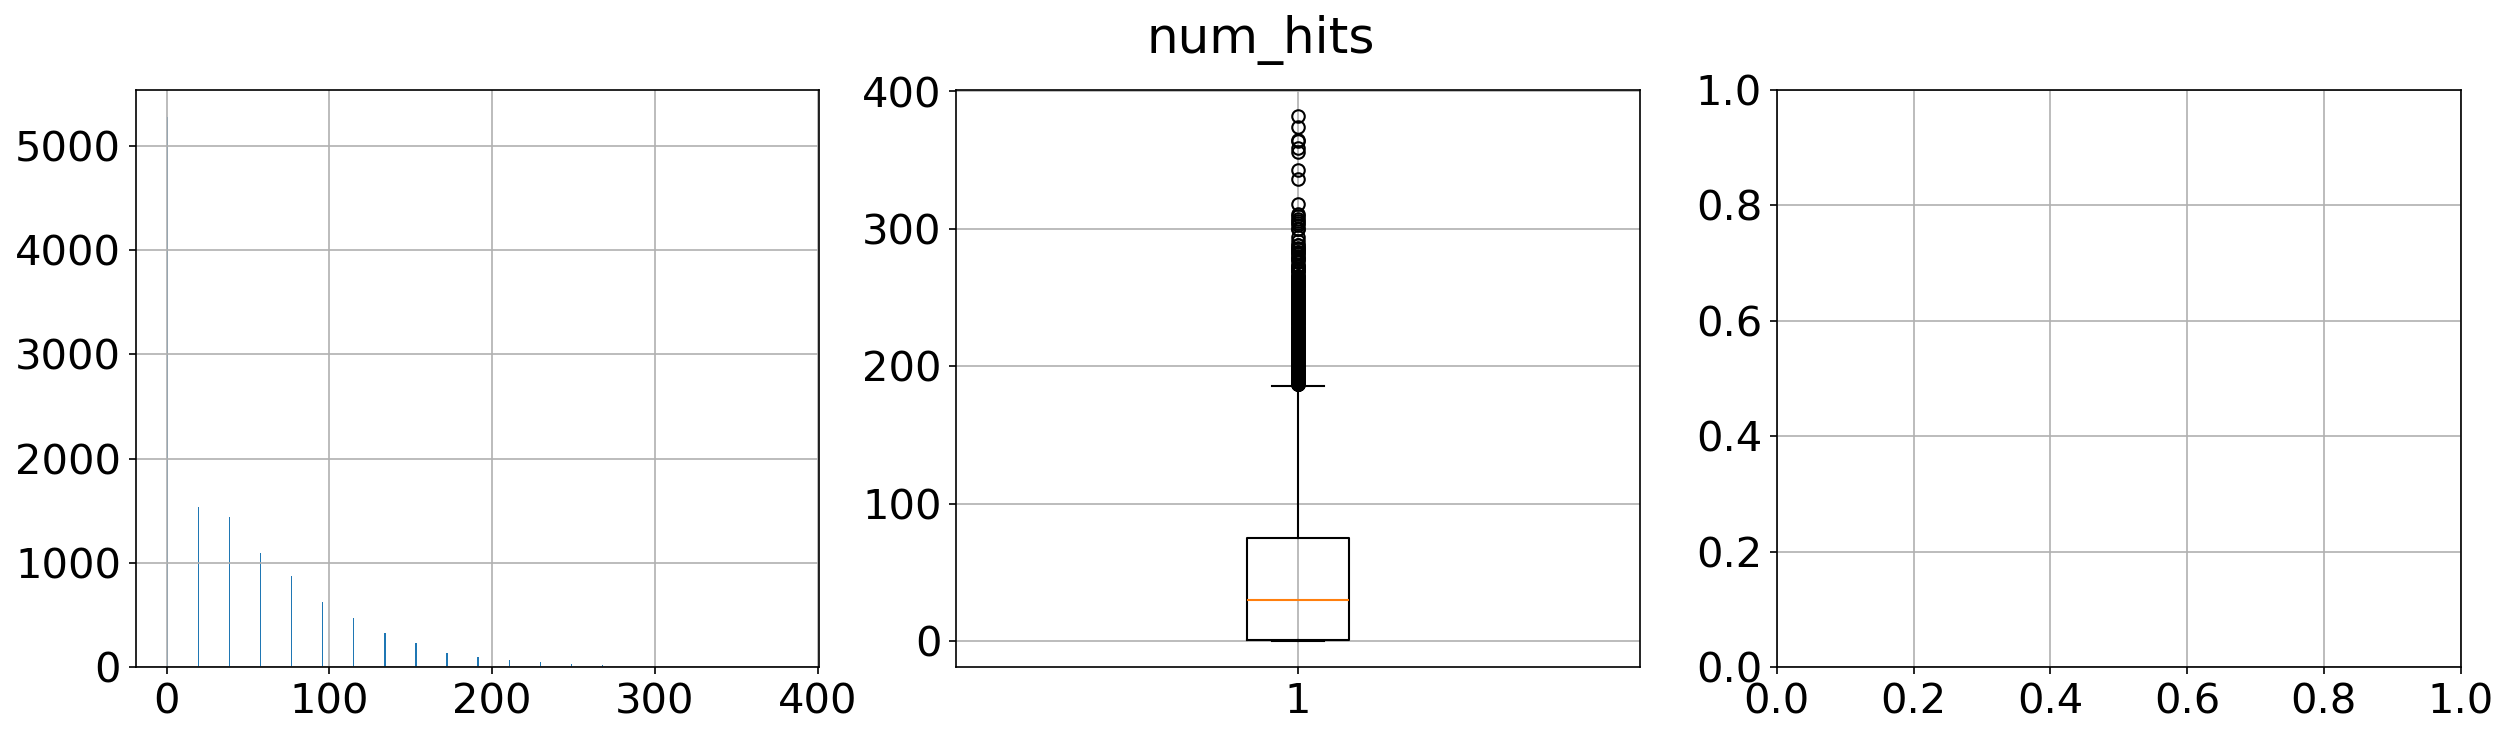

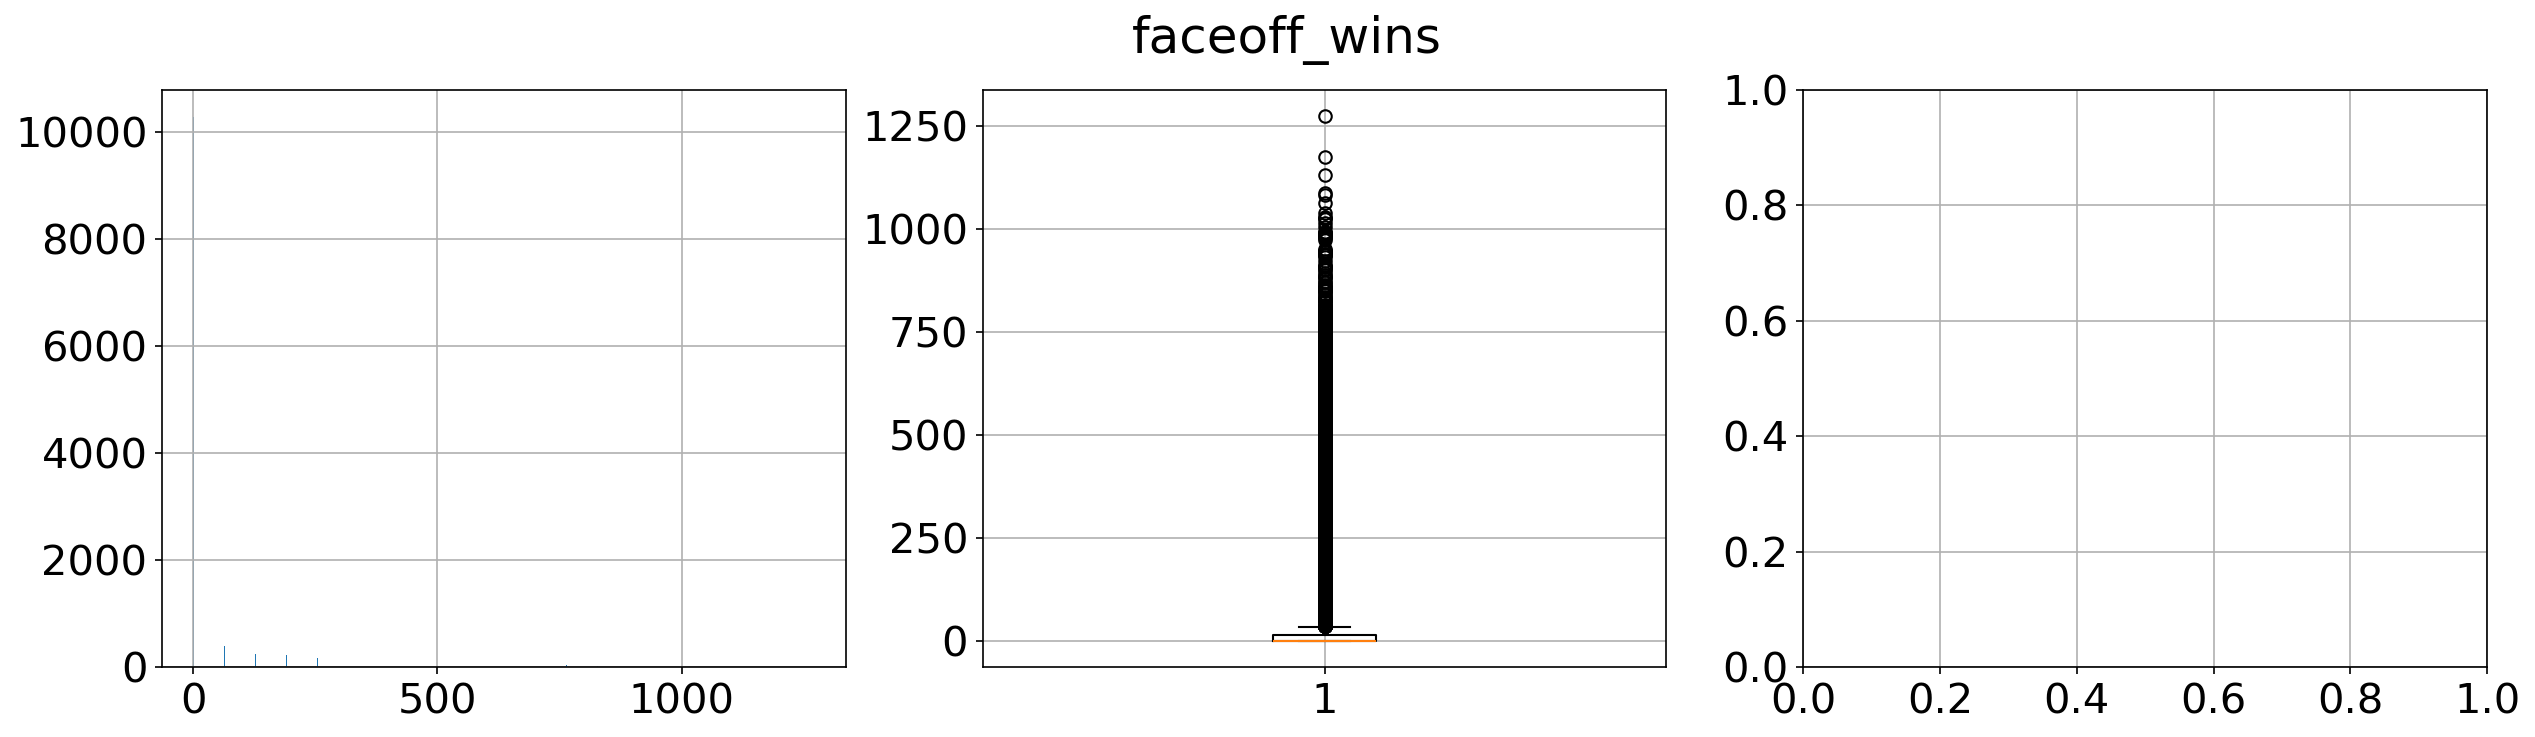

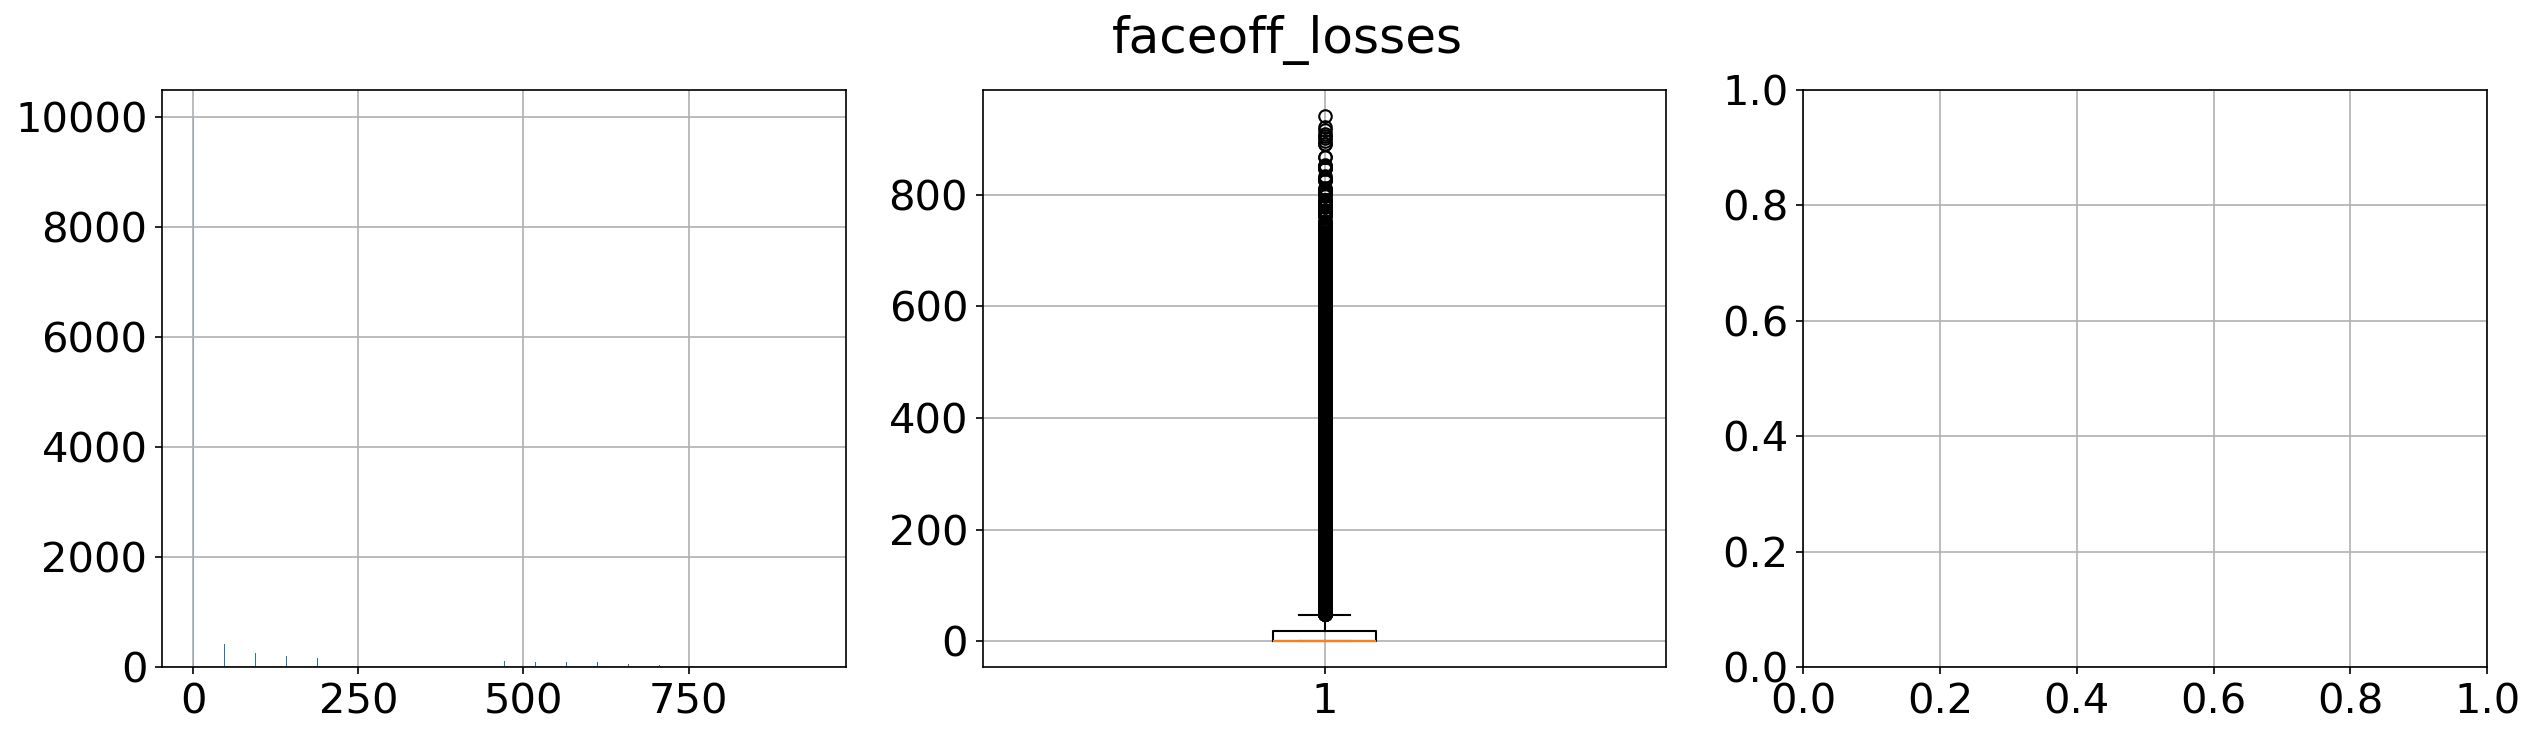

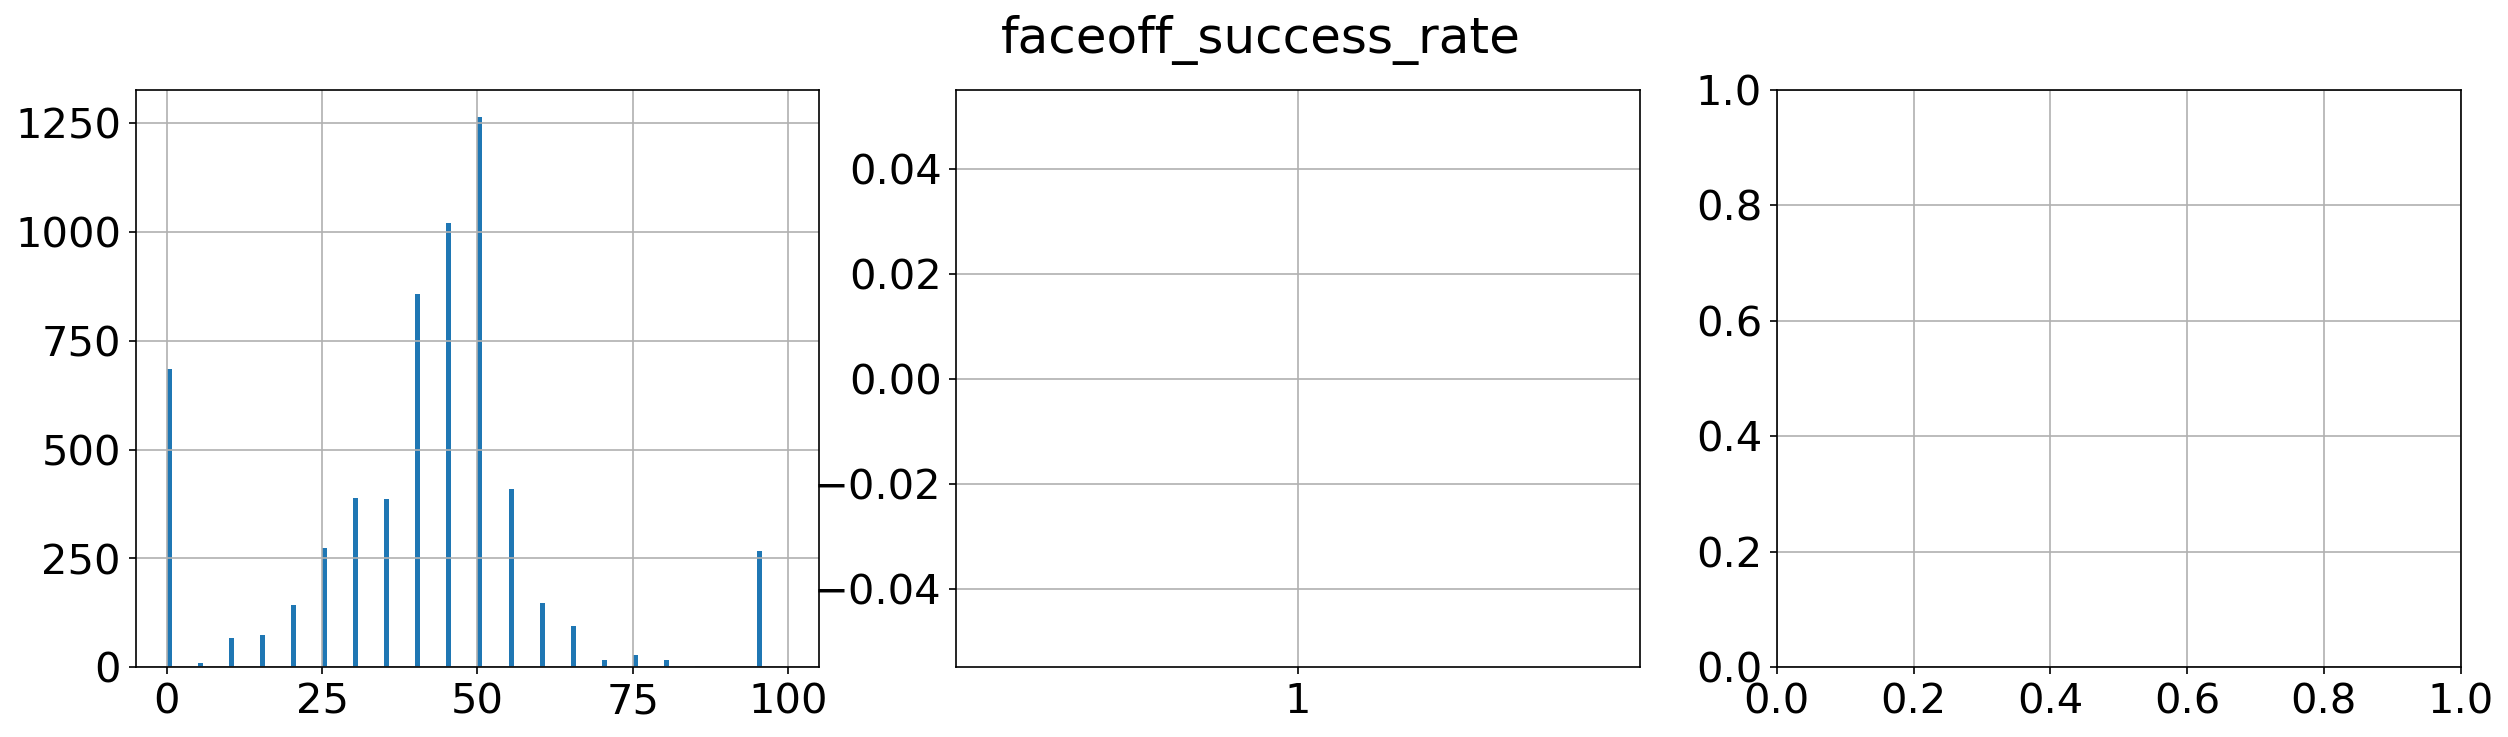

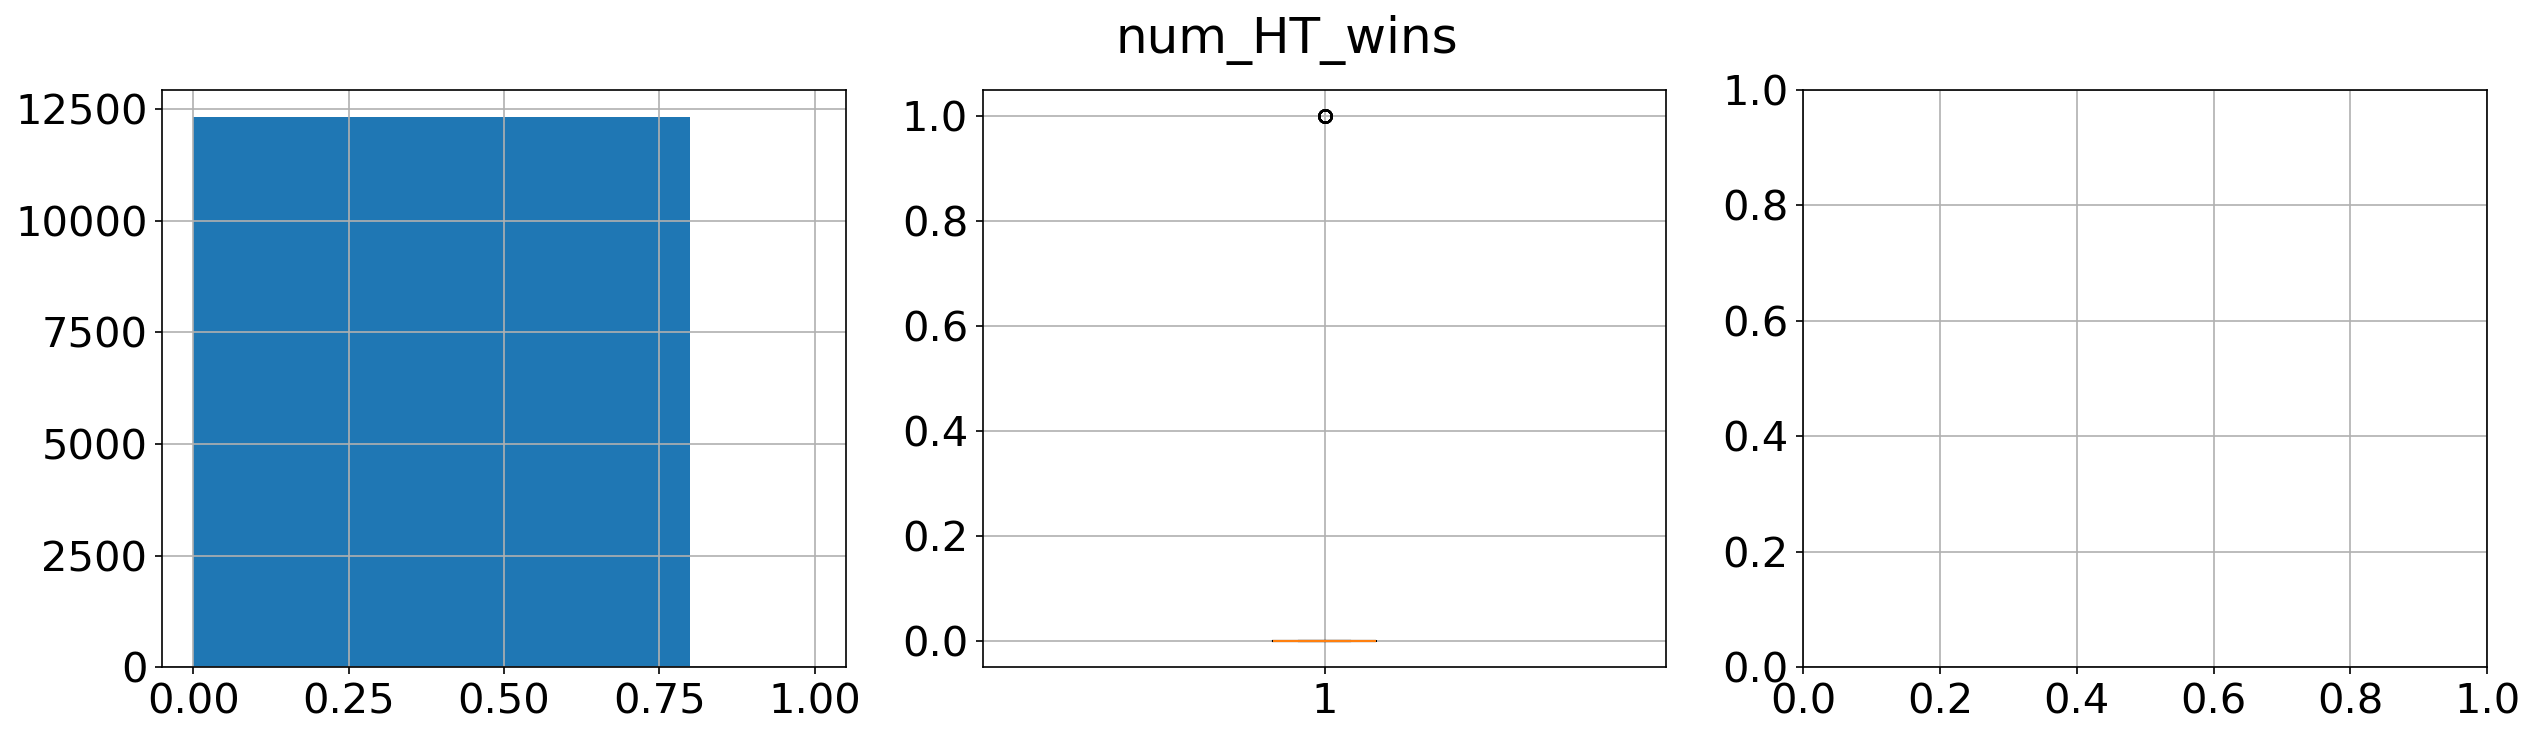

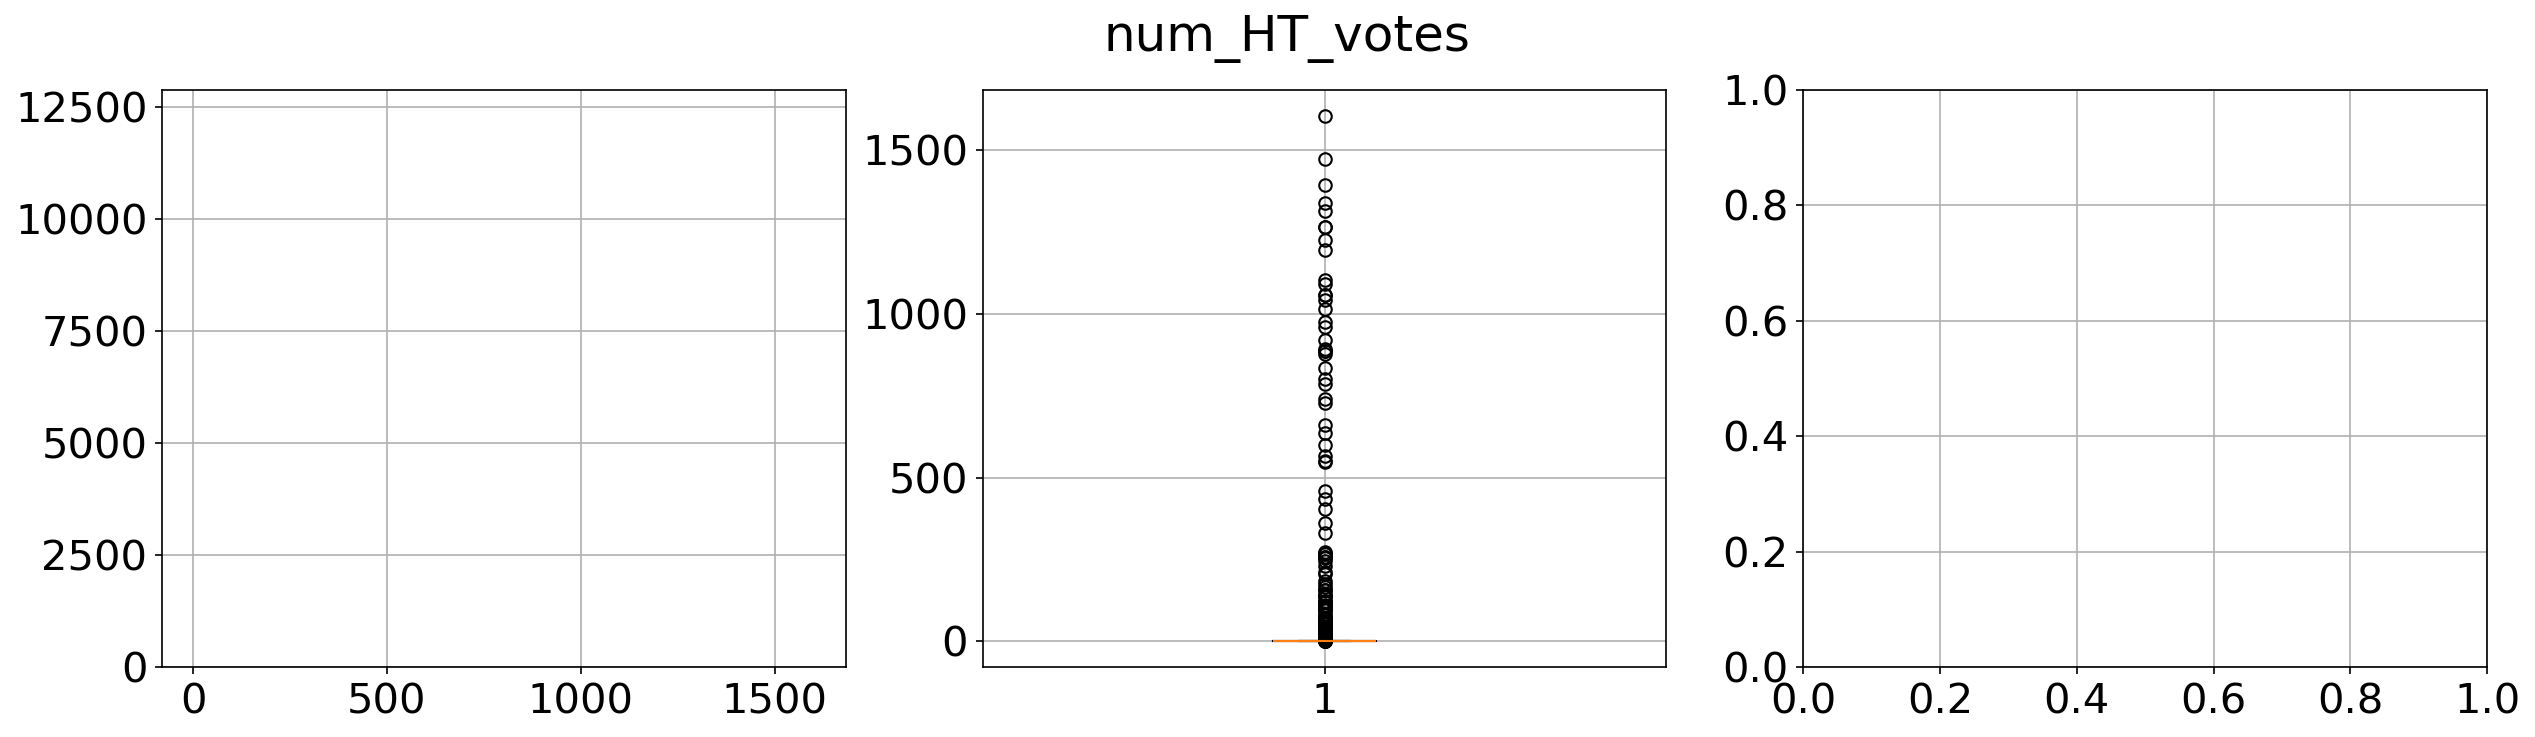

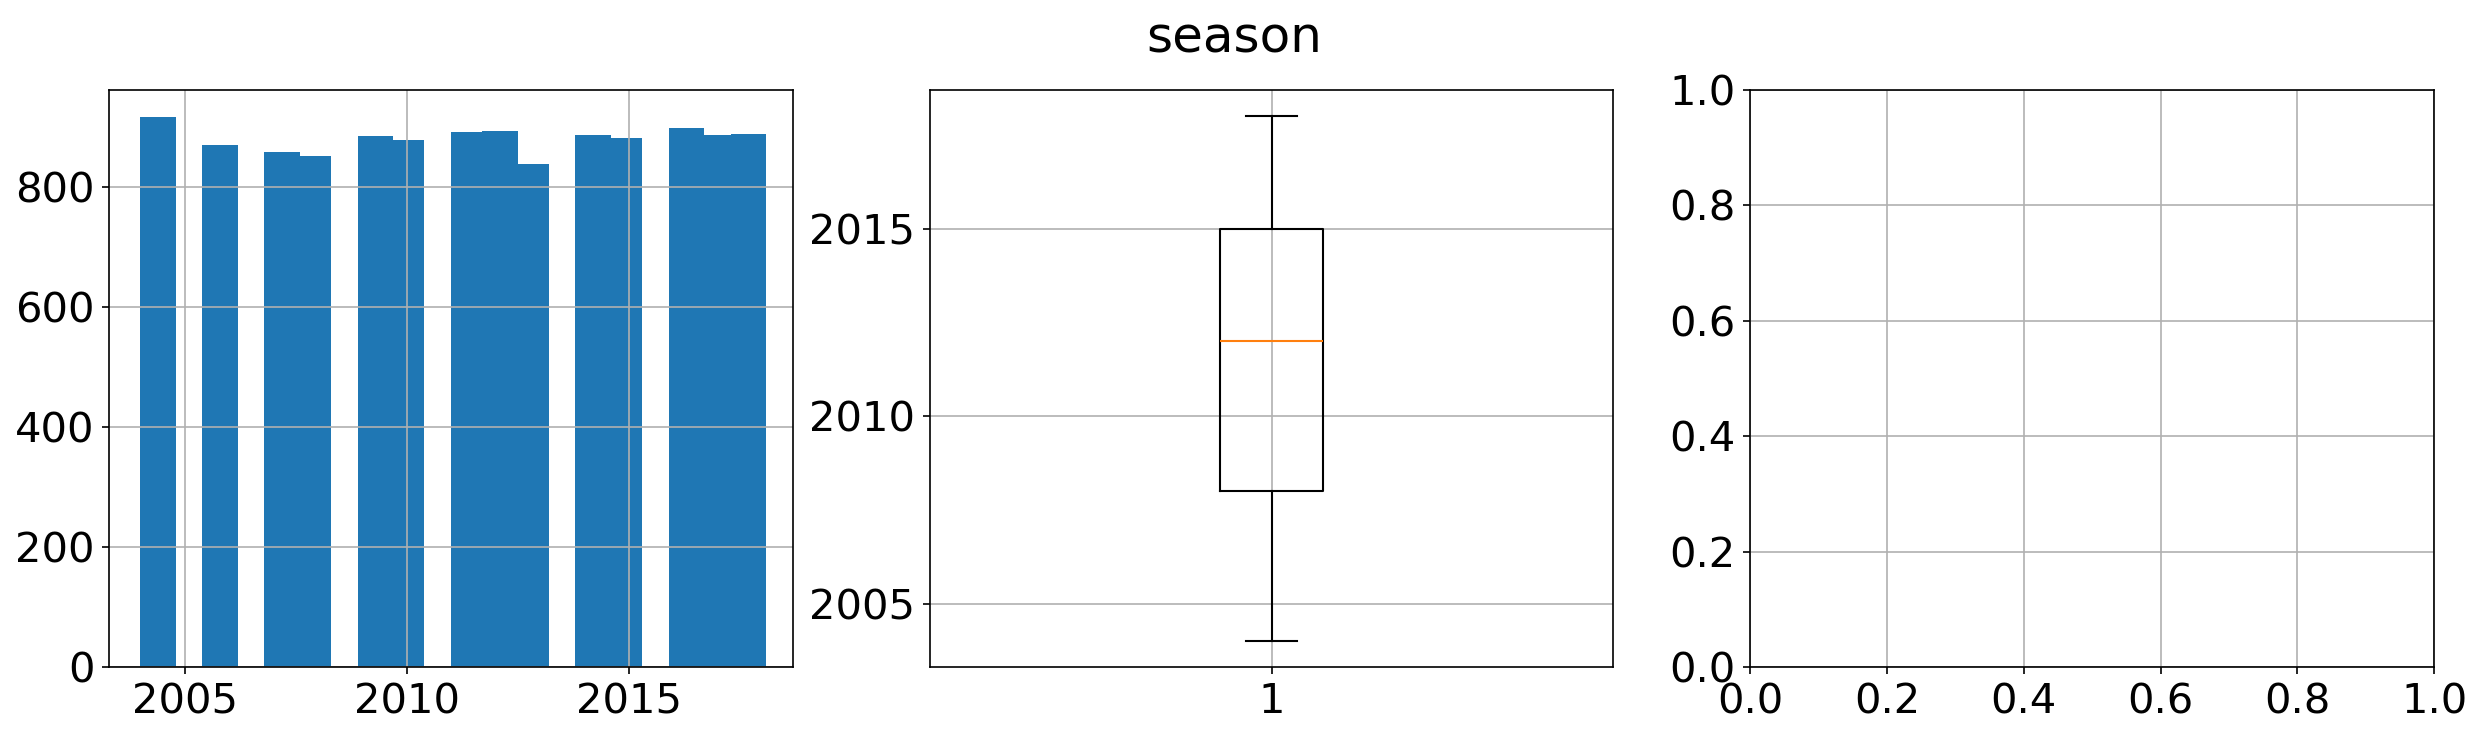

In [35]:
plt.rcParams['font.size'] = 20

# log_scales = [
#     'goals',
#     'assists',
#     'points',
#     'penalty_minutes',
#     'team_points_ratio',
#     'num_goals_5on5',
#     'num_goals_powerplay',
#     'num_goals_shorthanded',
#     'num_goals_gamewinning',
#     'num_assists_5on5',
#     'num_assists_powerplay',
#     'num_assists_shorthanded',
#     'shoots_on_goal',
#     'shoot_success_rate',
#     'num_blocked_shots',
#     'num_hits',
#     'faceoff_wins',
#     'faceoff_losses'
# ]

for col in player_df.select_dtypes([np.float64, np.int64]):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=150)

    axes[0].hist(player_df[col], bins=20, width=0.8)
    axes[1].boxplot(player_df[col])

    for ax in axes:
        ax.grid()

    fig.suptitle(col)
    plt.show(fig)
    plt.close(fig)


In [36]:
player_df.to_csv('../data/nhl-player-data-cleaned.csv', index=False)

In [37]:
player_df

rank             player       nick  age position team  games_played  goals  assists  points  plus_minus  penalty_minutes  team_points_ratio  num_goals_5on5  num_goals_powerplay  num_goals_shorthanded  num_goals_gamewinning  num_assists_5on5  num_assists_powerplay  num_assists_shorthanded  shoots_on_goal  shoot_success_rate  time_on_ice  average_time_on_ice  num_blocked_shots  num_hits  faceoff_wins  faceoff_losses  faceoff_success_rate  num_HT_wins  num_HT_votes  season
0         1     Connor McDavid  mcdavco01   20        C  EDM            82     30       70     100          27               26               12.8              26                    3                      1                      6                45                     24                        1             251                12.0         1733            21.134146               29.0        34         348.0           458.0                  43.2            1          1604    2017
1         2      Sidney Crosby  crosbsi01   29        C  PIT            75     44       45      89          17               24               12.3              30                   14                      0                      5                34                     11                        0             255                17.3         1491            19.880000               27.0        80         842.0           906.0                  48.2            0          1104    2017
2         3       Patrick Kane   kanepa01   28       RW  CHI            82     34       55      89          11               32               10.8              27                    7                      0                      5                39                     16                        0             292                11.6         1754            21.390244               15.0        28           7.0            44.0                  13.7            0           206    2017
3         4  Nicklas Backstrom  backsni02   29        C  WSH            82     23       63      86          17               38                9.9              15                    8                      0                      5                36                     27                        0             162                14.2         1497            18.256098               33.0        45         685.0           648.0                  51.4            0            60    2017
4         5    Nikita Kucherov  kucheni01   23       RW  TBL            74     40       45      85          13               38               12.0              23                   17                      0                      7                30                     15                        0             246                16.3         1438            19.432432               20.0        30           0.0             0.0                   NaN            0           119    2017
...     ...                ...        ...  ...      ...  ...           ...    ...      ...     ...         ...              ...                ...             ...                  ...                    ...                    ...               ...                    ...                      ...             ...                 ...          ...                  ...                ...       ...           ...             ...                   ...          ...           ...     ...
12323   886       Zach Trotman  trotmza01   27        D  PIT             3      0        0       0          -3                0               -0.2               0                    0                      0                      0                 0                      0                        0               6                 0.0           38            12.666667                2.0         1           0.0             0.0                   NaN            0             0    2018
12324   887    Dominic Turgeon  turgedo01   21        C  DET             5      0        0       0          -2                2               -0.2     